<h1>Sign Languag Recognition</h1>

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import os,glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib import pyplot as plt

<h1>Exploratory Data Analysis<h1>

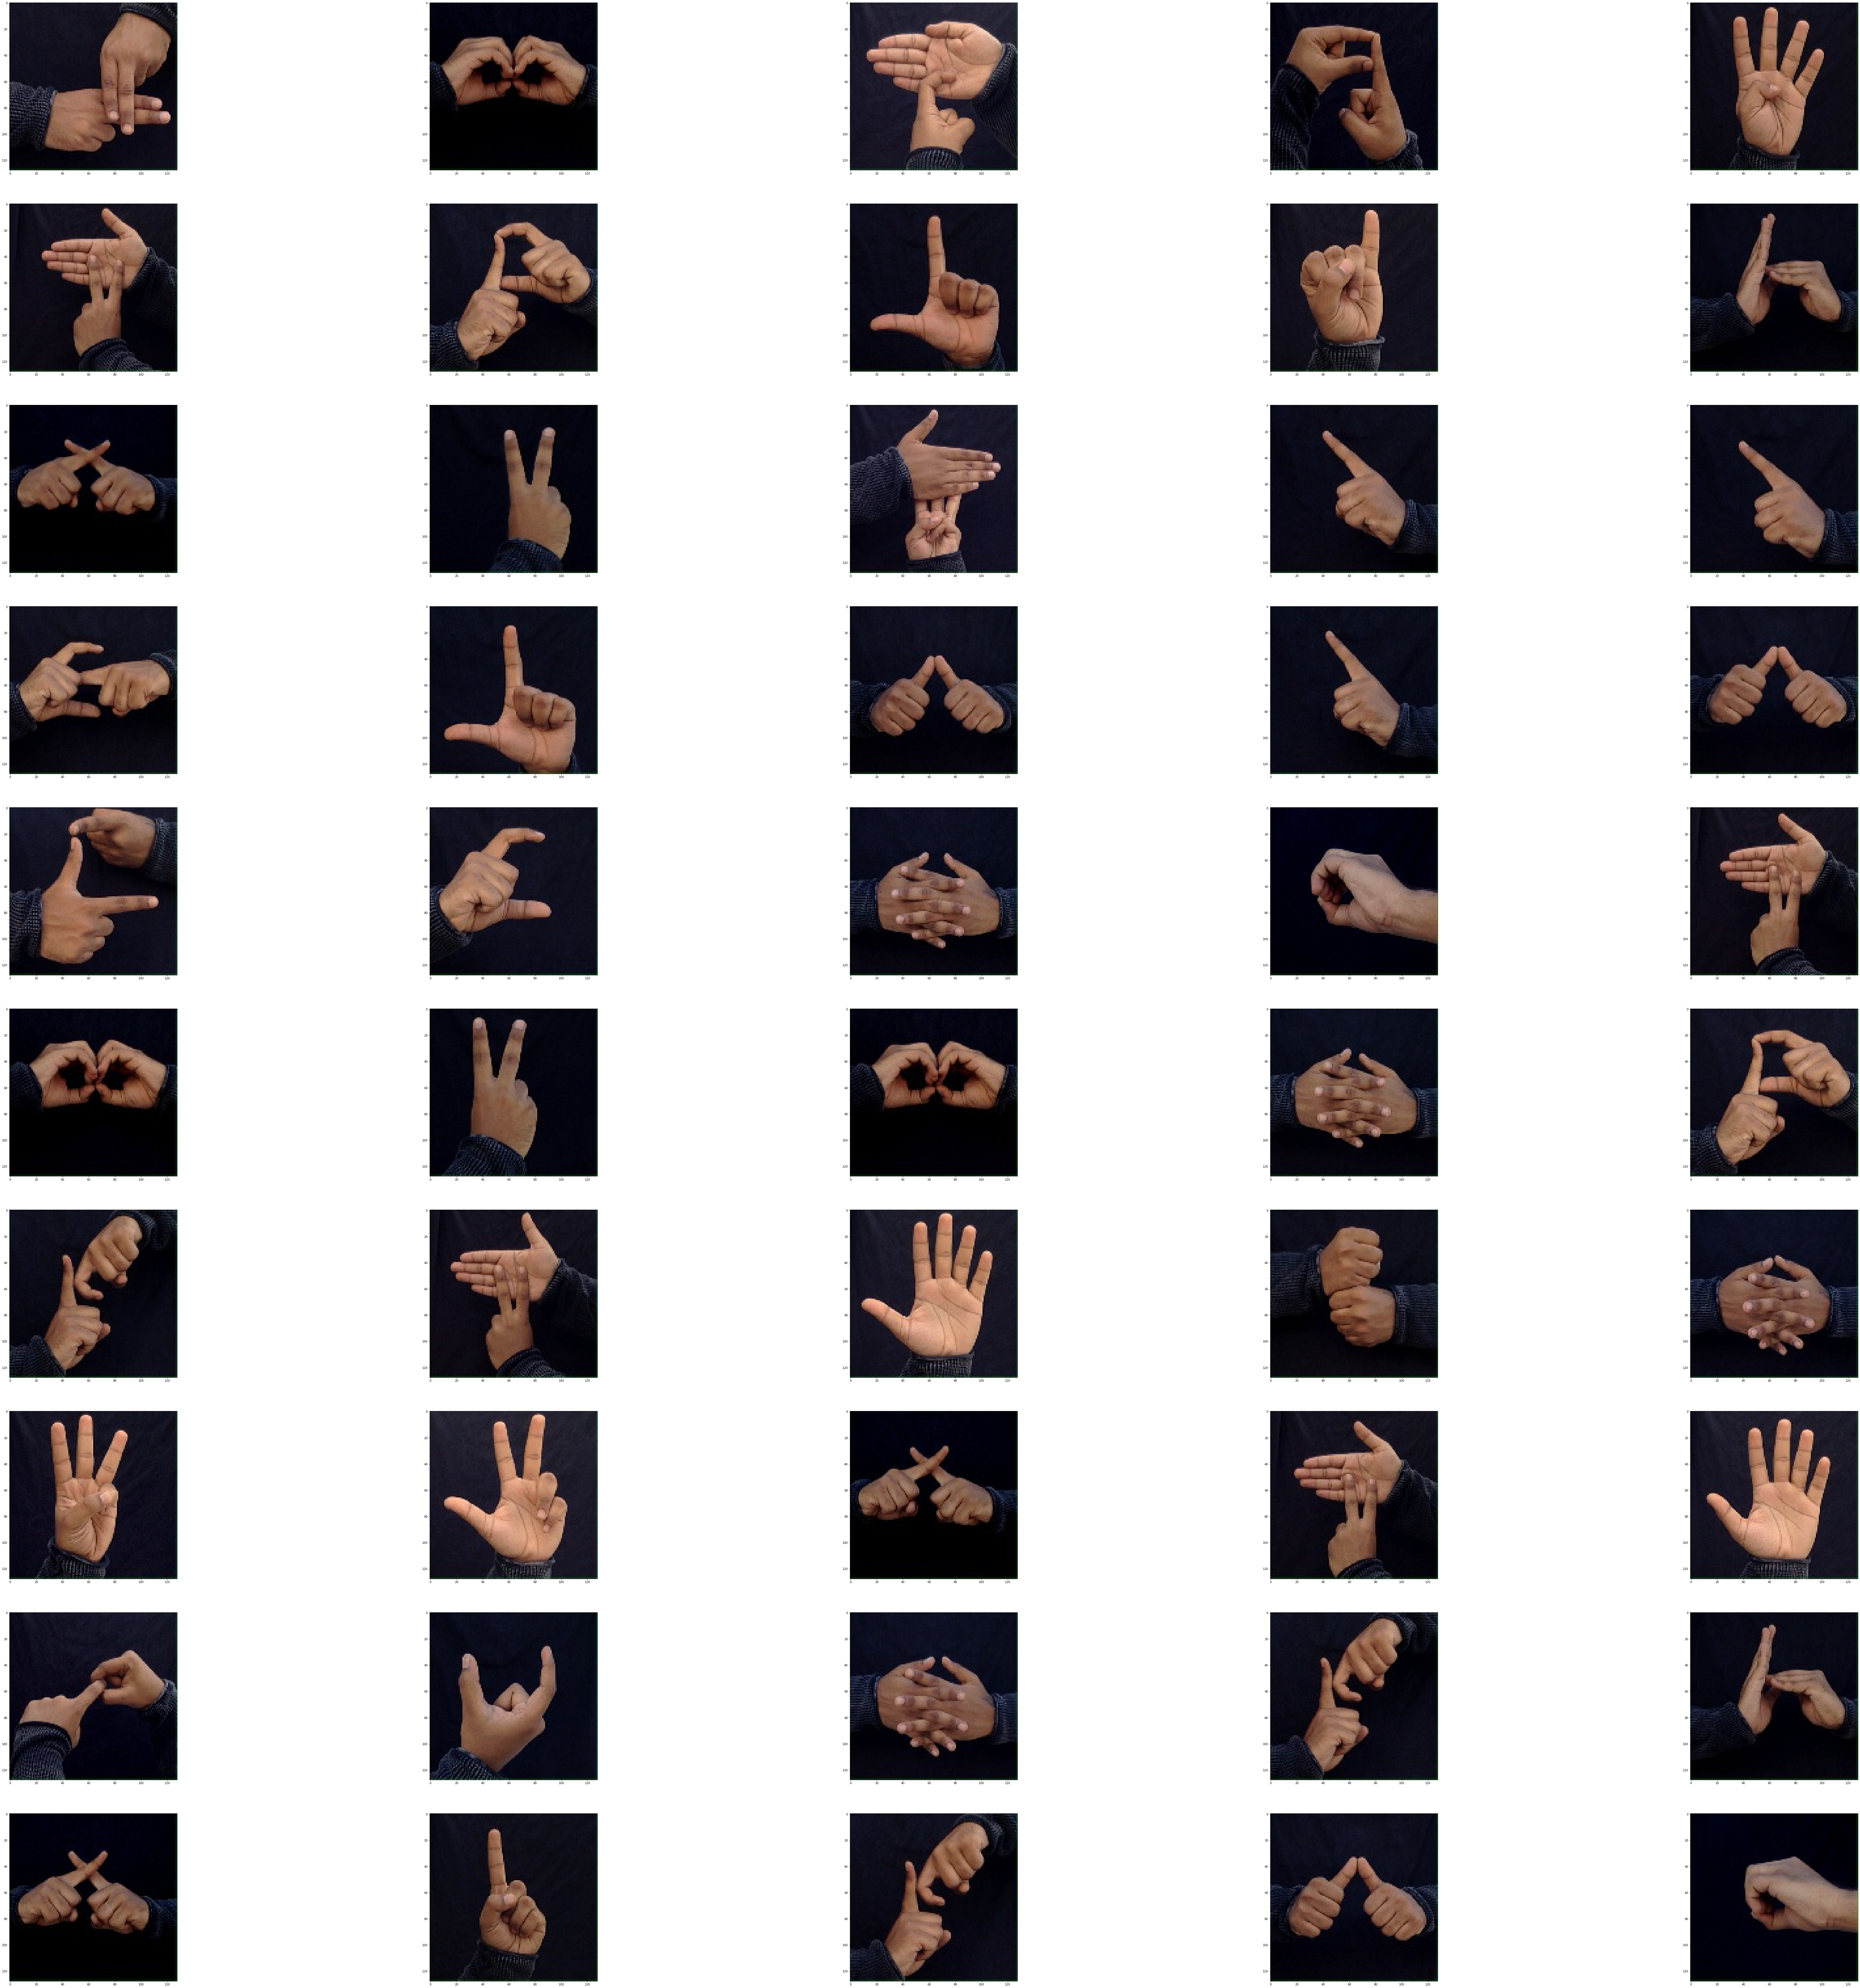

In [20]:
import matplotlib.image as mpimg
plt.figure(figsize=(128, 128))
img_folder = r"D:\sign\data"
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(img_folder):
    listOfFiles += [os.path.join(dirpath, file) for file in filenames]
    
random_sample = random.sample(listOfFiles, 50) 
columns = 5
for i, j in enumerate(random_sample):
    img = mpimg.imread(j)
    plt.subplot(10, columns, i + 1)
    plt.imshow(img)

<h1>Classes and Number of Images<h1>

In [3]:
import pandas as pd
img_folder = r"D:\sign\data"
listOfFiles = list()
list2=list()

for (dirpath, dirnames, filenames) in os.walk(img_folder):
    #listOfFiles += [os.path.join(dirpath, file) for file in filenames]
    list2.extend(dirnames)
s={}
for i in list2:
    s[i] = len(os.listdir(f"D:\sign\data\{i}"))
count_df = pd.DataFrame(columns=["ClassId", "Count"])
count_df["ClassId"] = s.keys()
count_df["Count"] = s.values()
count_df

ClassId  Count
0        1   1200
1        2   1200
2        3   1200
3        4   1200
4        5   1200
5        6   1200
6        7   1200
7        8   1200
8        9   1200
9        A   1200
10       B   1200
11       C   1200
12       D   1200
13       E   1200
14       F   1200
15       G   1200
16       H   1200
17       I   1200
18       J   1200
19       K   1200
20       L   1200
21       M   1200
22       N   1200
23       O   1200
24       P   1200
25       Q   1200
26       R   1200
27       S   1200
28       T   1200
29       U   1200
30       V   1200
31       W   1200
32       X   1200
33       Y   1200
34       Z   1200

<h1>Convert color images into Binary Images</h1>

In [2]:
import os,glob

from os import listdir,makedirs
from os.path import isfile,join

path = r"D:\sign\data\Z" # Source Folder
dstpath = r"D:\sign\data_gray\Z" # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
    
# Folder won't used
files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))

for image in files:
    try:
        #img = cv2.imread(os.path.join(path,image))
        #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #dstPath = join(dstpath,image)
        #cv2.imwrite(dstPath,gray)
        
        img_rgb = cv2.imread(os.path.join(path,image))
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) #gray scale
        threshi, img_bw = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)#black and white
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath, img_bw)
        
    except:
        print ("not converted")
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        #gray_image = cv2.cvtColor(os.path.join(path,image), blackAndWhiteImage) # convert to greyscale
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        threshi, img_bw = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        
        cv2.imwrite(os.path.join(dstpath,fil),img_bw)
        
    except:
        print('not converted')

Directory already exist, images will be written in same folder


<h1>Split data and save in Directory</h1>

In [ ]:
import numpy as np
import splitfolders

splitfolders.ratio(r"D:/sign/data_GRAY", output=r"D:/sign/data_GRAY/TT", seed=1337, ratio=(.8, .2), group_prefix=None)

<h1>Data Augmentation with Image Data Generator</h1>

In [2]:
training_datagen = ImageDataGenerator( 
        rescale=1.0/255, # normalize the image
        fill_mode='nearest',
        validation_split=0.2)

In [3]:
test_datagen = ImageDataGenerator( 
        rescale=1.0/255, # Normalize the image
        )

In [4]:
training_img = training_datagen.flow_from_directory( 
    directory=r'D:\sign\TT\train', 
    target_size=(128,128), 
    class_mode='categorical', 
    batch_size=35,
    seed=7,
    shuffle=True)


Found 33566 images belonging to 35 classes.


In [5]:
validation_img = training_datagen.flow_from_directory( 
    directory=r'D:\sign\TT\train',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=35, 
    shuffle=True, 
    seed=7,
    subset='validation'
)

Found 6686 images belonging to 35 classes.


In [6]:
test_img = test_datagen.flow_from_directory(
    directory=r'D:\sign\TT\val',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=35, 
    shuffle=True, 
    seed=7
)

Found 8400 images belonging to 35 classes.


<h1>Labels To Image Classes</h1>

In [7]:
imgs, labels = next(training_img)

imgs, labels = next(test_img)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

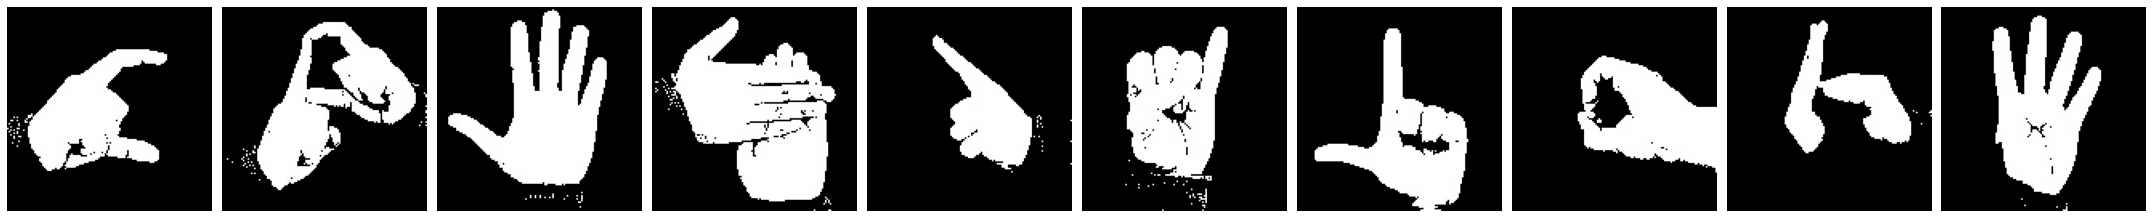

(35, 128, 128, 3)


In [9]:
from matplotlib import pyplot as plt
plotImages(imgs)
print(imgs.shape)

 

<h1>Create Convolution Nueral Network</h1>

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))

model.add(Dense(128,activation ="relu"))

model.add(Dense(35,activation ="softmax"))


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [32]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])


In [33]:
history = model.fit( 
  training_img,
  validation_data=validation_img,
  epochs=5)

Epoch 1/5
960/960 [==============================] - 1103s 1s/step - loss: 0.1647 - accuracy: 0.9544 - val_loss: 0.0185 - val_accuracy: 0.9943
Epoch 2/5
960/960 [==============================] - 535s 557ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0062 - val_accuracy: 0.9975
Epoch 3/5
960/960 [==============================] - 502s 523ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 4/5
960/960 [==============================] - 493s 514ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0186 - val_accuracy: 0.9954
Epoch 5/5
960/960 [==============================] - 494s 515ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.0027 - val_accuracy: 0.9991


<h1>Plot Loss and Accuracy</h1>

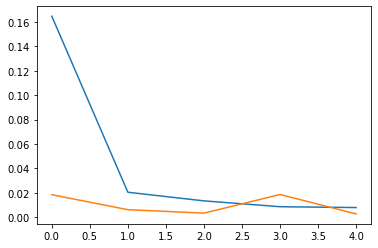

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

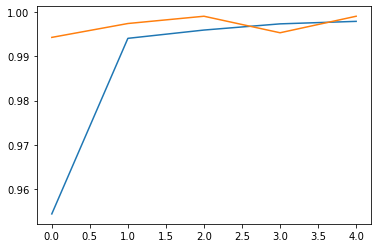

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [41]:
model.evaluate(test_img)

263/263 [==============================] - 25s 95ms/step - loss: 0.7436 - accuracy: 0.9983


[0.74362713098526, 0.9983333349227905]

In [43]:
model.save(r'D:\sign\sign_lann.model')

INFO:tensorflow:Assets written to: D:\sign\sign_lann.model\assets


In [10]:
model = keras.models.load_model(r'D:\sign\sign_lann.model')

<h1>Transfer Learning</h1>

In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [11]:
from keras.layers import Flatten , Dense

In [12]:
# add preprocessing layer to the front of VGG 
# [3] add 3 Channles ie RGB 
# We are importing weights from imagenet use it as it is
# include_top means we last layer in VGG16 Model we dont want this 
# Because with help of VGG we are tyring to solve own problem
vgg = VGG16( input_shape=(128,128,3), weights='imagenet', include_top=False)

In [13]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [14]:
# useful for getting number of classes
Output = 35
Output

35

In [27]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dense(500, activation='relu')(x) # Grp2
prediction = Dense(Output, activation='softmax')(x)

In [28]:
from keras.models import Model

In [29]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [31]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  loss=CategoricalCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
history = model.fit( 
  training_img,
  validation_data=validation_img,
  epochs=5)

Epoch 1/5
960/960 [==============================] - 2712s 3s/step - loss: 0.0874 - accuracy: 0.9818 - val_loss: 0.0157 - val_accuracy: 0.9960
Epoch 2/5
960/960 [==============================] - 2730s 3s/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.2112e-05 - val_accuracy: 1.0000
Epoch 3/5
960/960 [==============================] - 2599s 3s/step - loss: 6.9623e-06 - accuracy: 1.0000 - val_loss: 1.0216e-05 - val_accuracy: 1.0000
Epoch 4/5
960/960 [==============================] - 2579s 3s/step - loss: 0.0208 - accuracy: 0.9954 - val_loss: 7.4819e-05 - val_accuracy: 1.0000
Epoch 5/5
960/960 [==============================] - 2547s 3s/step - loss: 9.2432e-06 - accuracy: 1.0000 - val_loss: 3.8472e-06 - val_accuracy: 1.0000


In [33]:
model.save(r'D:\sign\sign_lan_vgg16.model')

INFO:tensorflow:Assets written to: D:\sign\sign_lan_vgg16.model\assets


In [15]:
model = keras.models.load_model(r'D:\sign\sign_lan_vgg16.model')

<h1>Plot Loss and Accuracy</h1>

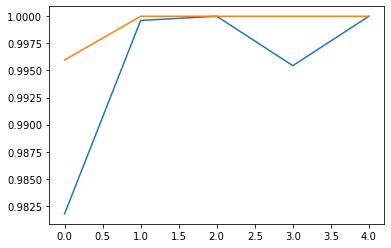

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

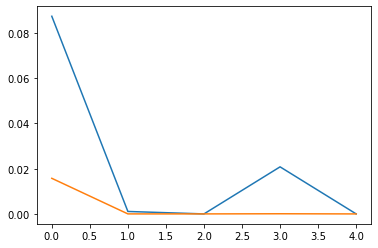

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
model.evaluate(test_img)

240/240 [==============================] - 566s 2s/step - loss: 7.5730e-06 - accuracy: 1.0000


[7.573003586003324e-06, 1.0]

<h1>Predictions on a small set of test data<h1>

predictions on a small set of test data

C   D   5   H   I   6   L   O   Z   4   I   G   M   F   A   R   L   M   5   H   2   J   4   N   V   T   5   O   7   V   8   V   W   H   H   

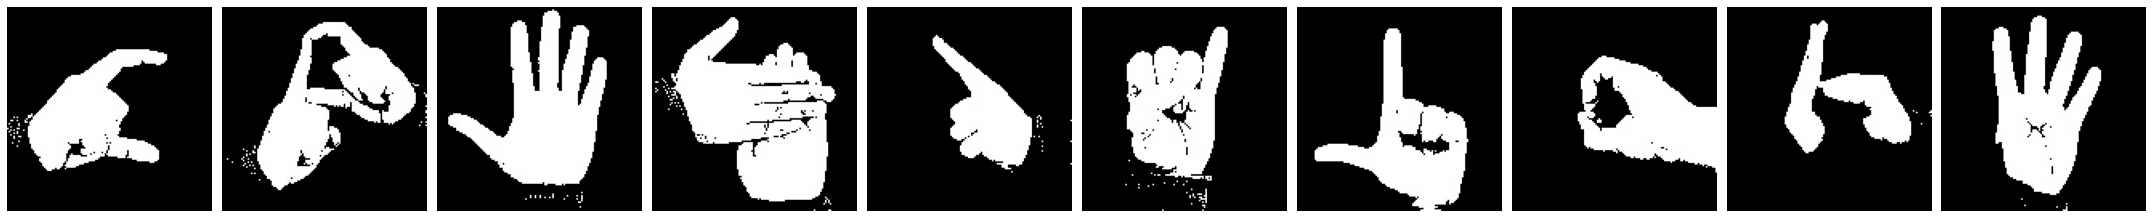

Actual labels
C   D   5   H   I   6   L   O   Z   4   I   G   M   F   A   R   L   M   5   H   2   J   4   N   V   T   5   O   7   V   8   V   W   H   H   (35, 128, 128, 3)


In [11]:

#word_dict = {1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine', 'A':'A', 'B':'B','C':'C',
 #            'D':'D', 'E':'E', 'F':'F', 'G':'G', 'H':'H', 'I':'I', 'J':'J', 'K':'K', 'L':'L', 'M':'M', 'N':'N', 'O':'O', 'P':'P'
  #          , 'Q':'Q', 'R':'R', 'S':'S', 'T':'T', 'U':'U', 'V':'V', 'W':'W', 'X':'X', 'Y':'Y', 'Z':'Z'}

word_dict = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
             'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

predictions = model.predict(imgs)
print("predictions on a small set of test data")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

#history.history

<h1>Diamension for Region of Interest</h1>

In [26]:
background = None
accumulated_weight = 0.5
ROI_top = 150
ROI_bottom = 300
ROI_right = 200
ROI_left = 350

In [27]:
def accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

<h1>Image Segmentation<h1>

In [30]:
def segment(frame, threshold=25):
    global background
    
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(background.astype("uint8"), frame)

    # threshold the diff image so that we get the foreground
    _ ,thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
    #Fetching contours in the frame (These contours can be of hand or any other object in foreground) ...
    contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                                                  
    
    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
         # based on contour area, get the maximum contour which is the hand
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

cam = cv2.VideoCapture(0)
num_frames =0

In [31]:
while True:
    ret, frame = cam.read()

    # filpping the frame to prevent inverted image of captured frame...
    frame = cv2.flip(frame, 1)
    print(frame, type(frame))
    frame_copy = frame.copy()

    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)


    if num_frames < 70:
        
        accum_avg(gray_frame, accumulated_weight)
        
    else: 
        # segmenting the hand region
        hand = segment(gray_frame)
        

        # Checking if we are able to detect the hand...
        if hand is not None:
            
            thresholded, hand_segment = hand

            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Thesholded Hand Image", thresholded)
            
            thresholded = cv2.resize(thresholded, (128, 128))
            thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)  #show threshold bits
            thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1],3))
            
            pred = model.predict(thresholded)
            cv2.putText(frame_copy, "Predicated Sign: "+word_dict[np.argmax(pred)], (170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)

    # incrementing the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    cv2.putText(frame_copy, "Sign Language recognition", (10, 20), cv2.FONT_ITALIC, 0.5, (255,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)


    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()

[[[118 129 102]
  [119 130 104]
  [119 131 103]
  ...
  [ 39  40   4]
  [ 41  42   4]
  [ 40  42   3]]

 [[119 127 103]
  [119 127 103]
  [119 128 104]
  ...
  [ 36  39   4]
  [ 36  39   4]
  [ 36  39   4]]

 [[117 121 103]
  [118 123 104]
  [117 123 104]
  ...
  [ 33  36   6]
  [ 33  36   6]
  [ 33  36   6]]

 ...

 [[112 121 113]
  [112 121 113]
  [112 121 113]
  ...
  [ 62  80  81]
  [ 58  76  78]
  [ 55  73  74]]

 [[109 123 114]
  [109 123 114]
  [109 123 115]
  ...
  [ 55  77  73]
  [ 55  77  73]
  [ 54  76  72]]

 [[104 121 112]
  [105 122 113]
  [107 123 115]
  ...
  [ 53  75  69]
  [ 53  75  69]
  [ 55  78  72]]] <class 'numpy.ndarray'>
[[[118 115 111]
  [117 114 110]
  [123 121 114]
  ...
  [ 33  27  24]
  [ 26  28  22]
  [ 22  29  21]]

 [[113 113 106]
  [111 111 105]
  [117 117 107]
  ...
  [ 32  27  21]
  [ 28  29  21]
  [ 25  30  20]]

 [[109 109 103]
  [106 106  99]
  [109 108 100]
  ...
  [ 29  25  17]
  [ 25  26  17]
  [ 22  28  18]]

 ...

 [[110 117 111]
  [111 118 1

[[[101 109  78]
  [101 109  78]
  [106 115  85]
  ...
  [ 33  25  17]
  [ 32  24  19]
  [ 30  22  19]]

 [[102 107  86]
  [102 107  86]
  [107 113  91]
  ...
  [ 34  27  19]
  [ 32  27  21]
  [ 32  26  22]]

 [[101 106  92]
  [101 106  92]
  [107 112  97]
  ...
  [ 33  26  18]
  [ 31  26  19]
  [ 31  26  20]]

 ...

 [[101 105 106]
  [101 105 106]
  [105 108 110]
  ...
  [ 34  50  48]
  [ 42  62  57]
  [ 51  73  67]]

 [[102 103 105]
  [103 104 106]
  [106 108 110]
  ...
  [ 30  50  47]
  [ 34  55  50]
  [ 42  65  59]]

 [[ 82 111  89]
  [ 83 111  90]
  [ 98 113 103]
  ...
  [ 33  51  51]
  [ 29  50  47]
  [ 37  59  53]]] <class 'numpy.ndarray'>
[[[101 109  78]
  [101 109  78]
  [106 115  85]
  ...
  [ 33  25  17]
  [ 32  24  19]
  [ 30  22  19]]

 [[102 107  86]
  [102 107  86]
  [107 113  91]
  ...
  [ 34  27  19]
  [ 32  27  21]
  [ 32  26  22]]

 [[101 106  92]
  [101 106  92]
  [107 112  97]
  ...
  [ 33  26  18]
  [ 31  26  19]
  [ 31  26  20]]

 ...

 [[101 105 106]
  [101 105 1

[[[ 87  96  70]
  [ 89  97  71]
  [ 89  97  72]
  ...
  [ 26  22   5]
  [ 24  23   5]
  [ 25  24   6]]

 [[ 90  99  72]
  [ 91 100  73]
  [ 91 100  74]
  ...
  [ 24  20   5]
  [ 23  21   5]
  [ 22  21   5]]

 [[ 90  97  75]
  [ 91  98  76]
  [ 92  99  78]
  ...
  [ 24  20   7]
  [ 24  19   8]
  [ 24  19   8]]

 ...

 [[ 87  90  82]
  [ 87  90  83]
  [ 87  89  83]
  ...
  [ 49  52  50]
  [ 46  50  47]
  [ 41  47  44]]

 [[ 85  90  82]
  [ 85  90  83]
  [ 86  90  83]
  ...
  [ 43  47  44]
  [ 41  44  42]
  [ 36  40  37]]

 [[ 81  88  80]
  [ 81  88  80]
  [ 83  89  82]
  ...
  [ 46  48  48]
  [ 42  45  44]
  [ 35  38  37]]] <class 'numpy.ndarray'>
[[[85 94 75]
  [85 94 75]
  [86 94 74]
  ...
  [18 23  2]
  [17 24  2]
  [16 24  2]]

 [[87 94 75]
  [87 94 75]
  [87 94 74]
  ...
  [20 23  6]
  [19 23  5]
  [17 24  5]]

 [[88 96 78]
  [88 96 78]
  [89 96 78]
  ...
  [20 22  8]
  [20 22  7]
  [20 23  6]]

 ...

 [[84 85 82]
  [85 86 83]
  [87 88 86]
  ...
  [65 71 66]
  [61 68 62]
  [59 65 60

[[[88 85 88]
  [87 84 87]
  [86 83 85]
  ...
  [28 15 15]
  [30 15 15]
  [32 16 16]]

 [[85 81 84]
  [85 81 84]
  [85 81 85]
  ...
  [27 14 14]
  [29 13 14]
  [29 13 14]]

 [[83 81 86]
  [82 80 85]
  [83 80 84]
  ...
  [24 14 11]
  [25 12 11]
  [28 12 12]]

 ...

 [[77 86 87]
  [77 86 87]
  [78 86 87]
  ...
  [ 6  0 13]
  [ 6  0 13]
  [ 4  0 12]]

 [[73 87 87]
  [73 87 87]
  [74 85 85]
  ...
  [ 2  0 12]
  [ 2  0 11]
  [ 1  0  9]]

 [[71 84 89]
  [72 84 89]
  [75 85 89]
  ...
  [ 2  0 12]
  [ 2  0 11]
  [ 2  0 10]]] <class 'numpy.ndarray'>
[[[88 85 88]
  [87 84 87]
  [86 83 85]
  ...
  [28 15 15]
  [30 15 15]
  [32 16 16]]

 [[85 81 84]
  [85 81 84]
  [85 81 85]
  ...
  [27 14 14]
  [29 13 14]
  [29 13 14]]

 [[83 81 86]
  [82 80 85]
  [83 80 84]
  ...
  [24 14 11]
  [25 12 11]
  [28 12 12]]

 ...

 [[77 86 87]
  [77 86 87]
  [78 86 87]
  ...
  [ 6  0 13]
  [ 6  0 13]
  [ 4  0 12]]

 [[73 87 87]
  [73 87 87]
  [74 85 85]
  ...
  [ 2  0 12]
  [ 2  0 11]
  [ 1  0  9]]

 [[71 84 89]
  [72

[[[75 82 83]
  [73 80 81]
  [73 79 78]
  ...
  [18 14 12]
  [20 15 13]
  [20 14 12]]

 [[73 79 83]
  [73 79 82]
  [75 79 81]
  ...
  [19 16 12]
  [19 16 12]
  [18 15 11]]

 [[76 79 84]
  [75 78 82]
  [76 78 82]
  ...
  [20 14 11]
  [20 14 11]
  [20 14 11]]

 ...

 [[75 76 79]
  [76 78 80]
  [77 79 80]
  ...
  [ 4  0 10]
  [ 2  0  9]
  [ 2  0  9]]

 [[76 80 82]
  [76 80 82]
  [76 81 81]
  ...
  [ 2  0 10]
  [ 2  0 10]
  [ 1  0  8]]

 [[75 80 79]
  [75 80 79]
  [76 81 80]
  ...
  [ 2  0 10]
  [ 2  0  9]
  [ 4  0 10]]] <class 'numpy.ndarray'>
[[[75 82 83]
  [73 80 81]
  [73 79 78]
  ...
  [18 14 12]
  [20 15 13]
  [20 14 12]]

 [[73 79 83]
  [73 79 82]
  [75 79 81]
  ...
  [19 16 12]
  [19 16 12]
  [18 15 11]]

 [[76 79 84]
  [75 78 82]
  [76 78 82]
  ...
  [20 14 11]
  [20 14 11]
  [20 14 11]]

 ...

 [[75 76 79]
  [76 78 80]
  [77 79 80]
  ...
  [ 4  0 10]
  [ 2  0  9]
  [ 2  0  9]]

 [[76 80 82]
  [76 80 82]
  [76 81 81]
  ...
  [ 2  0 10]
  [ 2  0 10]
  [ 1  0  8]]

 [[75 80 79]
  [75

[[[67 83 64]
  [68 83 65]
  [68 81 64]
  ...
  [20 16 16]
  [23 16 18]
  [24 16 19]]

 [[69 82 66]
  [68 81 65]
  [71 80 66]
  ...
  [19 14 15]
  [20 14 15]
  [22 15 16]]

 [[76 80 68]
  [76 80 68]
  [75 78 67]
  ...
  [20 16 15]
  [21 16 15]
  [22 16 15]]

 ...

 [[77 78 82]
  [77 78 82]
  [77 76 82]
  ...
  [ 6  3 12]
  [ 5  1 11]
  [ 5  1 11]]

 [[73 76 80]
  [75 78 82]
  [75 77 81]
  ...
  [ 7  1 11]
  [ 7  1 12]
  [ 7  0 13]]

 [[72 78 80]
  [73 80 81]
  [74 80 80]
  ...
  [ 6  0 10]
  [ 6  0 11]
  [ 7  0 13]]] <class 'numpy.ndarray'>
[[[67 83 64]
  [68 83 65]
  [68 81 64]
  ...
  [20 16 16]
  [23 16 18]
  [24 16 19]]

 [[69 82 66]
  [68 81 65]
  [71 80 66]
  ...
  [19 14 15]
  [20 14 15]
  [22 15 16]]

 [[76 80 68]
  [76 80 68]
  [75 78 67]
  ...
  [20 16 15]
  [21 16 15]
  [22 16 15]]

 ...

 [[77 78 82]
  [77 78 82]
  [77 76 82]
  ...
  [ 6  3 12]
  [ 5  1 11]
  [ 5  1 11]]

 [[73 76 80]
  [75 78 82]
  [75 77 81]
  ...
  [ 7  1 11]
  [ 7  1 12]
  [ 7  0 13]]

 [[72 78 80]
  [73

[[[71 76 70]
  [71 75 70]
  [76 75 72]
  ...
  [24 14 18]
  [23 14 19]
  [22 14 20]]

 [[72 77 71]
  [73 77 71]
  [75 76 72]
  ...
  [22 14 18]
  [22 15 20]
  [22 15 21]]

 [[75 77 73]
  [76 77 73]
  [78 77 72]
  ...
  [26 17 16]
  [26 18 18]
  [25 17 19]]

 ...

 [[75 75 75]
  [75 75 75]
  [76 76 76]
  ...
  [ 2  0 12]
  [ 2  0 12]
  [ 2  0 12]]

 [[78 77 80]
  [77 76 78]
  [78 78 79]
  ...
  [ 4  0 14]
  [ 5  0 13]
  [ 4  0 12]]

 [[79 76 78]
  [78 74 77]
  [79 76 79]
  ...
  [ 4  0 14]
  [ 4  0 13]
  [ 4  0 12]]] <class 'numpy.ndarray'>
[[[71 76 70]
  [71 75 70]
  [76 75 72]
  ...
  [24 14 18]
  [23 14 19]
  [22 14 20]]

 [[72 77 71]
  [73 77 71]
  [75 76 72]
  ...
  [22 14 18]
  [22 15 20]
  [22 15 21]]

 [[75 77 73]
  [76 77 73]
  [78 77 72]
  ...
  [26 17 16]
  [26 18 18]
  [25 17 19]]

 ...

 [[75 75 75]
  [75 75 75]
  [76 76 76]
  ...
  [ 2  0 12]
  [ 2  0 12]
  [ 2  0 12]]

 [[78 77 80]
  [77 76 78]
  [78 78 79]
  ...
  [ 4  0 14]
  [ 5  0 13]
  [ 4  0 12]]

 [[79 76 78]
  [78

[[[80 75 69]
  [79 75 69]
  [77 74 67]
  ...
  [20 12 16]
  [21 12 16]
  [22 12 16]]

 [[89 86 82]
  [87 84 79]
  [81 78 74]
  ...
  [19 11 14]
  [20 11 15]
  [21 10 14]]

 [[86 84 82]
  [85 83 81]
  [84 82 80]
  ...
  [19 12 11]
  [19 12 12]
  [19 12 13]]

 ...

 [[78 77 80]
  [78 77 80]
  [80 78 81]
  ...
  [41 47 44]
  [33 40 37]
  [30 38 35]]

 [[79 79 79]
  [79 79 79]
  [80 80 81]
  ...
  [32 41 35]
  [28 36 31]
  [25 33 30]]

 [[79 79 79]
  [78 78 78]
  [77 77 78]
  ...
  [24 30 25]
  [23 29 24]
  [23 28 25]]] <class 'numpy.ndarray'>
[[[85 79 69]
  [85 79 69]
  [83 78 69]
  ...
  [25 12 17]
  [23 13 16]
  [21 14 15]]

 [[86 82 75]
  [85 80 74]
  [82 77 72]
  ...
  [23 13 17]
  [22 13 16]
  [21 14 15]]

 [[84 81 77]
  [84 81 77]
  [82 78 76]
  ...
  [22 12 14]
  [22 13 16]
  [21 13 17]]

 ...

 [[78 75 76]
  [78 75 76]
  [79 76 77]
  ...
  [60 62 62]
  [48 49 49]
  [40 40 40]]

 [[75 77 77]
  [75 77 77]
  [76 78 78]
  ...
  [50 53 52]
  [43 43 43]
  [42 39 40]]

 [[75 77 77]
  [74

[[[77 79 81]
  [77 79 81]
  [77 79 76]
  ...
  [27 16 20]
  [27 15 19]
  [26 14 18]]

 [[76 77 80]
  [76 78 80]
  [76 79 78]
  ...
  [24 15 21]
  [24 14 19]
  [24 14 18]]

 [[79 83 84]
  [79 83 84]
  [80 83 84]
  ...
  [22 14 18]
  [25 16 18]
  [24 15 16]]

 ...

 [[82 83 85]
  [83 85 87]
  [84 84 87]
  ...
  [50 49 52]
  [52 52 53]
  [50 53 52]]

 [[83 81 86]
  [83 81 86]
  [84 82 87]
  ...
  [47 49 49]
  [49 52 50]
  [50 54 51]]

 [[83 80 87]
  [83 80 87]
  [83 79 86]
  ...
  [47 46 48]
  [48 49 50]
  [49 52 51]]] <class 'numpy.ndarray'>
[[[85 85 78]
  [84 84 77]
  [81 83 75]
  ...
  [27 14 14]
  [28 14 13]
  [27 14 12]]

 [[78 80 75]
  [78 80 75]
  [79 82 74]
  ...
  [26 14 16]
  [26 14 13]
  [27 14 12]]

 [[78 80 75]
  [79 81 76]
  [79 81 75]
  ...
  [25 14 14]
  [27 14 13]
  [27 14 12]]

 ...

 [[78 79 76]
  [79 80 78]
  [79 80 78]
  ...
  [13  7 17]
  [14  7 16]
  [15  7 15]]

 [[76 76 76]
  [77 77 77]
  [78 78 78]
  ...
  [12  5 13]
  [14  6 14]
  [12  5 13]]

 [[77 77 77]
  [76

[[[92 80 96]
  [92 80 96]
  [89 79 92]
  ...
  [22 14 18]
  [21 14 18]
  [20 15 18]]

 [[86 77 88]
  [84 76 87]
  [83 76 84]
  ...
  [20 15 18]
  [20 14 19]
  [22 15 21]]

 [[79 73 76]
  [79 73 76]
  [79 73 76]
  ...
  [22 14 20]
  [24 14 22]
  [22 13 21]]

 ...

 [[79 76 78]
  [79 76 78]
  [78 74 77]
  ...
  [73 85 81]
  [73 87 82]
  [71 86 81]]

 [[79 76 77]
  [78 75 76]
  [77 74 74]
  ...
  [74 87 82]
  [71 86 81]
  [72 87 82]]

 [[78 75 76]
  [77 74 75]
  [78 75 76]
  ...
  [74 87 82]
  [70 84 81]
  [71 85 83]]] <class 'numpy.ndarray'>
[[[92 80 96]
  [92 80 96]
  [89 79 92]
  ...
  [22 14 18]
  [21 14 18]
  [20 15 18]]

 [[86 77 88]
  [84 76 87]
  [83 76 84]
  ...
  [20 15 18]
  [20 14 19]
  [22 15 21]]

 [[79 73 76]
  [79 73 76]
  [79 73 76]
  ...
  [22 14 20]
  [24 14 22]
  [22 13 21]]

 ...

 [[79 76 78]
  [79 76 78]
  [78 74 77]
  ...
  [73 85 81]
  [73 87 82]
  [71 86 81]]

 [[79 76 77]
  [78 75 76]
  [77 74 74]
  ...
  [74 87 82]
  [71 86 81]
  [72 87 82]]

 [[78 75 76]
  [77

[[[87 73 93]
  [86 73 93]
  [81 73 91]
  ...
  [16 14 14]
  [18 15 15]
  [19 14 15]]

 [[86 76 91]
  [84 75 90]
  [81 75 90]
  ...
  [16 14 14]
  [18 15 14]
  [19 15 14]]

 [[84 78 88]
  [82 77 87]
  [81 77 87]
  ...
  [16 15 11]
  [16 15 12]
  [16 14 12]]

 ...

 [[68 80 58]
  [70 83 60]
  [70 82 61]
  ...
  [75 89 80]
  [75 89 80]
  [74 88 79]]

 [[62 80 52]
  [61 79 51]
  [62 79 51]
  ...
  [76 89 77]
  [77 88 77]
  [77 87 76]]

 [[58 77 49]
  [59 78 50]
  [61 79 51]
  ...
  [71 84 73]
  [73 86 75]
  [76 89 77]]] <class 'numpy.ndarray'>
[[[84 76 91]
  [85 77 92]
  [79 77 91]
  ...
  [18 14 12]
  [17 13 14]
  [16 13 16]]

 [[84 77 89]
  [84 77 89]
  [79 77 88]
  ...
  [18 14 12]
  [17 14 13]
  [16 14 14]]

 [[87 82 90]
  [87 82 90]
  [86 83 93]
  ...
  [19 14  8]
  [18 13 10]
  [17 13 11]]

 ...

 [[83 83 81]
  [82 82 80]
  [82 82 80]
  ...
  [74 94 84]
  [75 94 84]
  [76 95 85]]

 [[80 80 80]
  [78 78 78]
  [77 77 77]
  ...
  [66 83 73]
  [68 84 74]
  [74 88 79]]

 [[75 75 73]
  [68

[[[88 86 47]
  [89 86 47]
  [91 85 48]
  ...
  [32  8 19]
  [31  9 18]
  [29  8 16]]

 [[89 84 50]
  [89 84 51]
  [90 83 52]
  ...
  [31 10 18]
  [30 10 15]
  [30 11 14]]

 [[88 82 58]
  [88 82 58]
  [88 81 57]
  ...
  [30 11 14]
  [29 11 13]
  [29 13 14]]

 ...

 [[72 79 85]
  [71 78 84]
  [71 79 83]
  ...
  [76 90 83]
  [72 88 81]
  [68 84 77]]

 [[70 80 85]
  [70 80 85]
  [71 78 84]
  ...
  [74 87 81]
  [75 89 82]
  [75 89 82]]

 [[71 76 82]
  [71 76 82]
  [72 75 82]
  ...
  [73 85 81]
  [72 86 80]
  [73 86 79]]] <class 'numpy.ndarray'>
[[[77 86 59]
  [77 86 59]
  [78 85 61]
  ...
  [32 13 16]
  [30 12 15]
  [28 11 14]]

 [[76 82 58]
  [78 83 60]
  [79 83 61]
  ...
  [32 10 14]
  [30 11 14]
  [28 11 14]]

 [[79 82 66]
  [79 82 66]
  [80 82 66]
  ...
  [31  9 13]
  [31 11 14]
  [30 11 14]]

 ...

 [[77 81 85]
  [76 80 84]
  [76 80 84]
  ...
  [80 91 87]
  [79 89 86]
  [78 88 86]]

 [[74 80 84]
  [73 79 82]
  [73 77 81]
  ...
  [84 92 88]
  [86 92 90]
  [87 92 91]]

 [[73 76 80]
  [74

[[[77 84 71]
  [77 84 71]
  [76 81 72]
  ...
  [31 19 21]
  [30 21 22]
  [28 21 22]]

 [[75 81 70]
  [75 81 70]
  [75 80 71]
  ...
  [30 18 20]
  [31 20 22]
  [31 22 23]]

 [[75 81 70]
  [75 81 70]
  [75 80 71]
  ...
  [26 17 16]
  [28 19 18]
  [28 19 18]]

 ...

 [[77 75 73]
  [77 75 73]
  [77 75 72]
  ...
  [76 90 83]
  [76 89 84]
  [76 89 85]]

 [[74 73 69]
  [75 75 70]
  [74 75 70]
  ...
  [77 93 81]
  [76 92 83]
  [73 88 83]]

 [[79 74 73]
  [79 75 73]
  [78 75 72]
  ...
  [74 92 80]
  [74 91 81]
  [74 90 83]]] <class 'numpy.ndarray'>
[[[88 77 69]
  [87 75 68]
  [85 75 66]
  ...
  [20 13 14]
  [20 13 14]
  [21 14 15]]

 [[86 76 71]
  [85 75 70]
  [83 74 68]
  ...
  [22 15 16]
  [23 15 16]
  [21 14 15]]

 [[85 80 76]
  [85 80 76]
  [83 79 75]
  ...
  [24 17 16]
  [23 16 15]
  [22 16 15]]

 ...

 [[84 81 82]
  [82 80 80]
  [81 79 79]
  ...
  [68 83 80]
  [66 82 79]
  [65 82 79]]

 [[79 79 79]
  [78 78 78]
  [78 78 78]
  ...
  [66 80 78]
  [60 75 72]
  [58 72 70]]

 [[79 79 79]
  [79

[[[87 80 82]
  [89 82 83]
  [90 82 81]
  ...
  [31 14 12]
  [31 15 10]
  [30 14  8]]

 [[87 81 80]
  [86 80 79]
  [88 80 78]
  ...
  [29 14 12]
  [29 15 11]
  [29 15 10]]

 [[84 78 77]
  [84 78 76]
  [84 77 75]
  ...
  [28 16 13]
  [28 16 13]
  [28 16 13]]

 ...

 [[81 80 78]
  [81 80 78]
  [81 80 77]
  ...
  [45 48 41]
  [66 71 62]
  [74 79 69]]

 [[79 79 79]
  [79 79 79]
  [79 79 79]
  ...
  [40 40 34]
  [64 67 58]
  [71 77 67]]

 [[76 76 76]
  [77 77 77]
  [77 76 78]
  ...
  [32 33 24]
  [57 61 50]
  [64 71 58]]] <class 'numpy.ndarray'>
[[[75 81 76]
  [76 83 77]
  [78 83 75]
  ...
  [25 13  8]
  [23 14  6]
  [20 14  4]]

 [[82 86 81]
  [81 85 79]
  [82 85 77]
  ...
  [24 14  9]
  [22 16  8]
  [21 18  7]]

 [[81 82 80]
  [83 83 81]
  [84 84 79]
  ...
  [24 17 12]
  [26 21 12]
  [26 23 12]]

 ...

 [[77 79 74]
  [77 78 74]
  [76 78 74]
  ...
  [52 65 59]
  [66 82 75]
  [73 89 82]]

 [[73 75 70]
  [76 77 73]
  [75 77 73]
  ...
  [42 56 49]
  [59 76 69]
  [63 81 74]]

 [[77 75 73]
  [81

[[[93 75 75]
  [94 76 76]
  [93 76 77]
  ...
  [24 12 23]
  [26 13 23]
  [28 13 22]]

 [[92 75 78]
  [93 76 79]
  [93 76 80]
  ...
  [27 15 23]
  [27 13 22]
  [28 13 22]]

 [[85 74 78]
  [86 76 80]
  [88 78 82]
  ...
  [23 12 18]
  [22 10 15]
  [23 10 14]]

 ...

 [[78 78 78]
  [78 78 78]
  [78 78 78]
  ...
  [74 87 81]
  [63 76 69]
  [41 52 46]]

 [[78 80 82]
  [77 79 81]
  [77 79 80]
  ...
  [71 89 82]
  [67 83 76]
  [50 64 57]]

 [[73 77 79]
  [73 77 78]
  [75 78 79]
  ...
  [72 91 83]
  [72 89 82]
  [59 75 68]]] <class 'numpy.ndarray'>
[[[81 78 81]
  [81 78 81]
  [80 77 79]
  ...
  [17 13 18]
  [16 15 19]
  [14 16 18]]

 [[84 80 83]
  [84 80 83]
  [84 81 82]
  ...
  [20 14 20]
  [18 13 18]
  [17 14 17]]

 [[80 80 80]
  [82 82 82]
  [84 82 83]
  ...
  [20 12 16]
  [20 12 15]
  [20 13 14]]

 ...

 [[75 78 75]
  [74 77 74]
  [73 78 73]
  ...
  [64 74 72]
  [41 47 47]
  [33 37 39]]

 [[73 79 74]
  [72 78 73]
  [72 79 71]
  ...
  [77 88 89]
  [52 60 62]
  [43 48 52]]

 [[70 77 72]
  [69

[[[80 77 87]
  [80 77 87]
  [83 78 89]
  ...
  [32 10 14]
  [32 12 15]
  [32 13 16]]

 [[80 77 87]
  [80 77 87]
  [82 78 89]
  ...
  [32 13 16]
  [32 14 16]
  [34 15 16]]

 [[80 78 85]
  [80 78 85]
  [81 77 86]
  ...
  [30 14 15]
  [30 15 13]
  [30 16 12]]

 ...

 [[72 70 68]
  [71 69 67]
  [71 69 67]
  ...
  [32 17 21]
  [36 20 25]
  [32 17 21]]

 [[81 77 75]
  [80 76 74]
  [80 77 75]
  ...
  [34 19 24]
  [36 20 25]
  [31 15 20]]

 [[82 77 78]
  [82 77 78]
  [82 78 77]
  ...
  [32 17 21]
  [32 17 21]
  [31 15 20]]] <class 'numpy.ndarray'>
[[[78 80 86]
  [77 80 86]
  [78 82 87]
  ...
  [32 14 19]
  [34 13 20]
  [36 12 21]]

 [[78 80 86]
  [79 81 87]
  [78 82 87]
  ...
  [27 12 17]
  [30 11 18]
  [32 12 20]]

 [[78 80 82]
  [78 80 82]
  [76 79 81]
  ...
  [24 12 14]
  [27 13 15]
  [27 13 15]]

 ...

 [[73 76 69]
  [72 75 67]
  [72 75 67]
  ...
  [31 17 17]
  [30 17 17]
  [29 18 17]]

 [[76 78 71]
  [76 78 71]
  [76 78 71]
  ...
  [35 22 22]
  [32 20 19]
  [30 19 18]]

 [[76 79 69]
  [76

[[[82 75 83]
  [82 75 83]
  [83 75 83]
  ...
  [19 14 17]
  [20 13 17]
  [21 13 17]]

 [[79 75 80]
  [79 75 80]
  [80 75 79]
  ...
  [18 12 16]
  [19 12 16]
  [20 12 16]]

 [[79 76 77]
  [79 76 77]
  [79 76 77]
  ...
  [19 11 14]
  [19 11 14]
  [19 11 14]]

 ...

 [[79 76 70]
  [80 77 71]
  [79 78 71]
  ...
  [44 55 51]
  [68 84 78]
  [65 86 78]]

 [[80 77 71]
  [80 77 71]
  [79 78 70]
  ...
  [33 43 39]
  [59 74 69]
  [63 80 75]]

 [[79 77 68]
  [79 77 68]
  [79 78 69]
  ...
  [29 37 33]
  [55 67 62]
  [61 74 69]]] <class 'numpy.ndarray'>
[[[88 76 78]
  [88 76 78]
  [87 75 76]
  ...
  [30 14 21]
  [29 13 19]
  [28 13 18]]

 [[89 77 79]
  [90 78 80]
  [90 79 80]
  ...
  [30 14 21]
  [30 14 20]
  [30 14 19]]

 [[94 79 82]
  [94 79 82]
  [94 81 82]
  ...
  [25 12 17]
  [25 13 16]
  [25 13 15]]

 ...

 [[82 81 79]
  [85 83 81]
  [86 84 82]
  ...
  [39 43 38]
  [67 75 68]
  [71 83 74]]

 [[77 74 75]
  [75 73 73]
  [77 75 74]
  ...
  [26 30 25]
  [56 63 57]
  [59 68 62]]

 [[76 71 72]
  [74

[[[81 87 63]
  [80 86 62]
  [79 84 63]
  ...
  [24 12 21]
  [22 14 22]
  [18 13 21]]

 [[82 85 71]
  [81 84 70]
  [82 84 72]
  ...
  [27 11 18]
  [25 13 20]
  [21 12 18]]

 [[84 79 73]
  [84 79 73]
  [82 79 74]
  ...
  [27 12 17]
  [27 13 18]
  [25 12 17]]

 ...

 [[77 79 81]
  [77 79 81]
  [77 78 81]
  ...
  [30 28 28]
  [38 39 38]
  [55 58 55]]

 [[76 78 80]
  [76 78 80]
  [76 77 80]
  ...
  [32 27 28]
  [36 34 33]
  [49 50 47]]

 [[76 75 77]
  [77 76 78]
  [77 76 78]
  ...
  [26 22 21]
  [31 28 26]
  [44 42 40]]] <class 'numpy.ndarray'>
[[[88 90 71]
  [86 87 69]
  [84 85 70]
  ...
  [18 12 16]
  [18 14 16]
  [17 15 15]]

 [[86 86 70]
  [84 85 69]
  [82 84 69]
  ...
  [20 13 14]
  [19 13 13]
  [19 15 14]]

 [[83 83 69]
  [83 83 70]
  [82 83 71]
  ...
  [22 13 12]
  [22 14 12]
  [23 15 12]]

 ...

 [[79 80 85]
  [79 80 85]
  [78 79 83]
  ...
  [26 24 24]
  [45 44 45]
  [64 63 66]]

 [[75 79 81]
  [75 79 81]
  [75 79 81]
  ...
  [29 26 28]
  [42 38 41]
  [58 55 58]]

 [[76 78 78]
  [76

[[[88 81 62]
  [88 81 61]
  [90 82 59]
  ...
  [26 13 20]
  [27 12 21]
  [26 12 21]]

 [[89 81 64]
  [89 81 64]
  [90 82 62]
  ...
  [26 14 18]
  [27 13 19]
  [25 12 18]]

 [[86 80 63]
  [86 80 63]
  [87 80 64]
  ...
  [23 11 13]
  [25 11 15]
  [26 11 16]]

 ...

 [[78 77 80]
  [77 76 78]
  [75 74 75]
  ...
  [39 27 29]
  [38 25 26]
  [39 25 25]]

 [[78 79 84]
  [78 79 84]
  [79 79 83]
  ...
  [36 27 26]
  [36 24 24]
  [35 22 22]]

 [[77 78 82]
  [77 78 82]
  [77 78 82]
  ...
  [33 24 23]
  [36 25 23]
  [38 25 22]]] <class 'numpy.ndarray'>
[[[96 77 73]
  [96 77 73]
  [95 78 71]
  ...
  [17 14 10]
  [17 14 10]
  [18 15 11]]

 [[94 75 71]
  [95 76 72]
  [94 76 71]
  ...
  [17 14 10]
  [17 14 10]
  [17 14 10]]

 [[93 76 72]
  [94 77 73]
  [92 77 74]
  ...
  [16 13  7]
  [18 14  9]
  [19 13 10]]

 ...

 [[77 76 71]
  [77 76 71]
  [74 73 70]
  ...
  [34 26 30]
  [35 26 29]
  [34 24 26]]

 [[82 83 78]
  [83 84 79]
  [80 82 78]
  ...
  [33 25 28]
  [33 24 26]
  [34 24 26]]

 [[84 84 75]
  [85

[[[89 84 92]
  [89 85 92]
  [86 82 90]
  ...
  [17 17 17]
  [19 17 17]
  [20 17 17]]

 [[87 83 88]
  [87 83 88]
  [85 82 88]
  ...
  [17 18 16]
  [19 18 17]
  [20 17 17]]

 [[82 79 82]
  [82 79 82]
  [81 79 83]
  ...
  [20 18 16]
  [20 18 16]
  [20 18 16]]

 ...

 [[79 76 79]
  [79 76 78]
  [79 76 78]
  ...
  [35 24 28]
  [34 22 26]
  [37 24 28]]

 [[80 76 81]
  [80 76 81]
  [80 76 81]
  ...
  [34 23 27]
  [35 23 27]
  [35 22 26]]

 [[78 76 83]
  [78 76 83]
  [79 76 82]
  ...
  [35 24 28]
  [37 23 27]
  [39 21 26]]] <class 'numpy.ndarray'>
[[[77 86 87]
  [76 85 85]
  [75 84 83]
  ...
  [25 15 12]
  [24 14 14]
  [23 13 17]]

 [[80 83 87]
  [81 84 88]
  [81 85 87]
  ...
  [25 15 12]
  [24 14 14]
  [23 14 15]]

 [[83 86 91]
  [82 85 89]
  [81 85 88]
  ...
  [22 14 11]
  [23 15 13]
  [22 13 12]]

 ...

 [[80 74 70]
  [79 74 70]
  [80 75 71]
  ...
  [37 24 21]
  [37 22 20]
  [39 23 21]]

 [[83 74 73]
  [84 75 74]
  [83 75 74]
  ...
  [35 22 22]
  [36 21 20]
  [35 20 18]]

 [[84 74 76]
  [84

[[[87 77 81]
  [90 79 83]
  [90 81 82]
  ...
  [22 12 23]
  [23 11 24]
  [24 11 24]]

 [[89 78 82]
  [90 79 83]
  [88 81 81]
  ...
  [21 12 20]
  [21 11 21]
  [21 11 22]]

 [[87 77 81]
  [88 78 82]
  [88 79 80]
  ...
  [18 12 17]
  [19 11 18]
  [20 10 19]]

 ...

 [[71 75 70]
  [73 77 71]
  [73 78 72]
  ...
  [62 70 62]
  [36 40 33]
  [35 37 32]]

 [[70 77 71]
  [73 79 74]
  [75 82 75]
  ...
  [68 75 67]
  [41 44 38]
  [35 34 29]]

 [[66 77 73]
  [69 79 75]
  [72 81 78]
  ...
  [76 84 76]
  [48 51 46]
  [40 39 37]]] <class 'numpy.ndarray'>
[[[90 78 78]
  [90 79 79]
  [90 81 79]
  ...
  [28  9 19]
  [27  9 19]
  [25  8 18]]

 [[87 78 78]
  [88 80 79]
  [86 79 78]
  ...
  [26 10 17]
  [25 10 17]
  [24 10 17]]

 [[88 81 80]
  [89 82 81]
  [88 82 81]
  ...
  [23 13 17]
  [23 13 17]
  [23 13 17]]

 ...

 [[65 68 68]
  [69 71 71]
  [73 75 75]
  ...
  [50 47 48]
  [37 31 34]
  [35 27 31]]

 [[72 75 75]
  [74 76 76]
  [77 79 77]
  ...
  [59 59 59]
  [46 43 46]
  [40 36 42]]

 [[75 76 78]
  [74

[[[79 80 78]
  [79 80 78]
  [80 78 76]
  ...
  [21 17 22]
  [19 17 23]
  [17 17 23]]

 [[81 83 78]
  [82 83 78]
  [82 81 78]
  ...
  [20 18 23]
  [20 19 22]
  [20 19 21]]

 [[80 82 77]
  [79 81 76]
  [80 81 76]
  ...
  [19 19 19]
  [18 18 20]
  [15 17 19]]

 ...

 [[86 77 77]
  [85 76 75]
  [83 77 75]
  ...
  [17 10 18]
  [16  8 17]
  [15  7 15]]

 [[88 81 80]
  [88 81 80]
  [85 80 79]
  ...
  [17 10 18]
  [16 10 17]
  [16 12 17]]

 [[85 79 78]
  [86 80 79]
  [88 81 80]
  ...
  [17 10 18]
  [16 10 18]
  [15 10 18]]] <class 'numpy.ndarray'>
[[[79 76 86]
  [78 75 84]
  [78 74 82]
  ...
  [22 15 16]
  [24 16 18]
  [24 16 19]]

 [[79 78 81]
  [78 77 80]
  [80 77 79]
  ...
  [22 16 19]
  [23 16 18]
  [22 15 16]]

 [[81 80 78]
  [80 78 76]
  [80 78 74]
  ...
  [19 14 15]
  [19 14 15]
  [18 13 14]]

 ...

 [[81 80 78]
  [80 78 76]
  [78 76 74]
  ...
  [16 12 17]
  [15 11 16]
  [14 10 15]]

 [[81 80 76]
  [80 79 75]
  [79 78 74]
  ...
  [16 12 17]
  [15 12 17]
  [13 11 16]]

 [[82 82 77]
  [81

[[[80 78 76]
  [80 78 76]
  [82 78 76]
  ...
  [21 15 14]
  [21 15 13]
  [22 17 13]]

 [[80 81 79]
  [78 79 76]
  [82 81 79]
  ...
  [23 15 12]
  [23 15 12]
  [23 15 12]]

 [[78 84 83]
  [77 82 82]
  [80 83 83]
  ...
  [21 15 14]
  [23 16 14]
  [24 16 13]]

 ...

 [[73 75 70]
  [73 75 70]
  [73 75 71]
  ...
  [18 11 19]
  [16 10 18]
  [14  9 16]]

 [[77 79 74]
  [76 77 73]
  [77 78 74]
  ...
  [16 11 19]
  [14 11 17]
  [13 11 16]]

 [[77 79 74]
  [77 78 74]
  [78 81 77]
  ...
  [14 12 19]
  [13 12 18]
  [11 12 16]]] <class 'numpy.ndarray'>
[[[85 81 84]
  [84 80 83]
  [82 80 81]
  ...
  [18 15 11]
  [18 15 10]
  [19 17 10]]

 [[81 79 79]
  [80 78 78]
  [81 79 79]
  ...
  [20 14 11]
  [20 15 10]
  [20 15  9]]

 [[80 80 80]
  [79 79 79]
  [80 81 79]
  ...
  [20 14 12]
  [21 15 13]
  [21 16 12]]

 ...

 [[74 79 71]
  [74 79 71]
  [74 78 71]
  ...
  [21  9 18]
  [19  9 18]
  [17 10 18]]

 [[76 81 73]
  [75 80 72]
  [76 80 74]
  ...
  [22 10 19]
  [20 10 19]
  [18 11 19]]

 [[76 81 73]
  [76

[[[80 83 76]
  [79 82 74]
  [77 80 71]
  ...
  [17 16 14]
  [17 16 13]
  [17 16 14]]

 [[83 86 76]
  [80 84 74]
  [78 81 72]
  ...
  [17 16 14]
  [18 17 14]
  [18 18 13]]

 [[80 84 74]
  [79 82 73]
  [77 80 71]
  ...
  [20 19 14]
  [21 20 15]
  [21 20 15]]

 ...

 [[82 82 82]
  [80 80 80]
  [80 80 80]
  ...
  [15  8 14]
  [16  9 15]
  [16  9 15]]

 [[78 82 79]
  [77 80 78]
  [78 80 78]
  ...
  [17 10 16]
  [18 10 16]
  [19 10 16]]

 [[75 78 75]
  [75 78 75]
  [76 78 75]
  ...
  [21 12 20]
  [20 11 18]
  [19 10 16]]] <class 'numpy.ndarray'>
[[[86 83 84]
  [85 82 83]
  [81 79 78]
  ...
  [22 20  7]
  [20 20  5]
  [19 20  4]]

 [[86 84 82]
  [84 82 80]
  [82 81 79]
  ...
  [22 20  7]
  [20 21  6]
  [18 22  5]]

 [[80 77 72]
  [80 77 73]
  [79 76 73]
  ...
  [18 18  4]
  [18 20  5]
  [18 22  5]]

 ...

 [[80 80 80]
  [78 78 78]
  [80 79 79]
  ...
  [19 13 18]
  [18 13 18]
  [17 13 18]]

 [[77 77 77]
  [75 75 75]
  [77 76 75]
  ...
  [20 14 20]
  [20 14 20]
  [20 14 20]]

 [[73 74 72]
  [73

[[[85 81 84]
  [85 81 84]
  [86 82 83]
  ...
  [24 16 15]
  [23 14 14]
  [23 14 14]]

 [[85 82 83]
  [85 82 83]
  [87 84 83]
  ...
  [24 16 15]
  [23 16 15]
  [22 16 15]]

 [[84 82 80]
  [85 83 81]
  [83 82 79]
  ...
  [22 16 15]
  [22 16 14]
  [22 17 13]]

 ...

 [[75 75 73]
  [75 75 73]
  [73 74 72]
  ...
  [23 10 23]
  [22  8 22]
  [20  6 20]]

 [[78 78 78]
  [78 78 78]
  [78 78 77]
  ...
  [24  8 22]
  [25  8 22]
  [26  8 22]]

 [[76 78 80]
  [77 79 81]
  [79 80 81]
  ...
  [23  8 19]
  [23  8 19]
  [23  8 19]]] <class 'numpy.ndarray'>
[[[84 80 80]
  [84 80 80]
  [84 80 80]
  ...
  [24 17 16]
  [22 17 16]
  [22 18 16]]

 [[82 81 79]
  [84 82 80]
  [84 82 80]
  ...
  [24 17 16]
  [22 17 16]
  [22 18 16]]

 [[80 81 79]
  [82 82 80]
  [80 82 78]
  ...
  [24 17 16]
  [22 17 16]
  [22 18 16]]

 ...

 [[78 76 74]
  [78 76 74]
  [77 75 74]
  ...
  [20 12 23]
  [19 11 22]
  [17  8 21]]

 [[76 76 76]
  [76 76 76]
  [76 76 76]
  ...
  [23 15 25]
  [21 12 24]
  [22 11 24]]

 [[76 76 76]
  [76

[[[82 86 72]
  [83 88 73]
  [83 88 73]
  ...
  [24 16 13]
  [23 15 13]
  [23 14 14]]

 [[82 87 70]
  [83 88 72]
  [82 88 72]
  ...
  [23 15 12]
  [23 15 12]
  [22 14 11]]

 [[80 85 71]
  [79 84 70]
  [78 83 68]
  ...
  [22 14 11]
  [23 15 13]
  [23 14 14]]

 ...

 [[80 76 81]
  [79 75 80]
  [79 75 79]
  ...
  [25  9 23]
  [25  8 21]
  [25  7 19]]

 [[77 75 80]
  [77 75 80]
  [78 75 79]
  ...
  [25  9 23]
  [25  8 22]
  [25  6 21]]

 [[77 75 80]
  [76 74 79]
  [76 74 78]
  ...
  [25  8 25]
  [25  7 23]
  [26  8 22]]] <class 'numpy.ndarray'>
[[[89 90 67]
  [88 88 66]
  [86 88 63]
  ...
  [22 17 17]
  [20 15 18]
  [20 14 20]]

 [[85 87 62]
  [85 87 62]
  [84 87 61]
  ...
  [19 14 15]
  [19 14 16]
  [19 14 17]]

 [[83 85 59]
  [83 85 59]
  [82 84 58]
  ...
  [18 13 14]
  [19 12 15]
  [20 12 16]]

 ...

 [[78 77 80]
  [78 77 80]
  [78 79 80]
  ...
  [18 11 19]
  [17 10 18]
  [16  8 16]]

 [[75 74 76]
  [75 74 76]
  [75 74 75]
  ...
  [17 10 18]
  [17  9 16]
  [18  9 15]]

 [[75 74 76]
  [73

[[[84 82 60]
  [84 82 60]
  [83 83 62]
  ...
  [20 16 16]
  [17 16 16]
  [13 16 15]]

 [[82 79 59]
  [80 78 58]
  [80 81 60]
  ...
  [17 14 17]
  [15 15 16]
  [13 16 15]]

 [[82 78 61]
  [83 79 62]
  [83 81 63]
  ...
  [15 15 15]
  [14 15 15]
  [13 16 15]]

 ...

 [[69 71 73]
  [70 72 74]
  [71 71 75]
  ...
  [27 14 25]
  [27 14 25]
  [26 13 24]]

 [[75 76 80]
  [75 76 80]
  [77 77 80]
  ...
  [27 14 25]
  [27 14 25]
  [27 14 25]]

 [[76 78 80]
  [75 76 78]
  [75 75 77]
  ...
  [26 13 24]
  [23 12 23]
  [22 12 23]]] <class 'numpy.ndarray'>
[[[92 84 73]
  [90 82 72]
  [88 81 73]
  ...
  [18 14 20]
  [16 14 17]
  [15 14 17]]

 [[91 82 74]
  [89 80 73]
  [88 80 74]
  ...
  [15 14 18]
  [15 14 18]
  [15 14 17]]

 [[86 76 71]
  [88 79 73]
  [87 78 74]
  ...
  [14 13 16]
  [14 13 15]
  [14 13 16]]

 ...

 [[78 72 78]
  [80 73 79]
  [82 75 78]
  ...
  [22 15 21]
  [22 15 21]
  [20 14 20]]

 [[80 78 78]
  [81 79 79]
  [83 80 80]
  ...
  [22 15 21]
  [22 15 21]
  [22 15 21]]

 [[77 78 75]
  [79

[[[92 83 75]
  [92 83 75]
  [90 83 76]
  ...
  [34 14 17]
  [35 15 16]
  [36 16 14]]

 [[88 81 73]
  [88 82 74]
  [86 82 76]
  ...
  [34 15 16]
  [34 14 14]
  [34 14 13]]

 [[84 77 69]
  [85 79 70]
  [83 79 71]
  ...
  [30 13  9]
  [30 12  7]
  [31 13  6]]

 ...

 [[73 81 77]
  [73 81 78]
  [74 82 80]
  ...
  [27 16 20]
  [27 18 21]
  [26 18 21]]

 [[73 84 80]
  [73 84 80]
  [73 82 80]
  ...
  [26 18 21]
  [26 20 22]
  [26 21 22]]

 [[73 83 82]
  [73 83 82]
  [73 82 80]
  ...
  [25 17 20]
  [25 19 21]
  [25 20 21]]] <class 'numpy.ndarray'>
[[[90 80 89]
  [90 80 89]
  [89 80 89]
  ...
  [33 12 14]
  [34 12 14]
  [35 12 14]]

 [[87 80 86]
  [88 81 87]
  [88 81 88]
  ...
  [34 14 13]
  [36 13 15]
  [35 11 15]]

 [[80 74 77]
  [81 75 78]
  [81 77 80]
  ...
  [33 13 12]
  [33 11 12]
  [34 11 12]]

 ...

 [[78 78 78]
  [78 78 78]
  [79 78 78]
  ...
  [22 16 19]
  [22 16 18]
  [22 17 17]]

 [[80 77 80]
  [80 77 80]
  [81 77 80]
  ...
  [25 16 22]
  [25 16 21]
  [26 18 21]]

 [[80 76 81]
  [80

[[[80 78 77]
  [80 78 76]
  [81 79 75]
  ...
  [23 15 23]
  [25 16 26]
  [27 17 27]]

 [[81 80 78]
  [82 81 79]
  [82 80 76]
  ...
  [25 22 25]
  [26 21 27]
  [26 19 27]]

 [[83 78 79]
  [83 78 79]
  [82 78 77]
  ...
  [25 19 23]
  [24 18 22]
  [24 18 21]]

 ...

 [[84 86 81]
  [80 82 77]
  [79 80 77]
  ...
  [25 18 26]
  [24 17 25]
  [23 15 23]]

 [[84 85 82]
  [83 83 81]
  [83 84 81]
  ...
  [24 16 26]
  [24 16 25]
  [23 15 23]]

 [[71 75 72]
  [73 76 73]
  [75 78 75]
  ...
  [25 14 25]
  [24 15 24]
  [24 17 25]]] <class 'numpy.ndarray'>
[[[89 77 65]
  [90 78 66]
  [90 79 64]
  ...
  [17 10 25]
  [18  9 26]
  [20 10 27]]

 [[90 77 68]
  [90 77 68]
  [90 78 66]
  ...
  [17 13 25]
  [18 13 26]
  [20 12 27]]

 [[87 78 71]
  [87 78 70]
  [86 78 68]
  ...
  [17 15 22]
  [18 14 23]
  [20 14 24]]

 ...

 [[76 80 68]
  [73 77 65]
  [72 77 63]
  ...
  [24 21 24]
  [23 20 23]
  [22 19 21]]

 [[78 82 70]
  [77 81 69]
  [76 80 68]
  ...
  [25 19 23]
  [25 19 23]
  [24 18 21]]

 [[75 79 67]
  [75

[[[84 85 81]
  [84 85 81]
  [82 84 80]
  ...
  [26 13 20]
  [23 14 19]
  [19 14 17]]

 [[81 86 78]
  [82 87 79]
  [84 88 83]
  ...
  [26 14 21]
  [23 15 20]
  [22 16 19]]

 [[82 83 78]
  [83 84 79]
  [81 84 80]
  ...
  [26 15 19]
  [26 17 20]
  [24 16 19]]

 ...

 [[66 76 68]
  [67 77 69]
  [67 77 68]
  ...
  [24 16 19]
  [23 15 20]
  [25 16 22]]

 [[68 79 68]
  [68 79 68]
  [67 78 66]
  ...
  [27 19 23]
  [27 19 23]
  [27 18 24]]

 [[68 79 68]
  [68 79 68]
  [68 79 67]
  ...
  [28 20 24]
  [28 20 25]
  [28 19 25]]] <class 'numpy.ndarray'>
[[[89 84 71]
  [88 84 71]
  [88 84 71]
  ...
  [24 12 23]
  [23 13 23]
  [22 14 22]]

 [[85 82 71]
  [85 82 71]
  [85 82 72]
  ...
  [21 12 20]
  [21 13 21]
  [20 13 21]]

 [[85 81 73]
  [85 81 73]
  [84 82 73]
  ...
  [22 14 18]
  [21 14 19]
  [20 14 20]]

 ...

 [[73 76 73]
  [73 76 73]
  [71 76 72]
  ...
  [27 16 20]
  [27 16 21]
  [26 14 21]]

 [[72 78 73]
  [72 78 73]
  [72 79 72]
  ...
  [28 18 20]
  [28 18 21]
  [28 17 21]]

 [[72 78 73]
  [72

[[[97 77 80]
  [93 74 77]
  [90 73 76]
  ...
  [22 18 10]
  [24 19 12]
  [24 19 13]]

 [[96 78 76]
  [94 77 75]
  [94 77 77]
  ...
  [19 18  9]
  [20 18 11]
  [20 18 12]]

 [[97 79 77]
  [96 79 77]
  [97 79 80]
  ...
  [17 18  9]
  [18 17 10]
  [19 17 10]]

 ...

 [[67 77 80]
  [66 76 79]
  [65 75 77]
  ...
  [22 17 25]
  [21 16 24]
  [21 16 23]]

 [[66 80 80]
  [66 80 80]
  [66 79 78]
  ...
  [21 17 22]
  [22 16 22]
  [23 16 22]]

 [[62 76 76]
  [64 77 77]
  [64 79 78]
  ...
  [21 17 20]
  [22 17 21]
  [23 16 22]]] <class 'numpy.ndarray'>
[[[106  76  76]
  [104  75  75]
  [101  75  76]
  ...
  [ 18  21  18]
  [ 17  21  19]
  [ 15  19  19]]

 [[100  77  76]
  [ 99  77  76]
  [ 98  78  78]
  ...
  [ 14  18  13]
  [ 14  19  15]
  [ 13  19  16]]

 [[ 96  80  78]
  [ 96  80  78]
  [ 94  80  79]
  ...
  [ 10  16  11]
  [ 12  17  13]
  [ 13  16  14]]

 ...

 [[ 77  78  75]
  [ 78  79  76]
  [ 77  79  76]
  ...
  [ 21  16  23]
  [ 21  15  24]
  [ 21  15  25]]

 [[ 76  77  80]
  [ 77  79  81]


[[[82 74 57]
  [83 75 58]
  [84 78 64]
  ...
  [26 16 13]
  [28 19 15]
  [27 19 15]]

 [[83 75 63]
  [82 75 63]
  [82 77 64]
  ...
  [26 16 13]
  [27 17 14]
  [26 18 14]]

 [[83 78 65]
  [83 78 65]
  [81 78 65]
  ...
  [26 17 12]
  [25 17 11]
  [24 17 12]]

 ...

 [[77 78 75]
  [78 79 76]
  [79 80 77]
  ...
  [23 17 20]
  [23 16 19]
  [25 17 20]]

 [[75 75 73]
  [75 75 73]
  [74 76 72]
  ...
  [24 19 20]
  [24 19 21]
  [24 18 21]]

 [[77 75 73]
  [77 75 73]
  [77 75 73]
  ...
  [25 20 21]
  [24 19 20]
  [24 19 20]]] <class 'numpy.ndarray'>
[[[91 75 75]
  [90 74 74]
  [89 75 77]
  ...
  [20 16 16]
  [21 17 17]
  [22 17 17]]

 [[89 75 75]
  [88 74 74]
  [88 75 76]
  ...
  [22 16 15]
  [23 17 17]
  [22 17 17]]

 [[89 79 76]
  [88 78 75]
  [89 79 77]
  ...
  [22 17 13]
  [21 17 14]
  [22 18 16]]

 ...

 [[78 78 78]
  [78 78 78]
  [78 78 78]
  ...
  [26 14 21]
  [26 13 20]
  [26 13 20]]

 [[77 77 77]
  [77 77 77]
  [76 76 76]
  ...
  [26 15 19]
  [26 15 19]
  [26 15 19]]

 [[77 76 79]
  [76

[[[86 77 85]
  [88 78 86]
  [85 76 83]
  ...
  [19 14 15]
  [18 15 14]
  [17 16 14]]

 [[82 77 85]
  [81 76 84]
  [82 76 81]
  ...
  [19 15 14]
  [20 15 14]
  [21 15 14]]

 [[81 80 85]
  [80 79 84]
  [78 76 78]
  ...
  [21 15 14]
  [21 15 14]
  [21 15 14]]

 ...

 [[71 66 66]
  [70 66 66]
  [73 69 70]
  ...
  [24 18 21]
  [25 19 23]
  [24 17 23]]

 [[71 66 66]
  [70 66 66]
  [73 69 70]
  ...
  [22 19 21]
  [22 17 20]
  [22 16 19]]

 [[72 67 68]
  [70 66 66]
  [72 68 69]
  ...
  [21 18 19]
  [22 18 20]
  [22 16 19]]] <class 'numpy.ndarray'>
[[[85 80 74]
  [86 82 76]
  [86 82 76]
  ...
  [26 11 16]
  [27 10 17]
  [28 10 17]]

 [[83 81 74]
  [84 82 76]
  [84 81 74]
  ...
  [24 12 14]
  [27 11 15]
  [30 10 16]]

 [[81 82 73]
  [81 82 73]
  [81 81 72]
  ...
  [24 13 12]
  [25 12 13]
  [26 12 14]]

 ...

 [[75 73 78]
  [75 73 78]
  [73 72 76]
  ...
  [27 15 22]
  [27 15 22]
  [27 15 22]]

 [[72 67 75]
  [72 67 75]
  [73 69 74]
  ...
  [25 17 20]
  [26 16 20]
  [27 16 20]]

 [[72 64 72]
  [73

[[[90 81 51]
  [88 80 50]
  [88 82 47]
  ...
  [21 15 14]
  [20 16 15]
  [18 17 15]]

 [[84 79 53]
  [84 80 53]
  [85 81 51]
  ...
  [20 14 12]
  [18 14 12]
  [16 14 12]]

 [[86 84 56]
  [86 83 57]
  [87 84 59]
  ...
  [17 14 10]
  [17 14 10]
  [16 13  8]]

 ...

 [[74 74 79]
  [74 74 79]
  [75 74 79]
  ...
  [27 15 22]
  [27 17 23]
  [26 17 23]]

 [[75 78 82]
  [75 78 82]
  [77 78 83]
  ...
  [30 16 23]
  [30 18 24]
  [29 18 24]]

 [[76 79 85]
  [76 79 85]
  [76 77 85]
  ...
  [30 16 23]
  [30 18 24]
  [29 18 24]]] <class 'numpy.ndarray'>
[[[70 85 67]
  [71 86 68]
  [72 86 68]
  ...
  [19 14 15]
  [18 15 15]
  [16 14 14]]

 [[71 86 70]
  [70 84 68]
  [70 84 66]
  ...
  [19 14 15]
  [18 15 15]
  [16 14 14]]

 [[72 83 63]
  [72 83 63]
  [70 81 63]
  ...
  [16 14 12]
  [16 14 12]
  [16 14 12]]

 ...

 [[72 77 76]
  [72 76 76]
  [74 77 78]
  ...
  [27 20 21]
  [26 20 20]
  [25 21 19]]

 [[72 76 77]
  [72 76 77]
  [73 76 77]
  ...
  [30 21 22]
  [29 21 22]
  [28 21 22]]

 [[73 77 78]
  [73

[[[92 76 69]
  [94 78 72]
  [93 79 74]
  ...
  [22 16 15]
  [21 16 16]
  [19 14 15]]

 [[93 79 71]
  [93 80 73]
  [91 79 74]
  ...
  [24 18 14]
  [22 18 15]
  [22 18 16]]

 [[90 78 73]
  [91 79 74]
  [90 79 75]
  ...
  [21 16 10]
  [20 18 12]
  [18 18 13]]

 ...

 [[76 81 66]
  [76 81 66]
  [76 80 68]
  ...
  [30 19 25]
  [29 20 25]
  [27 19 23]]

 [[75 78 68]
  [73 77 67]
  [75 77 69]
  ...
  [30 17 21]
  [29 17 21]
  [28 17 21]]

 [[73 76 68]
  [73 76 69]
  [75 77 70]
  ...
  [28 15 19]
  [27 15 19]
  [26 15 19]]] <class 'numpy.ndarray'>
[[[85 84 59]
  [85 84 59]
  [85 83 62]
  ...
  [24 12 14]
  [22 13 14]
  [20 13 14]]

 [[83 84 61]
  [83 84 61]
  [83 83 63]
  ...
  [29 17 19]
  [27 17 19]
  [27 17 19]]

 [[82 85 63]
  [82 85 64]
  [82 83 66]
  ...
  [30 15 17]
  [27 16 17]
  [26 16 17]]

 ...

 [[85 80 76]
  [84 78 75]
  [83 77 74]
  ...
  [30 18 20]
  [29 17 19]
  [29 17 19]]

 [[83 77 75]
  [83 76 75]
  [84 79 78]
  ...
  [27 17 19]
  [28 17 19]
  [29 17 19]]

 [[85 79 77]
  [86

[[[89 83 87]
  [88 82 85]
  [86 81 82]
  ...
  [17 14 17]
  [17 14 17]
  [16 13 16]]

 [[84 79 81]
  [86 81 82]
  [87 81 80]
  ...
  [19 14 15]
  [18 15 15]
  [17 15 15]]

 [[81 77 75]
  [82 78 76]
  [82 78 76]
  ...
  [19 14 15]
  [19 14 15]
  [19 14 15]]

 ...

 [[77 78 75]
  [76 77 74]
  [76 77 74]
  ...
  [21 17 22]
  [20 17 22]
  [20 15 21]]

 [[77 78 75]
  [78 79 76]
  [77 77 76]
  ...
  [21 17 22]
  [21 17 21]
  [20 16 19]]

 [[75 71 69]
  [79 75 73]
  [79 76 75]
  ...
  [21 17 22]
  [20 16 20]
  [20 16 19]]] <class 'numpy.ndarray'>
[[[90 83 84]
  [89 82 83]
  [86 79 80]
  ...
  [15 16  6]
  [13 17  5]
  [11 17  5]]

 [[87 81 80]
  [88 81 80]
  [88 80 79]
  ...
  [15 15  8]
  [13 16  6]
  [11 17  5]]

 [[87 78 78]
  [87 78 78]
  [86 79 78]
  ...
  [13 14 10]
  [12 15  8]
  [13 16  6]]

 ...

 [[75 74 75]
  [73 73 73]
  [75 75 74]
  ...
  [26 15 28]
  [25 15 28]
  [24 15 28]]

 [[78 80 75]
  [77 78 74]
  [77 78 74]
  ...
  [22 13 24]
  [21 14 23]
  [23 15 23]]

 [[77 76 71]
  [78

[[[97 81 72]
  [94 79 70]
  [93 80 72]
  ...
  [28 15 15]
  [27 15 15]
  [26 15 15]]

 [[91 82 70]
  [89 79 67]
  [88 79 68]
  ...
  [27 14 12]
  [27 16 13]
  [28 17 14]]

 [[79 78 62]
  [78 77 61]
  [79 77 64]
  ...
  [25 12 10]
  [26 13 11]
  [26 13 11]]

 ...

 [[82 75 76]
  [82 75 76]
  [82 74 76]
  ...
  [28 20 24]
  [28 20 24]
  [28 20 24]]

 [[81 73 76]
  [82 74 77]
  [82 75 79]
  ...
  [27 19 23]
  [26 20 22]
  [25 20 21]]

 [[81 75 78]
  [81 75 78]
  [81 75 78]
  ...
  [25 19 23]
  [25 20 22]
  [24 19 20]]] <class 'numpy.ndarray'>
[[[89 85 83]
  [88 84 82]
  [87 83 81]
  ...
  [21  9 18]
  [20  9 15]
  [20  9 13]]

 [[88 84 82]
  [88 84 82]
  [87 83 80]
  ...
  [22 14 18]
  [22 14 15]
  [23 14 14]]

 [[79 78 74]
  [80 79 75]
  [80 79 75]
  ...
  [20 12 16]
  [20 11 13]
  [21 11 13]]

 ...

 [[78 74 77]
  [77 73 76]
  [77 73 76]
  ...
  [25 19 23]
  [26 21 23]
  [26 21 22]]

 [[76 73 81]
  [75 72 79]
  [76 72 79]
  ...
  [27 22 25]
  [26 22 24]
  [25 23 23]]

 [[73 71 78]
  [75

[[[76 78 67]
  [78 79 68]
  [80 81 68]
  ...
  [21 14  8]
  [21 16  8]
  [21 17  9]]

 [[83 83 79]
  [82 82 77]
  [82 81 74]
  ...
  [23 16 10]
  [22 16 10]
  [21 16 10]]

 [[88 87 85]
  [87 85 83]
  [87 85 81]
  ...
  [21 15 14]
  [21 15 13]
  [20 14 11]]

 ...

 [[72 75 67]
  [73 76 69]
  [75 77 71]
  ...
  [26 19 27]
  [25 18 26]
  [25 18 26]]

 [[73 76 68]
  [75 77 70]
  [76 78 72]
  ...
  [26 19 27]
  [25 18 26]
  [25 18 26]]

 [[72 74 69]
  [72 74 69]
  [71 73 68]
  ...
  [25 17 27]
  [24 17 27]
  [22 16 26]]] <class 'numpy.ndarray'>
[[[77 78 74]
  [78 80 75]
  [79 81 75]
  ...
  [24 10 26]
  [27  9 30]
  [28  8 32]]

 [[80 81 79]
  [82 82 80]
  [78 81 75]
  ...
  [28 12 24]
  [28 11 27]
  [28 10 29]]

 [[79 82 82]
  [79 82 82]
  [78 82 78]
  ...
  [24 10 17]
  [24 10 18]
  [24 10 19]]

 ...

 [[80 72 73]
  [82 75 76]
  [83 77 78]
  ...
  [29 18 24]
  [27 17 23]
  [26 17 23]]

 [[82 74 76]
  [83 76 77]
  [84 78 79]
  ...
  [29 17 26]
  [28 17 26]
  [27 17 26]]

 [[82 77 78]
  [82

[[[88 83 77]
  [86 82 76]
  [84 81 74]
  ...
  [16 17  8]
  [17 18 10]
  [17 17 10]]

 [[88 83 77]
  [88 83 77]
  [86 84 75]
  ...
  [17 17 10]
  [18 17 10]
  [18 16  9]]

 [[86 83 77]
  [84 82 76]
  [84 83 74]
  ...
  [18 18 13]
  [19 16 12]
  [21 16 12]]

 ...

 [[78 75 76]
  [79 76 77]
  [78 77 76]
  ...
  [31 20 27]
  [31 20 27]
  [31 20 27]]

 [[75 74 76]
  [75 74 76]
  [75 74 76]
  ...
  [29 21 25]
  [29 21 26]
  [29 21 27]]

 [[78 77 80]
  [77 76 78]
  [76 75 77]
  ...
  [29 21 25]
  [28 22 25]
  [27 22 25]]] <class 'numpy.ndarray'>
[[[80 82 77]
  [83 84 79]
  [85 86 79]
  ...
  [22 16 15]
  [24 17 16]
  [24 17 16]]

 [[80 82 78]
  [83 84 79]
  [83 86 76]
  ...
  [22 16 15]
  [23 16 14]
  [24 16 13]]

 [[79 81 76]
  [78 80 75]
  [80 80 73]
  ...
  [24 18 14]
  [24 17 12]
  [24 17 12]]

 ...

 [[81 77 75]
  [82 78 76]
  [81 78 77]
  ...
  [32 18 27]
  [33 19 28]
  [33 19 28]]

 [[78 75 76]
  [78 75 76]
  [79 76 77]
  ...
  [33 19 28]
  [32 19 28]
  [33 20 29]]

 [[79 76 77]
  [78

[[[83 77 74]
  [84 78 75]
  [83 80 77]
  ...
  [15 18  9]
  [16 20  9]
  [16 20  8]]

 [[85 79 78]
  [86 80 79]
  [85 80 79]
  ...
  [18 18 12]
  [18 20 12]
  [16 20 10]]

 [[84 77 78]
  [84 77 78]
  [82 78 77]
  ...
  [18 18 12]
  [18 18 11]
  [18 18 12]]

 ...

 [[78 80 75]
  [78 80 75]
  [78 80 75]
  ...
  [31 17 24]
  [30 18 24]
  [29 18 24]]

 [[77 78 74]
  [76 77 73]
  [73 76 71]
  ...
  [31 17 24]
  [31 18 26]
  [29 17 26]]

 [[77 81 76]
  [74 78 73]
  [72 77 71]
  ...
  [31 17 26]
  [30 17 26]
  [28 16 25]]] <class 'numpy.ndarray'>
[[[78 83 75]
  [77 82 74]
  [75 80 75]
  ...
  [13 17 12]
  [13 19 13]
  [12 20 12]]

 [[75 82 74]
  [76 84 76]
  [76 83 76]
  ...
  [13 19  9]
  [13 20 11]
  [12 20 12]]

 [[73 79 74]
  [74 80 75]
  [76 82 75]
  ...
  [15 18  9]
  [15 20 10]
  [13 19  9]]

 ...

 [[80 77 80]
  [81 78 81]
  [80 77 79]
  ...
  [28 17 21]
  [29 17 22]
  [29 16 20]]

 [[78 74 77]
  [79 76 78]
  [77 75 77]
  ...
  [28 17 21]
  [29 17 21]
  [29 16 20]]

 [[76 75 77]
  [75

[[[ 97  79  73]
  [100  81  75]
  [100  81  75]
  ...
  [ 20  16  15]
  [ 19  17  14]
  [ 17  16  12]]

 [[ 94  76  75]
  [ 95  78  76]
  [ 97  79  76]
  ...
  [ 19  16  12]
  [ 19  16  13]
  [ 18  14  12]]

 [[ 91  75  75]
  [ 90  74  74]
  [ 91  74  73]
  ...
  [ 19  15  14]
  [ 19  15  14]
  [ 19  15  14]]

 ...

 [[ 83  84  79]
  [ 78  80  75]
  [ 76  78  74]
  ...
  [ 30  15  25]
  [ 29  16  25]
  [ 27  15  23]]

 [[ 75  76  71]
  [ 73  75  70]
  [ 74  76  72]
  ...
  [ 35  19  27]
  [ 34  20  26]
  [ 33  21  25]]

 [[ 67  68  63]
  [ 68  69  64]
  [ 71  73  71]
  ...
  [ 37  21  26]
  [ 34  20  25]
  [ 33  21  25]]] <class 'numpy.ndarray'>
[[[86 84 64]
  [87 85 65]
  [85 84 64]
  ...
  [21 14 15]
  [21 14 14]
  [21 15 14]]

 [[82 84 65]
  [84 86 68]
  [83 84 65]
  ...
  [20 14 12]
  [21 13 13]
  [22 12 14]]

 [[78 79 63]
  [80 81 65]
  [78 78 61]
  ...
  [21 15 14]
  [21 15 13]
  [21 15 14]]

 ...

 [[78 80 75]
  [76 77 73]
  [75 76 71]
  ...
  [29 17 26]
  [29 17 27]
  [29 16 27

[[[75 77 58]
  [75 77 58]
  [75 77 58]
  ...
  [27 10 13]
  [30  8 12]
  [34  7 13]]

 [[75 79 62]
  [75 79 62]
  [75 78 60]
  ...
  [32 15 17]
  [35 14 18]
  [38 13 19]]

 [[83 84 68]
  [83 84 68]
  [82 84 68]
  ...
  [31 17 17]
  [32 17 17]
  [34 18 18]]

 ...

 [[72 74 76]
  [73 74 76]
  [75 76 76]
  ...
  [28 17 21]
  [27 18 21]
  [26 18 21]]

 [[75 74 76]
  [75 74 76]
  [76 75 77]
  ...
  [26 18 21]
  [24 19 21]
  [22 19 20]]

 [[79 76 78]
  [78 74 77]
  [78 74 77]
  ...
  [22 19 20]
  [21 20 20]
  [20 20 20]]] <class 'numpy.ndarray'>
[[[94 78 56]
  [94 78 56]
  [92 78 57]
  ...
  [25 18  6]
  [27 17  6]
  [29 16  7]]

 [[92 80 61]
  [90 78 59]
  [88 76 59]
  ...
  [27 18  6]
  [28 17  6]
  [30 18  8]]

 [[90 78 66]
  [89 77 65]
  [88 78 66]
  ...
  [29 16  7]
  [30 17  6]
  [30 18  7]]

 ...

 [[75 77 77]
  [75 77 77]
  [76 78 78]
  ...
  [26 20 25]
  [25 20 25]
  [24 20 25]]

 [[75 77 77]
  [75 77 77]
  [75 77 77]
  ...
  [25 21 27]
  [24 23 28]
  [21 22 27]]

 [[78 78 78]
  [78

[[[93 81 74]
  [95 84 76]
  [92 82 76]
  ...
  [27 12 17]
  [26 11 15]
  [26 11 16]]

 [[92 80 73]
  [91 80 73]
  [90 80 74]
  ...
  [24 12 14]
  [24 12 14]
  [23 11 13]]

 [[89 80 74]
  [89 80 74]
  [89 79 75]
  ...
  [21 12 11]
  [21 13 10]
  [21 13 10]]

 ...

 [[74 72 72]
  [74 72 72]
  [75 73 73]
  ...
  [25 21 27]
  [24 22 26]
  [23 23 25]]

 [[75 73 73]
  [77 74 75]
  [78 75 76]
  ...
  [24 20 25]
  [23 20 25]
  [22 21 25]]

 [[80 78 78]
  [80 78 78]
  [80 78 78]
  ...
  [25 19 24]
  [24 19 24]
  [23 19 24]]] <class 'numpy.ndarray'>
[[[84 89 74]
  [85 90 75]
  [85 89 78]
  ...
  [18 17 15]
  [19 16 16]
  [20 15 18]]

 [[83 89 71]
  [83 88 72]
  [82 86 72]
  ...
  [17 16 14]
  [18 15 15]
  [19 14 17]]

 [[80 85 71]
  [79 84 70]
  [78 82 70]
  ...
  [19 16 12]
  [19 16 13]
  [19 15 14]]

 ...

 [[75 68 67]
  [76 70 68]
  [81 74 73]
  ...
  [28 18 20]
  [27 18 20]
  [26 19 20]]

 [[85 75 77]
  [85 75 77]
  [85 77 77]
  ...
  [28 18 20]
  [27 18 20]
  [26 19 20]]

 [[92 79 83]
  [90

[[[71 81 52]
  [72 82 53]
  [72 81 54]
  ...
  [22 14 22]
  [23 16 23]
  [23 16 22]]

 [[78 83 61]
  [79 84 62]
  [78 82 63]
  ...
  [24 17 23]
  [24 18 22]
  [24 18 21]]

 [[80 85 71]
  [79 84 70]
  [78 83 69]
  ...
  [21 17 20]
  [21 18 19]
  [21 18 19]]

 ...

 [[81 78 81]
  [79 76 78]
  [77 74 75]
  ...
  [26 19 27]
  [26 18 25]
  [27 18 24]]

 [[80 78 78]
  [80 78 78]
  [79 76 78]
  ...
  [27 20 28]
  [26 19 27]
  [26 19 27]]

 [[79 76 77]
  [80 78 78]
  [81 79 79]
  ...
  [27 20 28]
  [27 20 28]
  [26 19 27]]] <class 'numpy.ndarray'>
[[[81 82 73]
  [81 82 73]
  [82 83 74]
  ...
  [26 16 13]
  [25 16 13]
  [26 18 14]]

 [[81 82 73]
  [82 83 74]
  [80 83 72]
  ...
  [26 17 16]
  [25 17 15]
  [26 18 14]]

 [[80 83 76]
  [82 84 77]
  [78 82 74]
  ...
  [24 17 16]
  [22 17 16]
  [22 18 16]]

 ...

 [[81 79 79]
  [80 78 78]
  [79 77 76]
  ...
  [22 19 21]
  [22 19 21]
  [21 17 20]]

 [[78 77 80]
  [78 77 80]
  [78 76 78]
  ...
  [23 20 23]
  [22 19 21]
  [22 19 21]]

 [[76 75 77]
  [77

[[[79 90 79]
  [80 91 80]
  [81 90 81]
  ...
  [19 15 14]
  [18 16 13]
  [18 18 13]]

 [[80 90 81]
  [80 90 81]
  [79 89 80]
  ...
  [17 16 14]
  [17 17 14]
  [15 17 12]]

 [[80 86 81]
  [80 86 81]
  [79 86 81]
  ...
  [18 17 15]
  [18 17 14]
  [17 16 12]]

 ...

 [[76 72 75]
  [74 71 74]
  [73 71 74]
  ...
  [13  4 17]
  [15  7 17]
  [12  5 13]]

 [[79 76 78]
  [81 78 81]
  [82 79 82]
  ...
  [17  9 19]
  [12  5 13]
  [12  5 13]]

 [[84 79 86]
  [85 80 87]
  [84 80 87]
  ...
  [18 10 20]
  [11  3 12]
  [12  5 13]]] <class 'numpy.ndarray'>
[[[85 93 78]
  [82 89 74]
  [83 89 74]
  ...
  [16 14 12]
  [15 15 12]
  [15 17 12]]

 [[82 89 74]
  [82 89 74]
  [83 90 73]
  ...
  [15 16 14]
  [15 16 13]
  [14 16 11]]

 [[79 87 72]
  [81 88 73]
  [80 87 71]
  ...
  [20 21 18]
  [19 20 16]
  [17 19 14]]

 ...

 [[80 73 72]
  [79 73 72]
  [80 74 74]
  ...
  [62 63 59]
  [44 46 40]
  [36 39 31]]

 [[79 73 72]
  [79 73 72]
  [81 74 74]
  ...
  [64 68 65]
  [48 50 46]
  [41 42 38]]

 [[83 75 78]
  [83

[[[ 78  89  76]
  [ 78  89  76]
  [ 78  89  77]
  ...
  [ 24  16  15]
  [ 23  15  16]
  [ 22  15  16]]

 [[ 79  89  79]
  [ 77  87  76]
  [ 77  87  76]
  ...
  [ 23  14  15]
  [ 23  14  15]
  [ 23  14  15]]

 [[ 78  88  78]
  [ 74  85  74]
  [ 73  83  71]
  ...
  [ 23  14  15]
  [ 24  14  14]
  [ 25  14  14]]

 ...

 [[ 79  84  69]
  [ 79  84  70]
  [ 80  85  72]
  ...
  [ 70  96 101]
  [ 59  85  90]
  [ 53  78  83]]

 [[ 80  85  71]
  [ 79  84  70]
  [ 80  85  71]
  ...
  [ 68  97  99]
  [ 56  87  88]
  [ 50  82  81]]

 [[ 80  85  71]
  [ 79  84  70]
  [ 79  83  71]
  ...
  [ 52  88  84]
  [ 39  77  72]
  [ 32  72  68]]] <class 'numpy.ndarray'>
[[[ 78  89  76]
  [ 78  89  76]
  [ 78  89  77]
  ...
  [ 24  16  15]
  [ 23  15  16]
  [ 22  15  16]]

 [[ 79  89  79]
  [ 77  87  76]
  [ 77  87  76]
  ...
  [ 23  14  15]
  [ 23  14  15]
  [ 23  14  15]]

 [[ 78  88  78]
  [ 74  85  74]
  [ 73  83  71]
  ...
  [ 23  14  15]
  [ 24  14  14]
  [ 25  14  14]]

 ...

 [[ 79  84  69]
  [ 79  84  

[[[ 89  81  84]
  [ 88  80  83]
  [ 88  80  85]
  ...
  [ 11  24   8]
  [  9  23   7]
  [  8  23   7]]

 [[ 88  82  85]
  [ 87  81  84]
  [ 88  81  84]
  ...
  [ 12  20  10]
  [ 11  21   9]
  [ 10  22   8]]

 [[ 85  83  81]
  [ 85  83  81]
  [ 85  82  80]
  ...
  [ 13  19   9]
  [ 14  20  10]
  [ 14  20  10]]

 ...

 [[ 85  81  86]
  [ 84  79  85]
  [ 82  79  83]
  ...
  [ 93 115 143]
  [ 94 115 143]
  [ 95 116 142]]

 [[ 86  80  83]
  [ 84  79  82]
  [ 86  79  84]
  ...
  [ 91 116 142]
  [ 91 117 141]
  [ 91 117 140]]

 [[ 83  78  81]
  [ 83  78  81]
  [ 84  78  83]
  ...
  [ 89 118 139]
  [ 89 118 139]
  [ 89 118 140]]] <class 'numpy.ndarray'>
[[[ 89  81  84]
  [ 88  80  83]
  [ 88  80  85]
  ...
  [ 11  24   8]
  [  9  23   7]
  [  8  23   7]]

 [[ 88  82  85]
  [ 87  81  84]
  [ 88  81  84]
  ...
  [ 12  20  10]
  [ 11  21   9]
  [ 10  22   8]]

 [[ 85  83  81]
  [ 85  83  81]
  [ 85  82  80]
  ...
  [ 13  19   9]
  [ 14  20  10]
  [ 14  20  10]]

 ...

 [[ 85  81  86]
  [ 84  79  

[[[ 80  83  76]
  [ 80  83  76]
  [ 79  82  74]
  ...
  [ 17  16  14]
  [ 16  14  13]
  [ 16  14  14]]

 [[ 80  82  77]
  [ 79  81  76]
  [ 79  81  75]
  ...
  [ 17  16  14]
  [ 16  15  14]
  [ 15  15  15]]

 [[ 80  79  75]
  [ 80  79  75]
  [ 79  79  75]
  ...
  [ 17  16  14]
  [ 17  16  14]
  [ 16  14  12]]

 ...

 [[ 71  81  70]
  [ 72  82  72]
  [ 73  82  72]
  ...
  [ 89 114 135]
  [ 90 116 136]
  [ 89 116 136]]

 [[ 75  82  75]
  [ 74  81  73]
  [ 74  82  73]
  ...
  [ 87 115 135]
  [ 88 116 136]
  [ 90 117 137]]

 [[ 75  78  75]
  [ 76  79  76]
  [ 76  80  75]
  ...
  [ 86 114 132]
  [ 86 116 134]
  [ 86 117 135]]] <class 'numpy.ndarray'>
[[[ 84  80  83]
  [ 84  80  83]
  [ 84  82  84]
  ...
  [ 24  19  13]
  [ 22  19  13]
  [ 22  19  13]]

 [[ 84  80  83]
  [ 84  80  83]
  [ 83  81  82]
  ...
  [ 20  18  12]
  [ 19  18  12]
  [ 18  18  12]]

 [[ 77  77  77]
  [ 77  77  77]
  [ 77  77  76]
  ...
  [ 20  17  13]
  [ 20  18  12]
  [ 20  18  12]]

 ...

 [[ 76  81  73]
  [ 77  82  

[[[ 89  77  79]
  [ 87  75  77]
  [ 86  73  76]
  ...
  [ 22  18  12]
  [ 21  17   9]
  [ 22  18  10]]

 [[ 92  82  84]
  [ 90  80  82]
  [ 91  79  82]
  ...
  [ 18  15  11]
  [ 19  16   9]
  [ 21  17   9]]

 [[ 92  82  84]
  [ 91  81  83]
  [ 89  80  82]
  ...
  [ 19  17  10]
  [ 19  17  10]
  [ 19  17  10]]

 ...

 [[ 85  82  83]
  [ 85  82  83]
  [ 85  82  83]
  ...
  [ 97 115 135]
  [ 96 115 136]
  [ 95 115 136]]

 [[ 84  84  84]
  [ 84  84  84]
  [ 84  84  84]
  ...
  [ 99 117 137]
  [ 98 117 138]
  [ 97 117 139]]

 [[ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]
  ...
  [ 97 118 137]
  [ 96 118 138]
  [ 95 117 139]]] <class 'numpy.ndarray'>
[[[ 89  77  79]
  [ 87  75  77]
  [ 86  73  76]
  ...
  [ 22  18  12]
  [ 21  17   9]
  [ 22  18  10]]

 [[ 92  82  84]
  [ 90  80  82]
  [ 91  79  82]
  ...
  [ 18  15  11]
  [ 19  16   9]
  [ 21  17   9]]

 [[ 92  82  84]
  [ 91  81  83]
  [ 89  80  82]
  ...
  [ 19  17  10]
  [ 19  17  10]
  [ 19  17  10]]

 ...

 [[ 85  82  83]
  [ 85  82  

[[[80 81 79]
  [78 79 76]
  [80 81 79]
  ...
  [22 18 14]
  [19 18 15]
  [17 18 16]]

 [[82 82 80]
  [79 80 78]
  [80 82 78]
  ...
  [20 17 13]
  [18 17 14]
  [16 17 15]]

 [[86 87 85]
  [83 83 81]
  [82 83 79]
  ...
  [17 16 12]
  [16 16 13]
  [16 17 15]]

 ...

 [[81 82 84]
  [82 83 85]
  [82 84 85]
  ...
  [49 65 83]
  [49 65 80]
  [48 64 78]]

 [[79 78 81]
  [79 78 81]
  [78 78 79]
  ...
  [47 64 82]
  [46 63 80]
  [44 61 77]]

 [[80 77 80]
  [81 78 81]
  [79 77 79]
  ...
  [39 53 71]
  [39 54 70]
  [38 53 69]]] <class 'numpy.ndarray'>
[[[80 81 79]
  [78 79 76]
  [80 81 79]
  ...
  [22 18 14]
  [19 18 15]
  [17 18 16]]

 [[82 82 80]
  [79 80 78]
  [80 82 78]
  ...
  [20 17 13]
  [18 17 14]
  [16 17 15]]

 [[86 87 85]
  [83 83 81]
  [82 83 79]
  ...
  [17 16 12]
  [16 16 13]
  [16 17 15]]

 ...

 [[81 82 84]
  [82 83 85]
  [82 84 85]
  ...
  [49 65 83]
  [49 65 80]
  [48 64 78]]

 [[79 78 81]
  [79 78 81]
  [78 78 79]
  ...
  [47 64 82]
  [46 63 80]
  [44 61 77]]

 [[80 77 80]
  [81

[[[82 81 79]
  [84 82 80]
  [83 82 80]
  ...
  [29 15 31]
  [31 15 33]
  [32 15 33]]

 [[84 86 81]
  [85 87 82]
  [86 86 83]
  ...
  [28 15 26]
  [29 15 29]
  [29 15 31]]

 [[86 89 81]
  [85 87 80]
  [84 85 81]
  ...
  [24 14 22]
  [24 14 22]
  [24 14 22]]

 ...

 [[77 78 75]
  [77 78 75]
  [76 78 75]
  ...
  [22 21 24]
  [22 21 25]
  [23 22 27]]

 [[75 78 75]
  [75 78 75]
  [75 78 75]
  ...
  [25 22 25]
  [25 22 26]
  [25 21 27]]

 [[75 78 75]
  [74 77 74]
  [75 79 74]
  ...
  [24 20 25]
  [24 20 25]
  [24 20 25]]] <class 'numpy.ndarray'>
[[[82 81 79]
  [84 82 80]
  [83 82 80]
  ...
  [29 15 31]
  [31 15 33]
  [32 15 33]]

 [[84 86 81]
  [85 87 82]
  [86 86 83]
  ...
  [28 15 26]
  [29 15 29]
  [29 15 31]]

 [[86 89 81]
  [85 87 80]
  [84 85 81]
  ...
  [24 14 22]
  [24 14 22]
  [24 14 22]]

 ...

 [[77 78 75]
  [77 78 75]
  [76 78 75]
  ...
  [22 21 24]
  [22 21 25]
  [23 22 27]]

 [[75 78 75]
  [75 78 75]
  [75 78 75]
  ...
  [25 22 25]
  [25 22 26]
  [25 21 27]]

 [[75 78 75]
  [74

[[[76 79 77]
  [79 83 80]
  [81 86 81]
  ...
  [29 12 17]
  [30 11 17]
  [31 11 17]]

 [[74 80 76]
  [79 84 81]
  [81 87 84]
  ...
  [30 14 16]
  [32 15 17]
  [32 15 17]]

 [[79 84 81]
  [80 85 82]
  [82 88 85]
  ...
  [28 15 15]
  [31 15 17]
  [33 16 19]]

 ...

 [[77 78 82]
  [77 78 82]
  [78 78 82]
  ...
  [29 25 30]
  [27 24 29]
  [26 24 29]]

 [[76 77 81]
  [77 78 82]
  [77 78 82]
  ...
  [26 22 28]
  [25 22 28]
  [26 23 30]]

 [[75 79 81]
  [75 79 81]
  [76 80 82]
  ...
  [29 21 29]
  [28 21 30]
  [26 21 31]]] <class 'numpy.ndarray'>
[[[80 78 81]
  [80 80 82]
  [78 82 83]
  ...
  [22 14  4]
  [25 14  3]
  [29 15  3]]

 [[81 80 80]
  [80 80 80]
  [80 83 82]
  ...
  [23 16  3]
  [26 17  4]
  [28 16  4]]

 [[77 77 77]
  [78 78 78]
  [79 81 80]
  ...
  [24 16  6]
  [25 16  5]
  [27 18  6]]

 ...

 [[73 77 78]
  [73 77 78]
  [74 77 79]
  ...
  [35 24 30]
  [34 22 29]
  [33 21 28]]

 [[77 79 81]
  [77 79 81]
  [77 79 80]
  ...
  [36 23 34]
  [36 23 34]
  [35 23 32]]

 [[76 78 78]
  [76

[[[76 83 77]
  [76 83 77]
  [77 82 75]
  ...
  [15 15  8]
  [16 16 10]
  [17 16 12]]

 [[76 81 73]
  [76 81 73]
  [78 80 73]
  ...
  [16 17  8]
  [17 17 10]
  [17 16 12]]

 [[77 78 74]
  [77 78 74]
  [78 77 72]
  ...
  [18 16  8]
  [17 16  8]
  [16 16  9]]

 ...

 [[80 83 80]
  [78 82 79]
  [79 82 81]
  ...
  [22 20 27]
  [23 21 27]
  [23 22 27]]

 [[80 83 80]
  [79 83 80]
  [79 83 80]
  ...
  [22 21 25]
  [22 21 25]
  [20 18 23]]

 [[78 83 75]
  [78 83 76]
  [76 81 76]
  ...
  [22 21 24]
  [21 20 23]
  [21 20 23]]] <class 'numpy.ndarray'>
[[[84 79 66]
  [83 78 65]
  [83 78 65]
  ...
  [14 15 12]
  [15 16 14]
  [15 15 15]]

 [[80 75 64]
  [80 75 64]
  [80 75 64]
  ...
  [15 16 14]
  [15 16 14]
  [16 16 16]]

 [[85 75 70]
  [83 74 69]
  [83 73 69]
  ...
  [16 15 11]
  [15 15 12]
  [14 15 12]]

 ...

 [[72 81 82]
  [72 81 82]
  [72 81 83]
  ...
  [25 19 24]
  [25 18 25]
  [26 19 27]]

 [[72 81 82]
  [72 81 82]
  [72 81 82]
  ...
  [22 18 23]
  [23 18 23]
  [23 16 22]]

 [[71 82 77]
  [71

[[[88 77 84]
  [87 76 82]
  [90 77 83]
  ...
  [23 15 12]
  [21 15 13]
  [19 15 14]]

 [[85 74 80]
  [84 73 79]
  [85 74 80]
  ...
  [22 14 11]
  [21 14 11]
  [20 14 11]]

 [[81 71 79]
  [81 71 79]
  [81 71 79]
  ...
  [23 13  8]
  [22 14 10]
  [21 16 12]]

 ...

 [[76 78 80]
  [76 78 80]
  [75 77 77]
  ...
  [56 70 63]
  [62 75 70]
  [62 75 71]]

 [[70 74 76]
  [72 76 77]
  [74 76 76]
  ...
  [47 60 55]
  [54 67 65]
  [59 73 73]]

 [[70 74 76]
  [69 73 75]
  [70 74 73]
  ...
  [35 48 44]
  [46 58 56]
  [52 63 63]]] <class 'numpy.ndarray'>
[[[61 77 51]
  [61 77 52]
  [63 78 54]
  ...
  [26 12 12]
  [25 12 13]
  [24 12 14]]

 [[66 79 54]
  [67 80 55]
  [68 80 59]
  ...
  [25 14 14]
  [25 14 14]
  [25 13 15]]

 [[70 78 61]
  [70 78 61]
  [69 78 62]
  ...
  [21 12 11]
  [21 12 12]
  [23 14 15]]

 ...

 [[74 80 84]
  [74 80 84]
  [75 81 84]
  ...
  [57 76 66]
  [58 77 67]
  [59 79 69]]

 [[72 76 77]
  [73 77 78]
  [73 78 80]
  ...
  [52 71 63]
  [52 72 65]
  [53 73 67]]

 [[74 78 80]
  [73

[[[65 79 74]
  [64 77 73]
  [69 79 75]
  ...
  [17 12 13]
  [15 12 11]
  [14 12 10]]

 [[67 78 74]
  [66 77 73]
  [70 78 74]
  ...
  [18 14 12]
  [18 14 12]
  [17 13 11]]

 [[68 77 73]
  [67 75 72]
  [69 75 71]
  ...
  [20 14 12]
  [20 14 12]
  [20 14 12]]

 ...

 [[72 79 78]
  [71 78 77]
  [72 78 77]
  ...
  [68 80 78]
  [67 79 77]
  [67 79 77]]

 [[71 79 75]
  [71 79 75]
  [70 78 74]
  ...
  [70 82 80]
  [68 81 79]
  [66 80 78]]

 [[63 77 70]
  [63 77 70]
  [66 77 72]
  ...
  [67 82 79]
  [67 82 78]
  [66 81 76]]] <class 'numpy.ndarray'>
[[[76 75 73]
  [75 74 72]
  [77 74 74]
  ...
  [12 15 20]
  [ 9 15 18]
  [ 7 16 17]]

 [[75 73 73]
  [75 73 73]
  [76 73 73]
  ...
  [15 17 19]
  [13 17 19]
  [11 18 19]]

 [[75 73 73]
  [74 72 72]
  [75 72 71]
  ...
  [16 16 18]
  [15 16 18]
  [15 17 19]]

 ...

 [[77 79 81]
  [77 79 81]
  [77 78 82]
  ...
  [73 80 79]
  [72 79 78]
  [73 80 79]]

 [[76 78 80]
  [76 78 80]
  [75 76 78]
  ...
  [73 80 79]
  [72 81 79]
  [71 81 79]]

 [[72 76 77]
  [72

[[[81 83 83]
  [81 83 83]
  [79 80 80]
  ...
  [17 11  7]
  [18 13  8]
  [18 13  7]]

 [[78 83 84]
  [77 81 83]
  [75 77 78]
  ...
  [20 12  8]
  [21 13 10]
  [21 13 10]]

 [[76 76 76]
  [76 76 76]
  [75 75 75]
  ...
  [21 13 10]
  [21 13 10]
  [22 14 11]]

 ...

 [[73 74 83]
  [74 76 84]
  [75 76 83]
  ...
  [73 83 82]
  [71 82 80]
  [70 82 80]]

 [[72 76 85]
  [73 77 86]
  [74 77 85]
  ...
  [74 82 80]
  [73 82 80]
  [72 82 80]]

 [[72 75 86]
  [72 75 86]
  [72 76 85]
  ...
  [74 79 78]
  [73 80 79]
  [72 82 80]]] <class 'numpy.ndarray'>
[[[80 79 83]
  [80 79 84]
  [79 76 82]
  ...
  [19 10  5]
  [18 10  5]
  [19 11  6]]

 [[79 80 85]
  [78 79 84]
  [77 75 81]
  ...
  [21 11  6]
  [22 12  7]
  [22 12  7]]

 [[76 75 77]
  [75 74 76]
  [74 72 76]
  ...
  [22 12  7]
  [22 12  7]
  [23 13  8]]

 ...

 [[76 77 81]
  [76 77 81]
  [75 76 79]
  ...
  [70 83 79]
  [70 85 79]
  [69 85 78]]

 [[74 75 77]
  [75 76 78]
  [75 76 79]
  ...
  [72 84 77]
  [72 85 78]
  [73 86 79]]

 [[74 76 76]
  [74

[[[94 75 97]
  [96 78 99]
  [95 76 98]
  ...
  [22 11 24]
  [21 10 23]
  [20  9 22]]

 [[92 79 97]
  [91 78 96]
  [92 78 96]
  ...
  [22 12 23]
  [23 11 24]
  [22 11 24]]

 [[87 71 85]
  [88 72 86]
  [86 71 84]
  ...
  [19 12 20]
  [20 13 22]
  [20 12 23]]

 ...

 [[76 78 80]
  [77 79 81]
  [77 79 80]
  ...
  [37 50 39]
  [37 52 40]
  [40 55 44]]

 [[72 75 79]
  [72 75 79]
  [73 76 79]
  ...
  [32 43 32]
  [32 44 33]
  [34 47 36]]

 [[69 77 80]
  [69 77 80]
  [70 77 79]
  ...
  [27 35 25]
  [27 36 27]
  [27 36 28]]] <class 'numpy.ndarray'>
[[[77 76 72]
  [79 78 74]
  [79 79 72]
  ...
  [17 13 18]
  [17 12 17]
  [17 10 16]]

 [[79 77 76]
  [80 78 76]
  [82 82 77]
  ...
  [17 14 17]
  [18 13 18]
  [19 13 18]]

 [[81 76 77]
  [83 78 79]
  [83 80 80]
  ...
  [17 15 15]
  [19 15 17]
  [20 15 18]]

 ...

 [[77 75 73]
  [78 76 74]
  [78 76 74]
  ...
  [44 56 48]
  [42 55 44]
  [37 50 39]]

 [[75 75 75]
  [76 76 76]
  [77 77 77]
  ...
  [25 37 28]
  [28 41 30]
  [27 40 29]]

 [[72 75 75]
  [73

[[[87 67 84]
  [89 70 86]
  [87 70 87]
  ...
  [19 14 15]
  [21 15 13]
  [23 15 12]]

 [[93 71 86]
  [91 70 85]
  [87 69 84]
  ...
  [19 14 15]
  [22 16 15]
  [24 16 13]]

 [[87 69 81]
  [85 68 80]
  [84 68 80]
  ...
  [19 14 15]
  [20 15 13]
  [21 16 12]]

 ...

 [[75 76 80]
  [74 74 79]
  [75 76 79]
  ...
  [70 87 82]
  [70 86 81]
  [69 85 80]]

 [[72 75 79]
  [72 75 79]
  [72 75 78]
  ...
  [72 88 81]
  [73 88 81]
  [74 87 81]]

 [[70 74 78]
  [70 74 78]
  [70 74 77]
  ...
  [69 85 78]
  [70 84 77]
  [71 82 76]]] <class 'numpy.ndarray'>
[[[78 73 76]
  [79 73 76]
  [79 73 75]
  ...
  [37 14 22]
  [39 13 22]
  [41 13 22]]

 [[76 69 70]
  [75 68 69]
  [75 68 68]
  ...
  [34 13 21]
  [36 13 20]
  [38 13 19]]

 [[78 72 71]
  [77 71 69]
  [76 71 70]
  ...
  [30 14 16]
  [31 13 16]
  [32 13 16]]

 ...

 [[76 75 77]
  [75 74 76]
  [75 75 76]
  ...
  [65 85 86]
  [63 82 84]
  [63 80 84]]

 [[71 73 75]
  [71 73 75]
  [73 74 75]
  ...
  [64 83 82]
  [57 74 74]
  [55 71 70]]

 [[72 72 72]
  [72

[[[75 78 82]
  [76 80 84]
  [78 80 85]
  ...
  [23 13 17]
  [27 14 17]
  [28 14 16]]

 [[77 79 81]
  [77 79 81]
  [76 78 80]
  ...
  [22 12 16]
  [26 13 16]
  [26 12 14]]

 [[75 76 78]
  [74 75 77]
  [73 74 76]
  ...
  [22 12 14]
  [24 12 14]
  [25 10 13]]

 ...

 [[74 76 76]
  [75 77 77]
  [76 79 77]
  ...
  [38 51 46]
  [47 60 55]
  [52 64 60]]

 [[77 80 79]
  [78 81 80]
  [77 80 78]
  ...
  [34 47 43]
  [46 57 53]
  [49 59 55]]

 [[78 78 78]
  [78 78 78]
  [77 77 76]
  ...
  [35 45 42]
  [47 57 53]
  [46 56 52]]] <class 'numpy.ndarray'>
[[[65 78 78]
  [66 80 80]
  [69 80 82]
  ...
  [17 11 14]
  [20 12 16]
  [21 10 14]]

 [[70 79 80]
  [70 79 80]
  [69 78 78]
  ...
  [17 12 13]
  [20 13 14]
  [21 11 13]]

 [[70 77 76]
  [68 76 75]
  [69 76 75]
  ...
  [17 13 11]
  [19 12 12]
  [21 11 13]]

 ...

 [[78 76 74]
  [79 77 75]
  [79 77 75]
  ...
  [50 56 50]
  [49 56 51]
  [50 55 52]]

 [[80 80 80]
  [79 79 79]
  [78 78 78]
  ...
  [53 58 50]
  [53 58 52]
  [51 57 52]]

 [[79 76 79]
  [79

[[[80 70 81]
  [81 70 81]
  [81 70 81]
  ...
  [16 13 16]
  [17 13 15]
  [19 14 17]]

 [[81 72 85]
  [81 72 85]
  [81 71 82]
  ...
  [16 13 16]
  [17 13 15]
  [19 14 15]]

 [[81 73 83]
  [82 74 84]
  [82 74 85]
  ...
  [15 14 17]
  [16 15 16]
  [17 15 15]]

 ...

 [[77 76 78]
  [77 76 78]
  [77 76 79]
  ...
  [11  2 15]
  [12  3 17]
  [12  3 18]]

 [[75 76 80]
  [75 76 80]
  [75 76 79]
  ...
  [10  1 14]
  [10  1 15]
  [10  0 15]]

 [[73 73 78]
  [73 73 78]
  [72 74 77]
  ...
  [10  1 14]
  [ 9  1 14]
  [ 8  1 14]]] <class 'numpy.ndarray'>
[[[86 70 75]
  [84 69 74]
  [81 69 75]
  ...
  [13 14 11]
  [14 14 11]
  [16 14 12]]

 [[83 71 78]
  [83 71 78]
  [81 72 78]
  ...
  [14 15 12]
  [14 13 11]
  [16 14 12]]

 [[82 73 79]
  [82 73 79]
  [80 73 79]
  ...
  [16 14 14]
  [17 15 14]
  [18 17 15]]

 ...

 [[70 74 78]
  [70 74 78]
  [71 74 77]
  ...
  [16  3 15]
  [17  4 17]
  [17  4 17]]

 [[70 74 78]
  [70 74 78]
  [71 74 77]
  ...
  [15  1 15]
  [15  1 15]
  [15  1 15]]

 [[69 73 77]
  [69

[[[81 78 72]
  [81 79 72]
  [81 78 70]
  ...
  [16 12 17]
  [15 11 20]
  [14 10 22]]

 [[79 79 72]
  [77 77 70]
  [76 74 68]
  ...
  [15 14 18]
  [15 12 22]
  [15 10 25]]

 [[77 76 71]
  [75 75 70]
  [75 75 69]
  ...
  [17 13 18]
  [16 12 20]
  [15 12 22]]

 ...

 [[75 79 88]
  [73 77 86]
  [69 72 81]
  ...
  [13  6 14]
  [13  6 14]
  [13  6 14]]

 [[74 76 84]
  [72 73 82]
  [72 73 82]
  ...
  [14  4 15]
  [13  4 14]
  [12  5 13]]

 [[73 74 85]
  [73 74 85]
  [74 74 84]
  ...
  [13  3 13]
  [12  3 13]
  [11  3 13]]] <class 'numpy.ndarray'>
[[[77 78 62]
  [79 79 63]
  [79 79 65]
  ...
  [18 11 19]
  [17  9 19]
  [17  9 19]]

 [[77 79 65]
  [75 78 64]
  [75 77 66]
  ...
  [18 13 21]
  [19 12 23]
  [20 11 24]]

 [[76 78 71]
  [75 77 70]
  [73 76 71]
  ...
  [18 14 20]
  [19 14 21]
  [20 13 21]]

 ...

 [[65 79 74]
  [66 78 74]
  [68 79 76]
  ...
  [16  3 15]
  [15  3 15]
  [14  3 16]]

 [[66 78 71]
  [65 77 70]
  [66 77 72]
  ...
  [17  4 17]
  [16  4 18]
  [15  4 17]]

 [[65 77 70]
  [65

[[[78 87 42]
  [76 84 40]
  [79 86 42]
  ...
  [22 18 12]
  [23 17 12]
  [24 17 12]]

 [[75 81 43]
  [72 78 41]
  [75 80 44]
  ...
  [22 18 12]
  [22 18 12]
  [22 18 12]]

 [[77 81 48]
  [75 79 46]
  [75 78 48]
  ...
  [20 18 12]
  [20 18 11]
  [20 19 10]]

 ...

 [[81 79 79]
  [81 79 79]
  [80 78 77]
  ...
  [13  4 17]
  [13  5 17]
  [12  3 16]]

 [[80 78 76]
  [81 80 78]
  [81 80 78]
  ...
  [15  4 17]
  [14  5 16]
  [12  5 13]]

 [[79 77 75]
  [81 80 78]
  [81 80 78]
  ...
  [17  5 16]
  [16  5 15]
  [15  6 14]]] <class 'numpy.ndarray'>
[[[78 87 42]
  [76 84 40]
  [79 86 42]
  ...
  [22 18 12]
  [23 17 12]
  [24 17 12]]

 [[75 81 43]
  [72 78 41]
  [75 80 44]
  ...
  [22 18 12]
  [22 18 12]
  [22 18 12]]

 [[77 81 48]
  [75 79 46]
  [75 78 48]
  ...
  [20 18 12]
  [20 18 11]
  [20 19 10]]

 ...

 [[81 79 79]
  [81 79 79]
  [80 78 77]
  ...
  [13  4 17]
  [13  5 17]
  [12  3 16]]

 [[80 78 76]
  [81 80 78]
  [81 80 78]
  ...
  [15  4 17]
  [14  5 16]
  [12  5 13]]

 [[79 77 75]
  [81

[[[69 83 69]
  [68 81 68]
  [66 78 67]
  ...
  [21 14 15]
  [23 15 16]
  [22 15 16]]

 [[67 81 69]
  [68 81 69]
  [68 79 69]
  ...
  [20 13 14]
  [22 14 15]
  [23 14 15]]

 [[67 76 70]
  [70 78 73]
  [73 80 76]
  ...
  [20 14 12]
  [19 12 11]
  [19 12 11]]

 ...

 [[74 75 77]
  [73 74 76]
  [74 74 76]
  ...
  [15  6 18]
  [13  4 18]
  [13  4 19]]

 [[71 77 79]
  [71 77 78]
  [73 79 79]
  ...
  [15  6 18]
  [15  5 19]
  [15  5 20]]

 [[72 78 80]
  [72 78 80]
  [72 79 79]
  ...
  [15  6 18]
  [14  6 19]
  [13  6 18]]] <class 'numpy.ndarray'>
[[[76 88 58]
  [75 87 58]
  [74 85 59]
  ...
  [13 12 14]
  [14 13 16]
  [14 12 17]]

 [[72 83 58]
  [71 82 57]
  [71 80 58]
  ...
  [14 13 16]
  [14 13 16]
  [14 13 16]]

 [[76 82 63]
  [76 82 63]
  [77 82 67]
  ...
  [14 15 12]
  [13 14 11]
  [13 14 11]]

 ...

 [[76 75 77]
  [76 75 77]
  [76 75 77]
  ...
  [13  7 17]
  [12  6 18]
  [13  6 18]]

 [[74 77 81]
  [74 77 81]
  [76 78 82]
  ...
  [13  7 17]
  [12  6 18]
  [13  6 18]]

 [[73 76 80]
  [73

[[[83 80 76]
  [81 78 74]
  [77 75 69]
  ...
  [17 14 17]
  [18 13 18]
  [18 11 19]]

 [[84 81 77]
  [84 81 77]
  [83 80 76]
  ...
  [16 13 16]
  [17 14 17]
  [17 14 17]]

 [[87 83 81]
  [87 83 81]
  [87 83 80]
  ...
  [16 14 14]
  [16 14 14]
  [16 14 14]]

 ...

 [[78 75 76]
  [79 76 77]
  [79 75 76]
  ...
  [12  6 11]
  [11  5  9]
  [11  5  9]]

 [[82 77 78]
  [82 77 78]
  [82 77 79]
  ...
  [11  4 12]
  [10  5 10]
  [ 9  6  9]]

 [[83 78 79]
  [82 77 78]
  [82 77 79]
  ...
  [ 9  5 10]
  [ 9  5 10]
  [ 9  5 10]]] <class 'numpy.ndarray'>
[[[94 70 80]
  [93 69 79]
  [92 69 79]
  ...
  [19 15  6]
  [20 16  8]
  [20 16  8]]

 [[91 69 79]
  [91 69 79]
  [90 70 80]
  ...
  [19 15  6]
  [18 15  6]
  [18 17  6]]

 [[91 76 85]
  [89 75 84]
  [87 74 83]
  ...
  [18 15  4]
  [17 15  4]
  [17 16  5]]

 ...

 [[75 77 77]
  [76 78 78]
  [77 80 78]
  ...
  [10  6 11]
  [11  6 11]
  [11  5  9]]

 [[75 80 79]
  [76 81 80]
  [76 80 78]
  ...
  [10  6 11]
  [10  7 10]
  [ 9  6  9]]

 [[76 81 80]
  [76

[[[82 74 76]
  [78 71 72]
  [79 72 73]
  ...
  [17 15 15]
  [17 14 16]
  [16 13 16]]

 [[81 76 77]
  [77 73 73]
  [79 73 75]
  ...
  [18 13 14]
  [17 13 15]
  [15 12 14]]

 [[80 73 79]
  [77 71 77]
  [78 72 78]
  ...
  [17 13 11]
  [16 13 12]
  [15 12 13]]

 ...

 [[80 84 85]
  [80 84 85]
  [80 84 85]
  ...
  [18  5 11]
  [17  3 10]
  [17  3 10]]

 [[75 79 81]
  [76 80 82]
  [75 79 81]
  ...
  [16  6 10]
  [15  5  9]
  [15  5  9]]

 [[74 77 81]
  [75 78 82]
  [73 76 80]
  ...
  [16  6 10]
  [16  6  9]
  [16  7  8]]] <class 'numpy.ndarray'>
[[[74 73 69]
  [74 73 69]
  [74 74 69]
  ...
  [23  8 18]
  [23  8 18]
  [23  8 18]]

 [[75 74 72]
  [74 73 71]
  [76 74 72]
  ...
  [23  9 16]
  [22  9 17]
  [21  9 18]]

 [[76 71 72]
  [75 70 71]
  [76 71 72]
  ...
  [22 12 16]
  [21 11 16]
  [19 10 16]]

 ...

 [[78 82 79]
  [78 82 79]
  [77 80 78]
  ...
  [14  5 13]
  [14  5 12]
  [14  5 11]]

 [[78 82 79]
  [78 82 79]
  [79 81 79]
  ...
  [13  7 13]
  [12  6 10]
  [12  7 10]]

 [[82 82 80]
  [83

[[[80 81 83]
  [78 80 82]
  [76 79 80]
  ...
  [24 17 12]
  [24 18 11]
  [24 18 10]]

 [[77 79 81]
  [77 79 81]
  [78 79 80]
  ...
  [23 16 10]
  [25 18 11]
  [24 18 10]]

 [[78 77 80]
  [78 77 80]
  [78 77 80]
  ...
  [22 15  9]
  [23 16  9]
  [23 17  9]]

 ...

 [[78 78 78]
  [77 77 77]
  [77 76 78]
  ...
  [11  6 16]
  [11  6 16]
  [11  6 16]]

 [[81 78 81]
  [81 78 81]
  [79 77 79]
  ...
  [11  6 16]
  [11  5 17]
  [11  5 17]]

 [[81 78 81]
  [81 78 81]
  [79 77 79]
  ...
  [10  5 15]
  [10  4 15]
  [11  5 17]]] <class 'numpy.ndarray'>
[[[80 81 83]
  [78 80 82]
  [76 79 80]
  ...
  [24 17 12]
  [24 18 11]
  [24 18 10]]

 [[77 79 81]
  [77 79 81]
  [78 79 80]
  ...
  [23 16 10]
  [25 18 11]
  [24 18 10]]

 [[78 77 80]
  [78 77 80]
  [78 77 80]
  ...
  [22 15  9]
  [23 16  9]
  [23 17  9]]

 ...

 [[78 78 78]
  [77 77 77]
  [77 76 78]
  ...
  [11  6 16]
  [11  6 16]
  [11  6 16]]

 [[81 78 81]
  [81 78 81]
  [79 77 79]
  ...
  [11  6 16]
  [11  5 17]
  [11  5 17]]

 [[81 78 81]
  [81

[[[73 77 67]
  [72 75 66]
  [73 75 66]
  ...
  [16 14 14]
  [16 13 15]
  [16 13 16]]

 [[77 77 70]
  [77 77 70]
  [78 78 70]
  ...
  [16 13 16]
  [16 13 16]
  [17 14 17]]

 [[75 75 69]
  [75 75 69]
  [77 77 70]
  ...
  [19 14 15]
  [18 14 16]
  [17 14 17]]

 ...

 [[75 74 76]
  [75 74 76]
  [74 74 76]
  ...
  [23 26 30]
  [23 26 30]
  [19 22 27]]

 [[75 75 74]
  [76 76 76]
  [74 74 75]
  ...
  [16 22 25]
  [17 23 26]
  [17 24 25]]

 [[75 75 74]
  [75 75 75]
  [74 74 75]
  ...
  [13 21 24]
  [14 23 24]
  [14 23 24]]] <class 'numpy.ndarray'>
[[[76 80 82]
  [75 79 81]
  [77 80 81]
  ...
  [13 13  4]
  [ 8 12  2]
  [ 6 12  2]]

 [[78 81 80]
  [76 78 78]
  [77 80 78]
  ...
  [16 18 13]
  [15 19 12]
  [14 19 12]]

 [[75 80 79]
  [73 78 77]
  [75 79 77]
  ...
  [21 20 15]
  [19 20 16]
  [17 21 15]]

 ...

 [[78 74 77]
  [78 74 77]
  [78 74 77]
  ...
  [23 28 25]
  [21 27 24]
  [20 26 23]]

 [[78 72 75]
  [79 73 76]
  [78 73 76]
  ...
  [19 25 22]
  [18 24 21]
  [18 24 21]]

 [[76 71 74]
  [77

[[[80 71 75]
  [79 71 75]
  [80 73 75]
  ...
  [24 12 21]
  [23 12 23]
  [24 12 25]]

 [[80 72 73]
  [78 71 72]
  [79 72 73]
  ...
  [23 11 20]
  [21 11 21]
  [19 11 22]]

 [[80 74 77]
  [79 73 76]
  [79 73 75]
  ...
  [19 10 16]
  [19 11 18]
  [19 12 20]]

 ...

 [[73 73 75]
  [73 73 75]
  [73 72 76]
  ...
  [36 34 39]
  [36 34 40]
  [35 33 40]]

 [[71 72 77]
  [73 73 78]
  [73 73 78]
  ...
  [40 41 45]
  [40 39 45]
  [38 36 43]]

 [[68 71 77]
  [69 72 78]
  [70 72 77]
  ...
  [41 41 48]
  [41 40 47]
  [40 37 44]]] <class 'numpy.ndarray'>
[[[80 71 75]
  [79 71 75]
  [80 73 75]
  ...
  [24 12 21]
  [23 12 23]
  [24 12 25]]

 [[80 72 73]
  [78 71 72]
  [79 72 73]
  ...
  [23 11 20]
  [21 11 21]
  [19 11 22]]

 [[80 74 77]
  [79 73 76]
  [79 73 75]
  ...
  [19 10 16]
  [19 11 18]
  [19 12 20]]

 ...

 [[73 73 75]
  [73 73 75]
  [73 72 76]
  ...
  [36 34 39]
  [36 34 40]
  [35 33 40]]

 [[71 72 77]
  [73 73 78]
  [73 73 78]
  ...
  [40 41 45]
  [40 39 45]
  [38 36 43]]

 [[68 71 77]
  [69

[[[68 69 73]
  [69 70 74]
  [70 73 76]
  ...
  [24 14  9]
  [24 12 10]
  [26 12 12]]

 [[74 77 81]
  [74 77 81]
  [72 76 80]
  ...
  [24 14  9]
  [24 14 11]
  [24 13 12]]

 [[71 77 78]
  [71 77 78]
  [70 77 78]
  ...
  [21 13 10]
  [22 12 11]
  [23 12 11]]

 ...

 [[78 75 84]
  [78 75 84]
  [77 74 83]
  ...
  [31 33 40]
  [32 33 40]
  [33 33 40]]

 [[77 74 83]
  [76 72 82]
  [76 73 81]
  ...
  [31 31 37]
  [32 31 39]
  [31 30 39]]

 [[76 73 80]
  [76 73 80]
  [77 74 83]
  ...
  [29 31 37]
  [28 29 38]
  [27 28 39]]] <class 'numpy.ndarray'>
[[[68 69 73]
  [69 70 74]
  [70 73 76]
  ...
  [24 14  9]
  [24 12 10]
  [26 12 12]]

 [[74 77 81]
  [74 77 81]
  [72 76 80]
  ...
  [24 14  9]
  [24 14 11]
  [24 13 12]]

 [[71 77 78]
  [71 77 78]
  [70 77 78]
  ...
  [21 13 10]
  [22 12 11]
  [23 12 11]]

 ...

 [[78 75 84]
  [78 75 84]
  [77 74 83]
  ...
  [31 33 40]
  [32 33 40]
  [33 33 40]]

 [[77 74 83]
  [76 72 82]
  [76 73 81]
  ...
  [31 31 37]
  [32 31 39]
  [31 30 39]]

 [[76 73 80]
  [76

[[[86 79 84]
  [86 79 85]
  [84 77 86]
  ...
  [16 12 17]
  [16 12 17]
  [16 12 17]]

 [[81 76 84]
  [81 76 84]
  [82 76 85]
  ...
  [17 13 18]
  [17 14 18]
  [17 14 17]]

 [[75 77 78]
  [75 76 78]
  [78 77 80]
  ...
  [17 14 17]
  [17 14 16]
  [17 15 15]]

 ...

 [[73 76 80]
  [73 76 80]
  [73 76 80]
  ...
  [43 52 53]
  [49 59 60]
  [53 64 64]]

 [[78 78 85]
  [78 78 85]
  [76 77 84]
  ...
  [53 59 63]
  [55 63 66]
  [56 67 70]]

 [[76 76 83]
  [76 76 83]
  [76 76 83]
  ...
  [57 62 68]
  [58 66 71]
  [57 67 72]]] <class 'numpy.ndarray'>
[[[91 79 86]
  [88 77 84]
  [87 77 83]
  ...
  [19 11 22]
  [18 11 22]
  [18 13 23]]

 [[86 77 85]
  [85 76 84]
  [85 76 83]
  ...
  [20 13 21]
  [19 14 20]
  [18 14 20]]

 [[82 75 83]
  [82 75 83]
  [82 76 81]
  ...
  [20 15 18]
  [20 15 18]
  [20 15 18]]

 ...

 [[76 75 77]
  [76 75 77]
  [75 75 78]
  ...
  [61 61 68]
  [58 58 67]
  [53 54 65]]

 [[77 75 80]
  [77 75 80]
  [75 74 80]
  ...
  [53 52 61]
  [48 48 58]
  [45 46 55]]

 [[75 73 78]
  [75

[[[79 80 62]
  [76 78 59]
  [74 76 56]
  ...
  [24 10 17]
  [24 10 17]
  [23  9 16]]

 [[77 81 62]
  [75 79 61]
  [74 79 59]
  ...
  [22 12 16]
  [21 12 16]
  [20 12 16]]

 [[77 81 62]
  [78 82 63]
  [77 81 62]
  ...
  [22 12 14]
  [22 13 13]
  [22 13 12]]

 ...

 [[75 71 81]
  [76 72 82]
  [77 74 83]
  ...
  [62 70 62]
  [68 76 66]
  [73 81 70]]

 [[73 72 79]
  [74 74 80]
  [74 74 81]
  ...
  [59 66 58]
  [66 73 65]
  [73 80 72]]

 [[70 70 77]
  [71 71 78]
  [71 71 78]
  ...
  [66 73 65]
  [72 79 71]
  [75 82 74]]] <class 'numpy.ndarray'>
[[[79 80 62]
  [76 78 59]
  [74 76 56]
  ...
  [24 10 17]
  [24 10 17]
  [23  9 16]]

 [[77 81 62]
  [75 79 61]
  [74 79 59]
  ...
  [22 12 16]
  [21 12 16]
  [20 12 16]]

 [[77 81 62]
  [78 82 63]
  [77 81 62]
  ...
  [22 12 14]
  [22 13 13]
  [22 13 12]]

 ...

 [[75 71 81]
  [76 72 82]
  [77 74 83]
  ...
  [62 70 62]
  [68 76 66]
  [73 81 70]]

 [[73 72 79]
  [74 74 80]
  [74 74 81]
  ...
  [59 66 58]
  [66 73 65]
  [73 80 72]]

 [[70 70 77]
  [71

[[[75 76 75]
  [78 78 78]
  [80 77 80]
  ...
  [18 15 18]
  [16 16 18]
  [14 16 18]]

 [[74 76 75]
  [74 76 76]
  [74 75 77]
  ...
  [19 14 17]
  [18 15 18]
  [15 14 17]]

 [[72 75 74]
  [71 74 73]
  [72 73 75]
  ...
  [22 14 18]
  [21 15 18]
  [20 15 18]]

 ...

 [[69 71 80]
  [69 71 80]
  [69 71 79]
  ...
  [60 76 76]
  [62 76 77]
  [61 74 77]]

 [[70 69 79]
  [70 69 79]
  [71 70 80]
  ...
  [64 79 81]
  [66 79 81]
  [71 82 85]]

 [[70 69 79]
  [70 69 79]
  [70 69 79]
  ...
  [67 83 83]
  [66 80 80]
  [71 83 83]]] <class 'numpy.ndarray'>
[[[71 81 72]
  [71 80 72]
  [71 79 72]
  ...
  [16 12 17]
  [14 12 17]
  [12 13 17]]

 [[71 80 74]
  [71 80 74]
  [73 79 74]
  ...
  [15 11 16]
  [14 12 17]
  [11 12 16]]

 [[74 81 75]
  [73 79 74]
  [72 78 73]
  ...
  [17 14 17]
  [16 14 18]
  [15 14 18]]

 ...

 [[69 71 80]
  [69 71 80]
  [68 71 80]
  ...
  [72 82 80]
  [75 84 83]
  [75 84 83]]

 [[70 72 81]
  [69 71 80]
  [71 72 81]
  ...
  [76 88 86]
  [76 88 86]
  [77 89 87]]

 [[69 71 80]
  [70

[[[72 75 59]
  [71 74 58]
  [69 73 55]
  ...
  [20 16 16]
  [21 17 18]
  [18 16 16]]

 [[72 78 61]
  [71 77 60]
  [71 77 60]
  ...
  [17 15 15]
  [17 15 15]
  [17 15 15]]

 [[69 76 62]
  [69 76 61]
  [68 76 59]
  ...
  [16 14 14]
  [17 13 14]
  [18 13 14]]

 ...

 [[67 67 72]
  [66 66 71]
  [69 69 72]
  ...
  [63 84 76]
  [50 71 64]
  [43 63 58]]

 [[71 70 73]
  [71 70 73]
  [71 70 73]
  ...
  [55 71 66]
  [37 53 49]
  [29 47 42]]

 [[78 77 80]
  [75 74 76]
  [73 73 75]
  ...
  [43 61 55]
  [28 44 39]
  [28 43 38]]] <class 'numpy.ndarray'>
[[[72 75 59]
  [71 74 58]
  [69 73 55]
  ...
  [20 16 16]
  [21 17 18]
  [18 16 16]]

 [[72 78 61]
  [71 77 60]
  [71 77 60]
  ...
  [17 15 15]
  [17 15 15]
  [17 15 15]]

 [[69 76 62]
  [69 76 61]
  [68 76 59]
  ...
  [16 14 14]
  [17 13 14]
  [18 13 14]]

 ...

 [[67 67 72]
  [66 66 71]
  [69 69 72]
  ...
  [63 84 76]
  [50 71 64]
  [43 63 58]]

 [[71 70 73]
  [71 70 73]
  [71 70 73]
  ...
  [55 71 66]
  [37 53 49]
  [29 47 42]]

 [[78 77 80]
  [75

[[[81 75 71]
  [81 75 71]
  [82 76 72]
  ...
  [30 11 21]
  [30 13 22]
  [30 14 21]]

 [[77 74 70]
  [79 75 71]
  [79 75 72]
  ...
  [29 11 18]
  [28 11 18]
  [27 11 18]]

 [[79 74 75]
  [80 75 76]
  [79 74 75]
  ...
  [28 10 16]
  [28 10 16]
  [28 10 16]]

 ...

 [[74 74 79]
  [75 76 80]
  [76 77 80]
  ...
  [47 44 47]
  [52 49 52]
  [57 54 56]]

 [[73 73 78]
  [71 72 77]
  [71 72 77]
  ...
  [56 55 58]
  [59 57 60]
  [72 68 73]]

 [[69 70 74]
  [68 69 73]
  [67 67 72]
  ...
  [80 77 80]
  [84 79 82]
  [83 78 81]]] <class 'numpy.ndarray'>
[[[81 75 71]
  [81 75 71]
  [82 76 72]
  ...
  [30 11 21]
  [30 13 22]
  [30 14 21]]

 [[77 74 70]
  [79 75 71]
  [79 75 72]
  ...
  [29 11 18]
  [28 11 18]
  [27 11 18]]

 [[79 74 75]
  [80 75 76]
  [79 74 75]
  ...
  [28 10 16]
  [28 10 16]
  [28 10 16]]

 ...

 [[74 74 79]
  [75 76 80]
  [76 77 80]
  ...
  [47 44 47]
  [52 49 52]
  [57 54 56]]

 [[73 73 78]
  [71 72 77]
  [71 72 77]
  ...
  [56 55 58]
  [59 57 60]
  [72 68 73]]

 [[69 70 74]
  [68

[[[73 77 70]
  [73 77 70]
  [69 77 68]
  ...
  [17 16 21]
  [16 14 20]
  [15 13 20]]

 [[70 77 67]
  [69 77 67]
  [69 79 68]
  ...
  [20 15 21]
  [17 14 20]
  [16 14 21]]

 [[69 80 66]
  [68 80 67]
  [68 80 67]
  ...
  [18 14 20]
  [17 13 18]
  [17 13 18]]

 ...

 [[77 76 78]
  [78 77 80]
  [78 77 80]
  ...
  [25 28 25]
  [24 28 25]
  [24 30 26]]

 [[79 78 81]
  [79 78 81]
  [78 77 80]
  ...
  [23 27 28]
  [23 27 29]
  [22 26 27]]

 [[77 76 78]
  [77 76 78]
  [77 76 78]
  ...
  [26 27 31]
  [25 27 31]
  [23 26 30]]] <class 'numpy.ndarray'>
[[[73 77 70]
  [73 77 70]
  [69 77 68]
  ...
  [17 16 21]
  [16 14 20]
  [15 13 20]]

 [[70 77 67]
  [69 77 67]
  [69 79 68]
  ...
  [20 15 21]
  [17 14 20]
  [16 14 21]]

 [[69 80 66]
  [68 80 67]
  [68 80 67]
  ...
  [18 14 20]
  [17 13 18]
  [17 13 18]]

 ...

 [[77 76 78]
  [78 77 80]
  [78 77 80]
  ...
  [25 28 25]
  [24 28 25]
  [24 30 26]]

 [[79 78 81]
  [79 78 81]
  [78 77 80]
  ...
  [23 27 28]
  [23 27 29]
  [22 26 27]]

 [[77 76 78]
  [77

[[[80 83 76]
  [77 79 72]
  [78 82 75]
  ...
  [20 15  2]
  [20 14  4]
  [20 13  5]]

 [[78 80 75]
  [77 78 74]
  [78 81 76]
  ...
  [19 16  5]
  [21 16  7]
  [22 16  8]]

 [[79 80 78]
  [80 81 79]
  [81 83 79]
  ...
  [19 16  5]
  [19 15  6]
  [20 16  8]]

 ...

 [[87 84 87]
  [86 83 85]
  [84 81 82]
  ...
  [52 67 51]
  [42 56 42]
  [33 46 34]]

 [[81 83 83]
  [81 83 83]
  [79 81 80]
  ...
  [42 58 44]
  [34 47 35]
  [31 42 31]]

 [[78 78 78]
  [77 77 77]
  [77 77 77]
  ...
  [37 50 39]
  [32 43 32]
  [34 44 33]]] <class 'numpy.ndarray'>
[[[80 83 76]
  [77 79 72]
  [78 82 75]
  ...
  [20 15  2]
  [20 14  4]
  [20 13  5]]

 [[78 80 75]
  [77 78 74]
  [78 81 76]
  ...
  [19 16  5]
  [21 16  7]
  [22 16  8]]

 [[79 80 78]
  [80 81 79]
  [81 83 79]
  ...
  [19 16  5]
  [19 15  6]
  [20 16  8]]

 ...

 [[87 84 87]
  [86 83 85]
  [84 81 82]
  ...
  [52 67 51]
  [42 56 42]
  [33 46 34]]

 [[81 83 83]
  [81 83 83]
  [79 81 80]
  ...
  [42 58 44]
  [34 47 35]
  [31 42 31]]

 [[78 78 78]
  [77

[[[94 75 82]
  [93 75 82]
  [91 76 82]
  ...
  [25 17 19]
  [23 18 19]
  [21 18 19]]

 [[93 76 84]
  [91 75 82]
  [90 76 82]
  ...
  [24 16 17]
  [21 15 16]
  [22 17 17]]

 [[91 78 82]
  [90 78 82]
  [90 78 82]
  ...
  [18 13 14]
  [18 13 14]
  [19 14 15]]

 ...

 [[75 79 81]
  [75 79 81]
  [75 77 80]
  ...
  [48 63 53]
  [36 50 41]
  [28 40 31]]

 [[77 79 81]
  [76 78 80]
  [76 78 80]
  ...
  [41 52 46]
  [33 44 38]
  [26 37 31]]

 [[80 78 78]
  [80 78 78]
  [80 77 79]
  ...
  [37 49 42]
  [35 45 40]
  [32 40 37]]] <class 'numpy.ndarray'>
[[[94 75 82]
  [93 75 82]
  [91 76 82]
  ...
  [25 17 19]
  [23 18 19]
  [21 18 19]]

 [[93 76 84]
  [91 75 82]
  [90 76 82]
  ...
  [24 16 17]
  [21 15 16]
  [22 17 17]]

 [[91 78 82]
  [90 78 82]
  [90 78 82]
  ...
  [18 13 14]
  [18 13 14]
  [19 14 15]]

 ...

 [[75 79 81]
  [75 79 81]
  [75 77 80]
  ...
  [48 63 53]
  [36 50 41]
  [28 40 31]]

 [[77 79 81]
  [76 78 80]
  [76 78 80]
  ...
  [41 52 46]
  [33 44 38]
  [26 37 31]]

 [[80 78 78]
  [80

[[[ 76  84  74]
  [ 75  83  73]
  [ 76  84  74]
  ...
  [ 16  15  11]
  [ 16  15  11]
  [ 16  15  11]]

 [[ 74  82  72]
  [ 74  82  72]
  [ 75  82  72]
  ...
  [ 18  15  11]
  [ 17  15  10]
  [ 16  16   9]]

 [[ 72  78  73]
  [ 70  77  71]
  [ 69  76  70]
  ...
  [ 17  14   8]
  [ 17  15   7]
  [ 17  15   6]]

 ...

 [[ 80  73  86]
  [ 81  75  87]
  [ 81  75  86]
  ...
  [ 64  83 109]
  [ 66  82 109]
  [ 65  81 108]]

 [[ 75  72  79]
  [ 76  73  80]
  [ 77  75  81]
  ...
  [ 64  83 109]
  [ 66  83 108]
  [ 66  83 108]]

 [[ 73  73  78]
  [ 73  73  78]
  [ 73  74  77]
  ...
  [ 62  81 105]
  [ 63  81 104]
  [ 64  82 104]]] <class 'numpy.ndarray'>
[[[81 80 78]
  [80 78 76]
  [80 78 76]
  ...
  [26 12 12]
  [25 13 12]
  [24 13 12]]

 [[81 80 76]
  [81 80 76]
  [81 80 77]
  ...
  [24 13 12]
  [26 15 15]
  [24 16 15]]

 [[78 79 76]
  [77 78 75]
  [77 77 76]
  ...
  [26 15 15]
  [27 17 16]
  [26 17 16]]

 ...

 [[84 78 88]
  [85 79 89]
  [84 80 88]
  ...
  [10 20 32]
  [ 8 20 32]
  [ 6 20 32

[[[81 84 81]
  [82 85 82]
  [82 85 82]
  ...
  [24 14 18]
  [26 14 18]
  [26 14 18]]

 [[83 84 79]
  [83 84 79]
  [84 84 79]
  ...
  [24 14 18]
  [27 14 18]
  [28 13 18]]

 [[82 81 79]
  [82 81 79]
  [81 80 77]
  ...
  [25 12 17]
  [26 12 17]
  [27 12 17]]

 ...

 [[86 81 89]
  [86 81 89]
  [86 82 90]
  ...
  [16 12 17]
  [16 12 17]
  [17 13 18]]

 [[85 81 86]
  [86 82 87]
  [85 82 87]
  ...
  [16 12 17]
  [16 12 17]
  [16 12 17]]

 [[82 80 85]
  [82 80 85]
  [79 79 84]
  ...
  [16 12 17]
  [16 12 17]
  [16 12 17]]] <class 'numpy.ndarray'>
[[[84 78 95]
  [85 79 96]
  [87 81 96]
  ...
  [27 10 20]
  [26  9 19]
  [26  9 19]]

 [[85 80 95]
  [85 80 95]
  [84 80 92]
  ...
  [27 11 18]
  [28 11 18]
  [29 11 18]]

 [[75 72 87]
  [74 71 85]
  [73 71 83]
  ...
  [26 11 16]
  [27 11 15]
  [28 11 14]]

 ...

 [[81 82 84]
  [79 81 83]
  [81 82 84]
  ...
  [20  7 18]
  [20  7 18]
  [20  7 18]]

 [[81 82 84]
  [81 82 84]
  [79 81 83]
  ...
  [21  8 19]
  [21  8 19]
  [20  7 18]]

 [[75 80 79]
  [76

[[[ 69  83  67]
  [ 69  83  67]
  [ 70  83  68]
  ...
  [ 18  10  13]
  [ 18  10  13]
  [ 17   9  12]]

 [[ 66  81  65]
  [ 68  82  66]
  [ 68  80  66]
  ...
  [ 19  12  13]
  [ 18  10  12]
  [ 18  10  13]]

 [[ 68  80  67]
  [ 70  81  68]
  [ 70  81  68]
  ...
  [ 20  14  12]
  [ 18  12  12]
  [ 17  12  13]]

 ...

 [[ 74  72  84]
  [ 73  71  83]
  [ 73  71  83]
  ...
  [ 81 112 127]
  [ 84 113 129]
  [ 87 113 130]]

 [[ 75  76  87]
  [ 75  76  87]
  [ 75  75  85]
  ...
  [ 74 110 125]
  [ 77 111 126]
  [ 80 111 126]]

 [[ 73  76  87]
  [ 73  76  87]
  [ 75  76  87]
  ...
  [ 73 110 122]
  [ 74 109 123]
  [ 74 108 123]]] <class 'numpy.ndarray'>
[[[ 69  83  67]
  [ 69  83  67]
  [ 70  83  68]
  ...
  [ 18  10  13]
  [ 18  10  13]
  [ 17   9  12]]

 [[ 66  81  65]
  [ 68  82  66]
  [ 68  80  66]
  ...
  [ 19  12  13]
  [ 18  10  12]
  [ 18  10  13]]

 [[ 68  80  67]
  [ 70  81  68]
  [ 70  81  68]
  ...
  [ 20  14  12]
  [ 18  12  12]
  [ 17  12  13]]

 ...

 [[ 74  72  84]
  [ 73  71  

[[[ 80  72  62]
  [ 81  73  63]
  [ 77  72  62]
  ...
  [ 23  13   1]
  [ 24  12   2]
  [ 25  12   3]]

 [[ 80  75  67]
  [ 79  75  67]
  [ 76  74  67]
  ...
  [ 23  16   3]
  [ 25  15   4]
  [ 27  14   5]]

 [[ 76  74  67]
  [ 77  75  69]
  [ 77  75  68]
  ...
  [ 24  16   6]
  [ 27  17   7]
  [ 25  15   5]]

 ...

 [[ 65  72  71]
  [ 65  72  71]
  [ 66  72  71]
  ...
  [ 69  99 117]
  [ 68 100 117]
  [ 67 100 117]]

 [[ 68  73  72]
  [ 67  72  71]
  [ 68  72  71]
  ...
  [ 74 100 118]
  [ 74 101 120]
  [ 73 101 120]]

 [[ 69  74  73]
  [ 69  74  73]
  [ 69  73  72]
  ...
  [ 76  99 118]
  [ 76  99 118]
  [ 76  99 118]]] <class 'numpy.ndarray'>
[[[ 80  72  62]
  [ 81  73  63]
  [ 77  72  62]
  ...
  [ 23  13   1]
  [ 24  12   2]
  [ 25  12   3]]

 [[ 80  75  67]
  [ 79  75  67]
  [ 76  74  67]
  ...
  [ 23  16   3]
  [ 25  15   4]
  [ 27  14   5]]

 [[ 76  74  67]
  [ 77  75  69]
  [ 77  75  68]
  ...
  [ 24  16   6]
  [ 27  17   7]
  [ 25  15   5]]

 ...

 [[ 65  72  71]
  [ 65  72  

[[[ 70  75  76]
  [ 68  72  74]
  [ 66  68  71]
  ...
  [ 14  15   5]
  [ 14  14   6]
  [ 14  14   7]]

 [[ 74  79  78]
  [ 72  76  76]
  [ 73  75  77]
  ...
  [ 14  15   5]
  [ 14  15   7]
  [ 13  15   8]]

 [[ 73  79  73]
  [ 72  78  73]
  [ 73  77  74]
  ...
  [ 11  15   3]
  [ 11  15   2]
  [ 11  15   3]]

 ...

 [[ 74  68  71]
  [ 74  68  71]
  [ 72  67  70]
  ...
  [ 65  77  96]
  [ 63  76  95]
  [ 67  81  99]]

 [[ 74  66  69]
  [ 75  67  70]
  [ 72  66  69]
  ...
  [ 74  94 111]
  [ 70  89 106]
  [ 67  87 104]]

 [[ 76  65  69]
  [ 78  67  71]
  [ 74  65  69]
  ...
  [ 75  96 115]
  [ 70  91 110]
  [ 69  90 109]]] <class 'numpy.ndarray'>
[[[ 70  75  76]
  [ 68  72  74]
  [ 66  68  71]
  ...
  [ 14  15   5]
  [ 14  14   6]
  [ 14  14   7]]

 [[ 74  79  78]
  [ 72  76  76]
  [ 73  75  77]
  ...
  [ 14  15   5]
  [ 14  15   7]
  [ 13  15   8]]

 [[ 73  79  73]
  [ 72  78  73]
  [ 73  77  74]
  ...
  [ 11  15   3]
  [ 11  15   2]
  [ 11  15   3]]

 ...

 [[ 74  68  71]
  [ 74  68  

[[[76 70 66]
  [77 71 68]
  [77 72 71]
  ...
  [16 14 12]
  [17 15 12]
  [17 14 10]]

 [[74 70 68]
  [75 71 69]
  [74 72 72]
  ...
  [15 14 10]
  [17 15 12]
  [18 14 12]]

 [[74 76 75]
  [74 76 76]
  [74 75 77]
  ...
  [15 14 10]
  [16 13 11]
  [17 13 11]]

 ...

 [[73 72 77]
  [73 72 77]
  [73 72 77]
  ...
  [ 6  5  7]
  [ 6  5  7]
  [ 6  6  6]]

 [[70 74 78]
  [69 73 77]
  [70 73 76]
  ...
  [ 7  6  9]
  [ 7  7  8]
  [ 7  7  7]]

 [[67 73 77]
  [67 73 77]
  [67 73 76]
  ...
  [ 7  6  9]
  [ 6  6  6]
  [ 7  7  7]]] <class 'numpy.ndarray'>
[[[76 70 66]
  [77 71 68]
  [77 72 71]
  ...
  [16 14 12]
  [17 15 12]
  [17 14 10]]

 [[74 70 68]
  [75 71 69]
  [74 72 72]
  ...
  [15 14 10]
  [17 15 12]
  [18 14 12]]

 [[74 76 75]
  [74 76 76]
  [74 75 77]
  ...
  [15 14 10]
  [16 13 11]
  [17 13 11]]

 ...

 [[73 72 77]
  [73 72 77]
  [73 72 77]
  ...
  [ 6  5  7]
  [ 6  5  7]
  [ 6  6  6]]

 [[70 74 78]
  [69 73 77]
  [70 73 76]
  ...
  [ 7  6  9]
  [ 7  7  8]
  [ 7  7  7]]

 [[67 73 77]
  [67

[[[72 78 75]
  [74 80 76]
  [76 78 74]
  ...
  [18  6 20]
  [17  5 20]
  [18  6 21]]

 [[71 79 71]
  [73 80 72]
  [75 79 73]
  ...
  [24 13 24]
  [24 13 25]
  [24 12 25]]

 [[70 75 68]
  [69 74 66]
  [69 73 64]
  ...
  [22 15 21]
  [22 14 22]
  [22 13 24]]

 ...

 [[71 72 62]
  [71 72 62]
  [73 73 66]
  ...
  [24 20 25]
  [25 21 27]
  [25 21 27]]

 [[74 76 64]
  [73 75 63]
  [72 74 65]
  ...
  [25 21 27]
  [26 22 28]
  [28 24 29]]

 [[71 75 63]
  [71 75 63]
  [71 75 64]
  ...
  [31 26 34]
  [31 26 34]
  [31 26 34]]] <class 'numpy.ndarray'>
[[[68 75 76]
  [70 76 77]
  [71 75 75]
  ...
  [17 12 20]
  [17 13 18]
  [17 14 17]]

 [[69 74 73]
  [69 74 73]
  [72 75 75]
  ...
  [20 14 20]
  [21 14 19]
  [22 14 20]]

 [[70 73 71]
  [70 73 71]
  [71 73 71]
  ...
  [20 12 16]
  [21 12 16]
  [22 12 16]]

 ...

 [[71 72 69]
  [71 72 69]
  [73 74 72]
  ...
  [27 26 28]
  [27 27 30]
  [28 29 33]]

 [[71 73 68]
  [70 72 67]
  [70 72 69]
  ...
  [35 33 38]
  [35 34 40]
  [34 34 41]]

 [[68 71 68]
  [67

[[[62 70 80]
  [62 70 80]
  [66 74 83]
  ...
  [27 16 20]
  [27 17 19]
  [27 17 19]]

 [[71 75 83]
  [68 72 81]
  [69 73 80]
  ...
  [27 16 20]
  [27 17 19]
  [27 17 19]]

 [[74 76 83]
  [73 75 82]
  [69 72 77]
  ...
  [24 15 16]
  [25 16 17]
  [22 15 16]]

 ...

 [[74 71 74]
  [74 71 74]
  [73 71 75]
  ...
  [11  5 10]
  [11  6 11]
  [10  6 11]]

 [[75 73 78]
  [75 73 78]
  [74 73 78]
  ...
  [11  5  9]
  [10  5 10]
  [ 9  4 12]]

 [[71 71 78]
  [71 71 78]
  [71 71 78]
  ...
  [ 9  5 10]
  [ 9  5 11]
  [ 8  3 11]]] <class 'numpy.ndarray'>
[[[68 71 77]
  [69 72 78]
  [71 73 80]
  ...
  [20 17 13]
  [20 17 13]
  [20 17 13]]

 [[74 74 81]
  [74 74 80]
  [74 74 80]
  ...
  [19 16 12]
  [19 16 12]
  [20 17 13]]

 [[77 78 82]
  [76 77 81]
  [74 75 78]
  ...
  [20 17 13]
  [20 17 13]
  [20 17 13]]

 ...

 [[75 73 73]
  [77 74 75]
  [77 74 75]
  ...
  [ 9  5 10]
  [ 9  5 11]
  [ 9  4 12]]

 [[78 73 73]
  [76 71 72]
  [74 70 71]
  ...
  [10  6 11]
  [10  6 11]
  [10  6 11]]

 [[79 74 75]
  [80

[[[80 79 75]
  [79 78 74]
  [76 75 69]
  ...
  [23 21 12]
  [20 21 10]
  [18 20  8]]

 [[79 78 74]
  [79 78 74]
  [77 76 70]
  ...
  [23 20 14]
  [21 20 12]
  [20 20 11]]

 [[75 75 70]
  [75 75 70]
  [76 74 70]
  ...
  [22 18 14]
  [20 19 13]
  [20 20 13]]

 ...

 [[71 74 73]
  [70 73 72]
  [71 72 73]
  ...
  [ 9  4 12]
  [ 8  3 10]
  [ 7  3  8]]

 [[70 73 72]
  [71 74 73]
  [71 72 73]
  ...
  [ 9  4 12]
  [ 8  3 10]
  [ 8  4  9]]

 [[69 72 71]
  [68 70 70]
  [69 70 71]
  ...
  [11  5 10]
  [10  3  9]
  [10  3  9]]] <class 'numpy.ndarray'>
[[[72 76 77]
  [72 76 77]
  [70 75 75]
  ...
  [24 15 16]
  [23 14 15]
  [22 12 14]]

 [[73 75 75]
  [74 76 76]
  [73 75 75]
  ...
  [23 14 15]
  [23 13 16]
  [22 12 16]]

 [[76 76 76]
  [75 75 75]
  [75 76 76]
  ...
  [22 12 14]
  [22 12 14]
  [22 12 14]]

 ...

 [[67 73 69]
  [67 73 69]
  [68 72 70]
  ...
  [11  3 13]
  [11  3 13]
  [10  2 12]]

 [[67 73 69]
  [67 73 69]
  [67 72 70]
  ...
  [11  3 13]
  [11  3 13]
  [11  3 13]]

 [[66 75 69]
  [65

[[[91 71 76]
  [92 72 77]
  [89 73 80]
  ...
  [19  8 28]
  [18  7 31]
  [17  6 33]]

 [[86 69 78]
  [85 69 78]
  [84 70 80]
  ...
  [24 11 27]
  [21 11 29]
  [20 11 30]]

 [[80 69 80]
  [79 69 80]
  [80 70 82]
  ...
  [22 13 21]
  [21 12 22]
  [20 12 23]]

 ...

 [[77 68 74]
  [79 71 77]
  [79 71 77]
  ...
  [12  1 12]
  [11  2 12]
  [10  2 12]]

 [[74 65 71]
  [75 66 72]
  [76 68 74]
  ...
  [10  3 11]
  [ 9  2  9]
  [ 9  2  8]]

 [[73 64 70]
  [75 66 72]
  [75 67 73]
  ...
  [ 9  2  8]
  [ 9  3  7]
  [ 9  3  6]]] <class 'numpy.ndarray'>
[[[83 79 82]
  [84 80 83]
  [80 79 83]
  ...
  [11 14 20]
  [ 9 13 22]
  [ 8 14 24]]

 [[82 79 82]
  [82 79 82]
  [82 79 83]
  ...
  [13 14 18]
  [10 14 19]
  [ 7 14 20]]

 [[79 78 82]
  [79 78 82]
  [80 79 83]
  ...
  [16 13 16]
  [14 13 16]
  [13 15 17]]

 ...

 [[74 72 72]
  [75 73 73]
  [74 72 72]
  ...
  [11  4 12]
  [11  4 12]
  [10  3 11]]

 [[72 71 67]
  [73 72 68]
  [72 72 69]
  ...
  [11  4 12]
  [11  4 11]
  [11  5 10]]

 [[73 70 65]
  [75

[[[72 84 61]
  [68 80 58]
  [65 76 56]
  ...
  [18 17 15]
  [17 16 13]
  [17 16 12]]

 [[67 81 60]
  [67 81 61]
  [68 79 61]
  ...
  [20 16 15]
  [20 16 15]
  [20 16 15]]

 [[69 79 63]
  [70 80 65]
  [70 78 66]
  ...
  [20 17 13]
  [22 18 14]
  [22 18 14]]

 ...

 [[79 80 78]
  [77 78 75]
  [74 76 73]
  ...
  [15  5 16]
  [15  5 16]
  [15  5 16]]

 [[78 79 76]
  [77 78 75]
  [74 76 73]
  ...
  [25 15 23]
  [19 11 19]
  [16  8 16]]

 [[76 74 72]
  [74 73 71]
  [72 72 69]
  ...
  [47 38 44]
  [40 31 38]
  [31 21 29]]] <class 'numpy.ndarray'>
[[[80 81 79]
  [80 81 79]
  [78 79 76]
  ...
  [20 11 17]
  [20 11 18]
  [20 10 19]]

 [[84 85 82]
  [84 85 82]
  [83 84 80]
  ...
  [21 13 17]
  [21 13 18]
  [21 12 18]]

 [[82 83 78]
  [83 84 79]
  [82 83 79]
  ...
  [21 14 15]
  [22 13 16]
  [22 12 16]]

 ...

 [[75 77 77]
  [74 76 76]
  [73 76 76]
  ...
  [24 10 26]
  [23  9 25]
  [21  6 22]]

 [[74 76 76]
  [73 75 75]
  [70 73 71]
  ...
  [43 27 41]
  [35 20 34]
  [26 12 25]]

 [[71 73 68]
  [69

[[[73 78 72]
  [75 79 74]
  [76 77 73]
  ...
  [28 12 24]
  [28 12 24]
  [29 13 25]]

 [[74 77 70]
  [76 78 71]
  [78 78 74]
  ...
  [24 12 21]
  [24 12 21]
  [24 12 21]]

 [[77 77 68]
  [77 77 68]
  [77 77 69]
  ...
  [24 11 16]
  [24 11 16]
  [24 11 16]]

 ...

 [[76 81 80]
  [76 81 80]
  [74 79 78]
  ...
  [27 19 23]
  [26 18 21]
  [24 16 19]]

 [[74 79 78]
  [73 78 77]
  [73 76 76]
  ...
  [33 25 28]
  [33 25 28]
  [31 22 26]]

 [[72 77 76]
  [70 75 75]
  [71 75 75]
  ...
  [56 48 52]
  [56 50 53]
  [54 48 52]]] <class 'numpy.ndarray'>
[[[80 78 78]
  [79 76 77]
  [76 76 76]
  ...
  [22 17 13]
  [21 17 13]
  [20 17 13]]

 [[82 81 79]
  [81 80 78]
  [80 80 78]
  ...
  [21 16 12]
  [21 16 12]
  [22 17 13]]

 [[81 78 74]
  [81 78 74]
  [79 77 73]
  ...
  [23 15 12]
  [21 15 10]
  [20 15  9]]

 ...

 [[80 73 79]
  [80 73 79]
  [78 73 77]
  ...
  [22 17 17]
  [20 15 14]
  [20 14 12]]

 [[79 74 82]
  [78 73 80]
  [76 73 78]
  ...
  [31 26 27]
  [29 24 24]
  [26 22 21]]

 [[77 72 80]
  [75

[[[81 71 68]
  [81 71 68]
  [80 72 70]
  ...
  [16 12 17]
  [17 12 16]
  [18 12 16]]

 [[82 73 70]
  [81 73 70]
  [82 74 72]
  ...
  [16 12 17]
  [17 12 16]
  [18 12 16]]

 [[86 78 75]
  [86 78 75]
  [85 78 76]
  ...
  [18 12 16]
  [18 12 16]
  [18 12 17]]

 ...

 [[72 71 74]
  [72 71 74]
  [72 72 73]
  ...
  [27 26 28]
  [29 28 31]
  [30 29 32]]

 [[72 71 74]
  [72 71 74]
  [72 72 73]
  ...
  [40 41 45]
  [44 45 50]
  [48 49 53]]

 [[75 74 76]
  [73 73 75]
  [73 73 74]
  ...
  [64 65 70]
  [67 68 72]
  [67 67 72]]] <class 'numpy.ndarray'>
[[[81 71 68]
  [81 71 68]
  [80 72 70]
  ...
  [16 12 17]
  [17 12 16]
  [18 12 16]]

 [[82 73 70]
  [81 73 70]
  [82 74 72]
  ...
  [16 12 17]
  [17 12 16]
  [18 12 16]]

 [[86 78 75]
  [86 78 75]
  [85 78 76]
  ...
  [18 12 16]
  [18 12 16]
  [18 12 17]]

 ...

 [[72 71 74]
  [72 71 74]
  [72 72 73]
  ...
  [27 26 28]
  [29 28 31]
  [30 29 32]]

 [[72 71 74]
  [72 71 74]
  [72 72 73]
  ...
  [40 41 45]
  [44 45 50]
  [48 49 53]]

 [[75 74 76]
  [73

[[[79 81 67]
  [79 81 67]
  [78 79 65]
  ...
  [25 16 10]
  [25 15  8]
  [26 15  8]]

 [[76 78 67]
  [77 78 67]
  [78 78 66]
  ...
  [25 16 10]
  [26 16 10]
  [25 16  9]]

 [[77 78 74]
  [76 77 73]
  [76 78 72]
  ...
  [21 14  8]
  [23 15  9]
  [24 14  9]]

 ...

 [[74 74 67]
  [75 75 69]
  [75 75 69]
  ...
  [83 93 89]
  [84 95 89]
  [84 95 89]]

 [[77 77 70]
  [75 75 69]
  [77 76 70]
  ...
  [81 93 91]
  [81 94 89]
  [82 96 89]]

 [[77 76 71]
  [75 75 70]
  [76 75 70]
  ...
  [81 92 92]
  [81 92 92]
  [82 94 92]]] <class 'numpy.ndarray'>
[[[71 82 62]
  [72 83 63]
  [68 80 62]
  ...
  [22 17 13]
  [23 17 12]
  [22 18 12]]

 [[70 81 63]
  [72 82 65]
  [73 82 65]
  ...
  [20 14 11]
  [20 16 11]
  [20 18 12]]

 [[70 83 64]
  [71 84 66]
  [73 84 67]
  ...
  [16 12 10]
  [18 13 10]
  [20 14 11]]

 ...

 [[73 73 66]
  [74 74 67]
  [74 74 67]
  ...
  [71 80 72]
  [73 85 77]
  [69 83 76]]

 [[73 73 66]
  [72 72 65]
  [72 72 65]
  ...
  [75 86 79]
  [71 86 77]
  [73 90 80]]

 [[74 74 67]
  [73

[[[77 80 71]
  [77 80 70]
  [77 79 69]
  ...
  [15 14 18]
  [14 14 19]
  [13 14 18]]

 [[76 80 68]
  [76 80 68]
  [76 80 68]
  ...
  [14 13 16]
  [14 13 16]
  [14 12 17]]

 [[78 83 69]
  [77 82 67]
  [77 82 66]
  ...
  [14 11 12]
  [15 12 13]
  [15 12 13]]

 ...

 [[78 79 76]
  [79 80 78]
  [79 80 78]
  ...
  [36 25 22]
  [33 23 20]
  [31 23 20]]

 [[77 78 75]
  [77 78 75]
  [76 76 75]
  ...
  [45 37 36]
  [46 36 36]
  [47 36 36]]

 [[75 75 73]
  [75 75 73]
  [74 75 74]
  ...
  [62 56 54]
  [59 52 51]
  [56 47 46]]] <class 'numpy.ndarray'>
[[[73 81 78]
  [74 82 79]
  [74 81 78]
  ...
  [22 12 16]
  [19 11 14]
  [17 11 14]]

 [[72 79 78]
  [72 79 78]
  [72 79 78]
  ...
  [20 12 16]
  [19 12 15]
  [18 12 16]]

 [[72 80 76]
  [73 81 78]
  [70 79 75]
  ...
  [19 12 13]
  [19 13 14]
  [18 13 14]]

 ...

 [[81 82 73]
  [80 81 72]
  [80 81 72]
  ...
  [29 24 24]
  [27 23 23]
  [27 23 23]]

 [[80 81 72]
  [80 81 72]
  [80 81 71]
  ...
  [37 34 37]
  [38 34 37]
  [39 33 37]]

 [[80 78 69]
  [80

[[[76 79 76]
  [77 80 78]
  [76 79 77]
  ...
  [24 16 15]
  [28 15 18]
  [31 15 22]]

 [[76 79 77]
  [75 78 75]
  [75 78 75]
  ...
  [24 15 16]
  [27 15 19]
  [28 14 21]]

 [[75 80 72]
  [75 80 72]
  [75 80 71]
  ...
  [21 15 14]
  [22 14 15]
  [23 13 17]]

 ...

 [[78 78 78]
  [78 78 78]
  [80 79 79]
  ...
  [ 7  3 15]
  [ 7  3 14]
  [ 6  3 12]]

 [[79 77 75]
  [79 77 75]
  [78 76 75]
  ...
  [ 7  3 15]
  [ 7  3 14]
  [ 6  3 12]]

 [[76 75 73]
  [77 75 73]
  [79 76 74]
  ...
  [ 6  2 14]
  [ 6  2 13]
  [ 6  3 12]]] <class 'numpy.ndarray'>
[[[86 78 84]
  [88 79 85]
  [89 78 85]
  ...
  [26 13 22]
  [27 14 24]
  [27 14 25]]

 [[85 76 82]
  [85 76 82]
  [86 77 82]
  ...
  [24 14 22]
  [26 14 24]
  [26 13 24]]

 [[80 78 78]
  [79 76 77]
  [80 76 77]
  ...
  [19 14 17]
  [21 14 20]
  [21 12 20]]

 ...

 [[79 78 81]
  [83 82 84]
  [86 85 88]
  ...
  [14  5 11]
  [13  6 11]
  [12  7 10]]

 [[78 78 78]
  [77 77 77]
  [76 75 76]
  ...
  [13  4 10]
  [12  5  9]
  [12  7 10]]

 [[75 74 76]
  [75

[[[82 74 68]
  [83 75 70]
  [85 79 74]
  ...
  [26 15  8]
  [25 15  9]
  [25 16 10]]

 [[86 78 75]
  [87 79 76]
  [85 79 77]
  ...
  [23 15  5]
  [23 14  6]
  [23 14  6]]

 [[84 78 76]
  [83 76 75]
  [81 76 74]
  ...
  [21 15  5]
  [20 14  4]
  [20 14  4]]

 ...

 [[75 75 73]
  [75 75 73]
  [75 75 74]
  ...
  [ 0  0  8]
  [ 0  0  8]
  [ 1  0  9]]

 [[74 75 73]
  [75 75 73]
  [77 76 75]
  ...
  [ 0  0  8]
  [ 0  0  8]
  [ 1  0  9]]

 [[73 74 72]
  [75 75 73]
  [76 75 74]
  ...
  [ 0  0  8]
  [ 0  0  8]
  [ 0  0  8]]] <class 'numpy.ndarray'>
[[[81 73 82]
  [81 74 82]
  [83 77 82]
  ...
  [14 16 11]
  [13 18 11]
  [11 18 10]]

 [[84 77 85]
  [83 76 84]
  [83 77 82]
  ...
  [17 16 12]
  [16 17 11]
  [15 18 10]]

 [[83 76 84]
  [83 76 84]
  [83 77 82]
  ...
  [18 15 11]
  [19 16 12]
  [18 15 11]]

 ...

 [[73 74 72]
  [73 74 72]
  [75 75 74]
  ...
  [ 2  0 15]
  [ 2  0 15]
  [ 2  0 15]]

 [[72 73 71]
  [72 73 71]
  [73 74 73]
  ...
  [ 4  0 15]
  [ 3  0 15]
  [ 2  0 15]]

 [[73 74 72]
  [71

[[[88 83 73]
  [88 83 72]
  [91 84 72]
  ...
  [29 13  6]
  [26 14  5]
  [24 16  6]]

 [[90 82 74]
  [90 82 74]
  [91 82 73]
  ...
  [28 13 11]
  [26 14  9]
  [24 15  8]]

 [[89 79 76]
  [88 78 75]
  [87 76 71]
  ...
  [28 16 16]
  [26 17 15]
  [24 16 13]]

 ...

 [[79 81 69]
  [79 81 69]
  [77 80 68]
  ...
  [18  5 11]
  [18  5 11]
  [18  5 11]]

 [[79 80 70]
  [79 80 70]
  [78 80 70]
  ...
  [18  5 11]
  [18  6 13]
  [17  6 13]]

 [[75 76 71]
  [76 77 73]
  [76 77 73]
  ...
  [21  7 14]
  [21  7 14]
  [21  7 14]]] <class 'numpy.ndarray'>
[[[89 83 88]
  [89 83 88]
  [90 82 86]
  ...
  [26 12 14]
  [25 12 14]
  [25 13 15]]

 [[84 81 86]
  [85 81 86]
  [86 79 84]
  ...
  [28 13 18]
  [28 15 18]
  [27 17 19]]

 [[83 79 85]
  [82 78 84]
  [83 77 82]
  ...
  [28 16 17]
  [29 18 21]
  [29 19 23]]

 ...

 [[73 77 71]
  [73 77 71]
  [73 77 71]
  ...
  [15  5 16]
  [16  5 16]
  [15  5 16]]

 [[71 75 72]
  [71 75 72]
  [73 76 73]
  ...
  [14  3 16]
  [13  3 15]
  [12  4 15]]

 [[71 74 73]
  [71

[[[78 82 77]
  [79 84 78]
  [81 84 81]
  ...
  [28 14 16]
  [23 14 15]
  [18 13 14]]

 [[75 79 73]
  [76 80 75]
  [77 80 78]
  ...
  [28 16 17]
  [24 16 17]
  [20 16 16]]

 [[76 81 73]
  [76 81 73]
  [76 81 74]
  ...
  [24 15 16]
  [22 16 16]
  [19 15 14]]

 ...

 [[73 71 70]
  [73 71 69]
  [72 72 69]
  ...
  [11  4 12]
  [10  3 11]
  [10  3 11]]

 [[77 74 75]
  [78 75 76]
  [79 77 76]
  ...
  [11  4 12]
  [11  4 11]
  [11  5 10]]

 [[76 75 77]
  [75 74 76]
  [77 75 77]
  ...
  [11  4 12]
  [10  3 10]
  [10  3  9]]] <class 'numpy.ndarray'>
[[[81 80 69]
  [83 82 71]
  [86 84 76]
  ...
  [27 10 20]
  [22 10 19]
  [18 11 19]]

 [[80 82 70]
  [79 81 69]
  [81 82 73]
  ...
  [26 14 21]
  [22 15 21]
  [20 15 21]]

 [[80 85 72]
  [79 83 71]
  [79 83 73]
  ...
  [24 16 19]
  [20 15 18]
  [18 15 18]]

 ...

 [[79 75 71]
  [79 75 71]
  [78 76 71]
  ...
  [ 7  2  9]
  [ 7  1 10]
  [ 7  1 11]]

 [[77 79 72]
  [77 79 72]
  [77 79 72]
  ...
  [10  5 13]
  [10  5 13]
  [10  5 13]]

 [[78 81 72]
  [77

[[[85 76 68]
  [85 76 68]
  [85 79 70]
  ...
  [23 15 12]
  [22 14 11]
  [23 15 12]]

 [[89 81 75]
  [87 80 74]
  [87 81 76]
  ...
  [24 14  9]
  [24 15 11]
  [23 15 12]]

 [[86 82 78]
  [86 82 78]
  [85 81 77]
  ...
  [24 14  9]
  [24 14  9]
  [23 13  8]]

 ...

 [[80 75 76]
  [80 75 76]
  [79 75 76]
  ...
  [14  2 11]
  [14  2 11]
  [14  2 11]]

 [[76 75 77]
  [76 75 77]
  [77 75 77]
  ...
  [13  1  9]
  [13  1 10]
  [14  2 11]]

 [[73 73 75]
  [73 73 75]
  [75 74 76]
  ...
  [11  1  9]
  [11  1 10]
  [11  0 11]]] <class 'numpy.ndarray'>
[[[85 76 68]
  [85 76 68]
  [85 79 70]
  ...
  [23 15 12]
  [22 14 11]
  [23 15 12]]

 [[89 81 75]
  [87 80 74]
  [87 81 76]
  ...
  [24 14  9]
  [24 15 11]
  [23 15 12]]

 [[86 82 78]
  [86 82 78]
  [85 81 77]
  ...
  [24 14  9]
  [24 14  9]
  [23 13  8]]

 ...

 [[80 75 76]
  [80 75 76]
  [79 75 76]
  ...
  [14  2 11]
  [14  2 11]
  [14  2 11]]

 [[76 75 77]
  [76 75 77]
  [77 75 77]
  ...
  [13  1  9]
  [13  1 10]
  [14  2 11]]

 [[73 73 75]
  [73

[[[71 84 73]
  [71 84 73]
  [72 82 72]
  ...
  [20 14 11]
  [19 15 11]
  [19 16 12]]

 [[71 82 69]
  [71 82 69]
  [72 82 70]
  ...
  [19 13 10]
  [19 13 10]
  [19 13 10]]

 [[71 82 69]
  [71 82 69]
  [73 81 70]
  ...
  [22 14 11]
  [21 14 11]
  [20 14 11]]

 ...

 [[70 71 68]
  [70 71 68]
  [71 72 70]
  ...
  [ 9  1  9]
  [ 8  0  8]
  [ 6  0  7]]

 [[70 71 67]
  [70 72 67]
  [70 72 66]
  ...
  [ 9  1 11]
  [ 9  1 11]
  [ 8  0 10]]

 [[72 75 67]
  [71 73 66]
  [73 74 67]
  ...
  [ 9  0 13]
  [ 9  0 13]
  [ 9  0 13]]] <class 'numpy.ndarray'>
[[[76 81 80]
  [77 82 82]
  [78 82 82]
  ...
  [26 17 16]
  [21 16 15]
  [17 16 14]]

 [[72 80 76]
  [72 80 76]
  [73 80 76]
  ...
  [21 15 14]
  [20 15 14]
  [18 14 12]]

 [[72 81 75]
  [72 81 75]
  [72 79 74]
  ...
  [20 14 12]
  [20 15 14]
  [19 15 14]]

 ...

 [[75 73 74]
  [75 73 73]
  [78 75 73]
  ...
  [ 8  2 12]
  [ 7  1 11]
  [ 6  0 10]]

 [[77 75 69]
  [77 75 69]
  [77 75 68]
  ...
  [ 7  0 13]
  [ 6  0 12]
  [ 6  0 12]]

 [[79 77 68]
  [77

[[[80 82 61]
  [77 80 59]
  [77 80 58]
  ...
  [19 19 19]
  [18 17 18]
  [20 17 17]]

 [[85 87 66]
  [81 83 62]
  [78 82 59]
  ...
  [15 18 17]
  [18 19 18]
  [19 19 17]]

 [[84 88 69]
  [80 84 65]
  [78 82 62]
  ...
  [14 18 15]
  [15 19 16]
  [17 20 17]]

 ...

 [[75 80 72]
  [74 79 71]
  [71 77 68]
  ...
  [17  8 14]
  [16  6 13]
  [17  5 14]]

 [[73 75 70]
  [73 75 70]
  [72 75 68]
  ...
  [15  6 14]
  [16  6 14]
  [14  5 13]]

 [[73 74 72]
  [73 74 72]
  [74 74 71]
  ...
  [14  5 13]
  [14  5 13]
  [14  5 13]]] <class 'numpy.ndarray'>
[[[86 79 64]
  [81 75 60]
  [79 73 59]
  ...
  [18 14 20]
  [17 15 20]
  [16 15 20]]

 [[91 84 69]
  [89 83 68]
  [85 81 66]
  ...
  [16 12 17]
  [17 14 17]
  [17 15 15]]

 [[85 84 68]
  [84 83 67]
  [83 81 65]
  ...
  [16 14 14]
  [16 14 13]
  [16 14 12]]

 ...

 [[76 79 77]
  [76 79 76]
  [75 78 75]
  ...
  [ 9  6  9]
  [ 9  4  7]
  [11  5  9]]

 [[76 76 74]
  [76 77 74]
  [75 77 74]
  ...
  [12  6 11]
  [10  5 10]
  [ 9  5 10]]

 [[76 75 77]
  [76

[[[94 73 67]
  [92 72 66]
  [92 71 67]
  ...
  [22 12 14]
  [21 13 14]
  [21 14 15]]

 [[94 78 72]
  [92 76 69]
  [90 75 68]
  ...
  [24 12 14]
  [22 13 13]
  [21 15 14]]

 [[92 79 70]
  [90 77 68]
  [89 77 68]
  ...
  [25 14 14]
  [23 14 14]
  [20 14 12]]

 ...

 [[80 77 72]
  [81 78 74]
  [80 78 74]
  ...
  [10  8  8]
  [10  8  8]
  [10  8  8]]

 [[83 79 78]
  [83 79 78]
  [82 79 77]
  ...
  [10  7 10]
  [10  7  9]
  [10  8  8]]

 [[87 81 77]
  [85 80 76]
  [86 81 78]
  ...
  [10  7 10]
  [10  7 10]
  [10  7 10]]] <class 'numpy.ndarray'>
[[[91 80 59]
  [91 80 59]
  [92 81 60]
  ...
  [17 15 22]
  [16 17 20]
  [15 18 17]]

 [[90 82 58]
  [91 83 59]
  [91 83 59]
  ...
  [21 17 22]
  [20 18 20]
  [19 19 19]]

 [[86 83 58]
  [86 83 58]
  [87 84 58]
  ...
  [24 18 21]
  [22 19 21]
  [20 20 20]]

 ...

 [[77 80 70]
  [76 79 69]
  [74 77 69]
  ...
  [ 9  7 14]
  [10  8 15]
  [11  8 15]]

 [[75 79 74]
  [75 79 74]
  [76 79 74]
  ...
  [11  7 14]
  [10  7 13]
  [ 9  8 13]]

 [[76 80 75]
  [75

[[[73 78 75]
  [72 77 74]
  [74 78 75]
  ...
  [23 14 14]
  [20 15 14]
  [18 16 16]]

 [[76 81 80]
  [75 80 79]
  [76 80 79]
  ...
  [23 14 14]
  [20 15 14]
  [17 16 14]]

 [[77 80 79]
  [77 80 79]
  [78 80 79]
  ...
  [22 13 12]
  [20 14 12]
  [19 16 12]]

 ...

 [[74 80 76]
  [75 81 78]
  [76 81 77]
  ...
  [11  4 12]
  [11  4 11]
  [11  5 10]]

 [[70 75 75]
  [70 75 75]
  [73 76 76]
  ...
  [10  3  9]
  [10  4  8]
  [11  5  9]]

 [[65 72 71]
  [66 73 72]
  [68 74 73]
  ...
  [10  3  9]
  [ 9  4  8]
  [ 8  5  7]]] <class 'numpy.ndarray'>
[[[69 65 80]
  [71 66 81]
  [77 70 83]
  ...
  [22 14 18]
  [20 16 16]
  [20 18 16]]

 [[78 73 88]
  [77 72 86]
  [82 74 88]
  ...
  [24 16 19]
  [22 17 17]
  [22 18 16]]

 [[81 78 88]
  [80 77 87]
  [83 78 87]
  ...
  [23 14 15]
  [22 14 14]
  [22 16 15]]

 ...

 [[76 73 81]
  [77 74 82]
  [77 75 81]
  ...
  [17  5 14]
  [17  5 14]
  [17  5 14]]

 [[77 74 83]
  [77 74 83]
  [78 76 83]
  ...
  [16  5 11]
  [16  5 11]
  [17  6 13]]

 [[73 72 81]
  [74

[[[93 71 82]
  [92 70 80]
  [93 74 80]
  ...
  [24 18 14]
  [26 19 15]
  [28 20 17]]

 [[90 71 79]
  [89 70 78]
  [88 71 76]
  ...
  [26 21 15]
  [26 21 15]
  [27 22 16]]

 [[84 69 74]
  [83 68 73]
  [83 70 72]
  ...
  [20 17 13]
  [20 17 13]
  [22 18 14]]

 ...

 [[74 75 85]
  [73 74 83]
  [72 74 81]
  ...
  [13  6 14]
  [12  6 14]
  [11  7 14]]

 [[75 77 86]
  [74 76 84]
  [73 75 83]
  ...
  [13  5 16]
  [12  6 16]
  [11  6 16]]

 [[75 76 87]
  [74 75 86]
  [74 74 84]
  ...
  [12  3 16]
  [11  4 16]
  [10  4 16]]] <class 'numpy.ndarray'>
[[[ 87  71 100]
  [ 86  70  98]
  [ 87  72  94]
  ...
  [ 18  17  15]
  [ 19  17  14]
  [ 22  18  14]]

 [[ 86  72  94]
  [ 86  73  93]
  [ 86  73  89]
  ...
  [ 22  18  16]
  [ 22  18  15]
  [ 23  19  15]]

 [[ 86  72  86]
  [ 86  72  86]
  [ 86  73  84]
  ...
  [ 22  17  17]
  [ 22  17  18]
  [ 22  17  17]]

 ...

 [[ 67  74  75]
  [ 68  75  76]
  [ 69  75  76]
  ...
  [ 15   6  18]
  [ 14   5  19]
  [ 15   5  20]]

 [[ 75  76  80]
  [ 75  76  80]


[[[68 83 92]
  [68 83 92]
  [70 85 92]
  ...
  [25 15 12]
  [26 16 13]
  [28 17 14]]

 [[69 82 89]
  [69 82 89]
  [70 84 89]
  ...
  [23 15 12]
  [24 15 12]
  [25 15 12]]

 [[61 74 77]
  [61 74 77]
  [62 74 76]
  ...
  [22 14 11]
  [23 15 13]
  [23 14 14]]

 ...

 [[78 75 76]
  [77 74 75]
  [75 73 73]
  ...
  [10  4 16]
  [ 9  3 15]
  [ 9  3 15]]

 [[80 78 78]
  [80 78 78]
  [80 78 77]
  ...
  [ 8  3 18]
  [ 9  3 18]
  [10  3 18]]

 [[79 76 77]
  [79 76 77]
  [79 76 77]
  ...
  [10  3 18]
  [10  3 18]
  [ 9  2 17]]] <class 'numpy.ndarray'>
[[[74 79 78]
  [74 79 78]
  [76 79 80]
  ...
  [23 14 14]
  [21 14 15]
  [20 16 16]]

 [[73 79 73]
  [74 80 75]
  [75 80 76]
  ...
  [24 16 15]
  [22 16 16]
  [22 17 17]]

 [[66 75 69]
  [66 75 69]
  [68 75 69]
  ...
  [22 16 15]
  [22 17 17]
  [22 17 17]]

 ...

 [[76 72 75]
  [77 73 76]
  [77 75 76]
  ...
  [ 9  2 17]
  [ 9  2 17]
  [ 9  2 17]]

 [[73 69 74]
  [74 70 75]
  [75 72 75]
  ...
  [ 7  1 18]
  [ 7  1 18]
  [ 8  2 19]]

 [[74 71 74]
  [74

[[[59 82 76]
  [60 82 76]
  [61 80 76]
  ...
  [22 13 21]
  [23 12 22]
  [20 10 20]]

 [[65 82 79]
  [64 81 78]
  [65 79 77]
  ...
  [22 15 21]
  [21 13 20]
  [22 13 21]]

 [[67 82 79]
  [67 82 79]
  [69 81 79]
  ...
  [20 15 18]
  [20 14 19]
  [20 14 20]]

 ...

 [[65 76 72]
  [66 77 73]
  [68 78 74]
  ...
  [10  5 15]
  [10  5 15]
  [ 9  3 13]]

 [[68 74 71]
  [70 76 73]
  [70 76 73]
  ...
  [11  3 13]
  [11  3 14]
  [11  2 15]]

 [[67 73 69]
  [69 75 72]
  [69 75 72]
  ...
  [13  3 13]
  [12  2 14]
  [10  1 14]]] <class 'numpy.ndarray'>
[[[70 79 68]
  [70 79 68]
  [72 78 69]
  ...
  [23 14 27]
  [24 13 28]
  [24 11 29]]

 [[74 80 69]
  [74 79 69]
  [74 78 71]
  ...
  [20 14 24]
  [21 13 25]
  [22 13 25]]

 [[74 79 71]
  [75 80 72]
  [76 81 74]
  ...
  [18 14 20]
  [18 14 20]
  [18 13 21]]

 ...

 [[74 79 78]
  [76 81 80]
  [75 79 78]
  ...
  [ 8  6 13]
  [ 9  7 14]
  [ 8  6 13]]

 [[72 72 72]
  [73 73 73]
  [72 72 72]
  ...
  [10  5 13]
  [ 9  5 14]
  [ 8  5 15]]

 [[73 71 71]
  [73

[[[88 77 76]
  [87 76 75]
  [89 75 77]
  ...
  [17 16 21]
  [17 15 22]
  [17 15 22]]

 [[84 77 78]
  [84 77 78]
  [86 78 80]
  ...
  [19 17 22]
  [17 17 22]
  [17 17 22]]

 [[80 78 78]
  [80 78 78]
  [82 78 80]
  ...
  [20 16 19]
  [18 17 19]
  [19 18 20]]

 ...

 [[78 78 71]
  [77 77 70]
  [76 76 71]
  ...
  [ 9  1  9]
  [ 8  2  9]
  [ 7  2  9]]

 [[76 78 71]
  [76 78 71]
  [77 78 71]
  ...
  [ 9  1 11]
  [ 7  0  9]
  [ 6  1  8]]

 [[76 77 73]
  [76 77 73]
  [77 78 74]
  ...
  [ 8  0 10]
  [ 8  0  9]
  [ 6  0  7]]] <class 'numpy.ndarray'>
[[[85 78 79]
  [86 79 80]
  [89 79 80]
  ...
  [20 14 12]
  [22 12 14]
  [24 11 16]]

 [[79 77 77]
  [80 78 78]
  [82 77 78]
  ...
  [21 15 14]
  [22 14 15]
  [23 14 15]]

 [[77 77 77]
  [76 76 76]
  [79 77 77]
  ...
  [21 15 14]
  [21 14 14]
  [21 14 15]]

 ...

 [[76 77 74]
  [76 77 74]
  [76 77 74]
  ...
  [ 8  2 12]
  [ 8  2 12]
  [ 8  2 12]]

 [[75 78 75]
  [75 78 75]
  [75 78 75]
  ...
  [ 7  1 11]
  [ 7  1 11]
  [ 6  0 10]]

 [[76 78 78]
  [76

[[[76 89 66]
  [75 87 65]
  [74 87 66]
  ...
  [24 15 16]
  [24 14 17]
  [24 14 18]]

 [[76 84 67]
  [77 85 68]
  [76 87 70]
  ...
  [24 15 16]
  [25 14 17]
  [26 14 18]]

 [[78 85 72]
  [78 85 72]
  [76 84 71]
  ...
  [24 16 15]
  [24 15 16]
  [24 15 16]]

 ...

 [[76 75 70]
  [77 76 71]
  [77 77 73]
  ...
  [13  2  6]
  [13  2  6]
  [12  1  5]]

 [[75 75 73]
  [76 77 74]
  [76 77 74]
  ...
  [13  1  8]
  [13  1  8]
  [12  0  7]]

 [[76 76 76]
  [75 75 75]
  [76 76 76]
  ...
  [12  0  7]
  [12  0  8]
  [10  0  7]]] <class 'numpy.ndarray'>
[[[86 80 74]
  [86 82 76]
  [84 82 76]
  ...
  [25 12 18]
  [25 11 19]
  [26 12 21]]

 [[83 81 74]
  [84 82 76]
  [82 82 76]
  ...
  [23 13 17]
  [26 13 19]
  [26 13 20]]

 [[82 80 73]
  [82 80 73]
  [80 78 73]
  ...
  [24 16 17]
  [24 16 18]
  [24 16 17]]

 ...

 [[66 78 71]
  [68 79 73]
  [69 78 73]
  ...
  [13  0 11]
  [14  0 10]
  [15  0  9]]

 [[64 76 67]
  [66 79 70]
  [70 79 72]
  ...
  [10  0 10]
  [11  0  9]
  [12  0  8]]

 [[68 77 71]
  [67

[[[85 84 80]
  [86 85 81]
  [83 85 79]
  ...
  [32 16 12]
  [32 18 12]
  [32 18 11]]

 [[84 83 77]
  [85 85 78]
  [83 85 77]
  ...
  [28 14  9]
  [27 14  8]
  [27 16  9]]

 [[80 81 72]
  [82 83 74]
  [82 85 74]
  ...
  [24 14  9]
  [23 15  9]
  [23 16 10]]

 ...

 [[85 81 77]
  [82 79 75]
  [82 80 77]
  ...
  [13  0 18]
  [12  0 17]
  [13  0 18]]

 [[78 76 74]
  [78 76 74]
  [80 78 76]
  ...
  [13  1 17]
  [12  0 16]
  [12  0 15]]

 [[77 75 73]
  [77 75 73]
  [77 75 73]
  ...
  [13  2 15]
  [11  1 14]
  [10  1 14]]] <class 'numpy.ndarray'>
[[[98 74 78]
  [99 75 79]
  [97 74 78]
  ...
  [28 16 16]
  [29 18 17]
  [29 18 17]]

 [[97 75 81]
  [97 75 81]
  [96 74 79]
  ...
  [24 16 15]
  [24 16 15]
  [26 17 16]]

 [[96 77 85]
  [93 75 82]
  [93 75 82]
  ...
  [19 12 11]
  [20 14 12]
  [20 14 12]]

 ...

 [[78 76 74]
  [75 74 72]
  [77 76 75]
  ...
  [10  1 14]
  [ 9  0 13]
  [10  1 14]]

 [[75 75 75]
  [75 75 75]
  [76 76 76]
  ...
  [10  2 12]
  [ 9  1 11]
  [ 9  1 11]]

 [[71 71 71]
  [72

[[[75 76 72]
  [73 75 70]
  [69 72 65]
  ...
  [22 14 11]
  [22 16 12]
  [20 14 11]]

 [[80 82 77]
  [78 80 75]
  [76 78 72]
  ...
  [28 17 14]
  [26 18 13]
  [25 20 14]]

 [[79 80 78]
  [78 79 76]
  [77 78 74]
  ...
  [24 16 13]
  [25 18 14]
  [24 18 14]]

 ...

 [[71 79 82]
  [72 80 84]
  [74 81 85]
  ...
  [14  4 15]
  [15  5 15]
  [14  5 13]]

 [[66 74 79]
  [68 75 80]
  [70 78 82]
  ...
  [14  4 15]
  [14  4 14]
  [14  5 13]]

 [[65 72 78]
  [63 70 76]
  [62 69 75]
  ...
  [14  3 16]
  [14  4 15]
  [14  5 13]]] <class 'numpy.ndarray'>
[[[78 79 68]
  [78 79 68]
  [76 77 65]
  ...
  [13 12 14]
  [13 12 14]
  [13 12 14]]

 [[79 82 73]
  [78 81 72]
  [79 80 70]
  ...
  [20 17 17]
  [19 17 17]
  [17 17 17]]

 [[78 84 74]
  [77 83 73]
  [78 81 72]
  ...
  [21 18 19]
  [21 19 18]
  [21 19 17]]

 ...

 [[74 74 79]
  [75 76 80]
  [76 76 79]
  ...
  [16  3 15]
  [16  3 15]
  [16  3 15]]

 [[73 73 78]
  [73 73 78]
  [74 75 77]
  ...
  [16  3 15]
  [16  3 15]
  [17  5 16]]

 [[71 72 77]
  [71

[[[73 79 83]
  [74 80 84]
  [77 82 83]
  ...
  [20 20 13]
  [22 21 13]
  [23 21 12]]

 [[73 76 80]
  [74 77 81]
  [73 77 78]
  ...
  [18 19 10]
  [19 19  9]
  [20 20  8]]

 [[77 79 81]
  [76 78 80]
  [75 77 77]
  ...
  [16 20 10]
  [15 19  8]
  [14 18  6]]

 ...

 [[68 79 68]
  [68 79 68]
  [68 78 70]
  ...
  [ 9  7 14]
  [ 8  6 13]
  [ 8  6 13]]

 [[65 79 65]
  [64 78 64]
  [67 78 67]
  ...
  [11  8 15]
  [ 9  7 14]
  [ 8  6 13]]

 [[66 77 66]
  [66 77 66]
  [67 76 66]
  ...
  [ 9  6 16]
  [ 8  5 14]
  [ 8  6 13]]] <class 'numpy.ndarray'>
[[[73 84 80]
  [73 84 80]
  [75 84 79]
  ...
  [17 16 14]
  [18 18 13]
  [18 18 12]]

 [[72 80 77]
  [73 81 78]
  [72 80 76]
  ...
  [19 16 12]
  [19 16 11]
  [20 18 12]]

 [[74 80 77]
  [73 78 75]
  [73 79 74]
  ...
  [19 16 12]
  [18 15 10]
  [18 16  9]]

 ...

 [[74 69 70]
  [74 69 70]
  [73 69 70]
  ...
  [10  5 15]
  [10  5 15]
  [10  5 15]]

 [[73 69 67]
  [72 68 66]
  [74 70 68]
  ...
  [11  6 16]
  [12  6 16]
  [13  5 16]]

 [[75 68 67]
  [75

[[[80 71 79]
  [81 71 79]
  [81 69 78]
  ...
  [15 17  5]
  [14 17  4]
  [13 18  3]]

 [[86 76 87]
  [85 75 86]
  [86 75 85]
  ...
  [17 20  6]
  [17 20  5]
  [17 20  6]]

 [[80 74 85]
  [80 74 84]
  [81 75 84]
  ...
  [19 18  7]
  [21 20  7]
  [22 20  7]]

 ...

 [[78 77 73]
  [78 77 73]
  [78 77 72]
  ...
  [11  3 13]
  [11  3 13]
  [11  3 13]]

 [[77 77 70]
  [80 80 73]
  [80 80 73]
  ...
  [10  2 12]
  [10  2 12]
  [10  2 12]]

 [[73 76 69]
  [72 75 67]
  [70 72 65]
  ...
  [ 9  1 11]
  [ 8  1 11]
  [ 7  1 11]]] <class 'numpy.ndarray'>
[[[79 72 82]
  [79 70 81]
  [81 71 82]
  ...
  [18 15 11]
  [18 15 10]
  [18 16  9]]

 [[80 75 83]
  [80 75 83]
  [82 74 84]
  ...
  [20 18 12]
  [20 18 11]
  [20 18 12]]

 [[80 79 84]
  [80 79 84]
  [80 77 82]
  ...
  [18 16  9]
  [20 17  9]
  [21 17  9]]

 ...

 [[79 75 67]
  [79 75 67]
  [79 76 66]
  ...
  [14  4 15]
  [14  4 15]
  [13  3 13]]

 [[79 74 61]
  [80 76 63]
  [81 76 64]
  ...
  [ 9  4 12]
  [ 9  4 13]
  [ 9  3 13]]

 [[77 75 61]
  [77

[[[57 92 50]
  [56 91 49]
  [58 89 52]
  ...
  [31 13  6]
  [32 10 10]
  [34 10 14]]

 [[58 88 54]
  [58 88 54]
  [60 87 55]
  ...
  [30 14  8]
  [31 12 11]
  [31  9 13]]

 [[56 86 58]
  [55 85 57]
  [59 85 59]
  ...
  [32 16 12]
  [35 15 12]
  [35 13 12]]

 ...

 [[80 75 69]
  [79 75 69]
  [80 76 70]
  ...
  [22 18 23]
  [22 17 24]
  [21 16 23]]

 [[84 77 71]
  [84 77 71]
  [83 77 71]
  ...
  [21 17 22]
  [21 16 23]
  [21 16 23]]

 [[83 75 70]
  [83 75 70]
  [82 76 70]
  ...
  [19 12 20]
  [18 12 21]
  [17 12 22]]] <class 'numpy.ndarray'>
[[[88 84 70]
  [87 82 70]
  [88 81 73]
  ...
  [25 10 13]
  [25  9 11]
  [26 10 10]]

 [[90 86 77]
  [88 84 75]
  [84 82 76]
  ...
  [25 10 13]
  [26 11 12]
  [26 10 10]]

 [[89 84 78]
  [88 83 77]
  [84 81 77]
  ...
  [26 12 14]
  [28 13 14]
  [28 12 12]]

 ...

 [[73 80 81]
  [73 80 81]
  [73 80 81]
  ...
  [28 17 23]
  [28 18 23]
  [27 19 23]]

 [[76 80 82]
  [76 80 82]
  [75 80 82]
  ...
  [28 17 23]
  [27 17 22]
  [27 19 23]]

 [[70 82 82]
  [70

[[[80 84 74]
  [80 84 74]
  [80 84 74]
  ...
  [22 15 21]
  [20 15 21]
  [20 15 22]]

 [[80 81 72]
  [81 82 73]
  [78 81 72]
  ...
  [22 16 19]
  [23 17 20]
  [22 16 19]]

 [[80 80 73]
  [79 79 72]
  [78 79 72]
  ...
  [22 16 15]
  [22 16 15]
  [22 16 15]]

 ...

 [[76 77 74]
  [76 77 74]
  [76 77 74]
  ...
  [18 13 23]
  [20 14 24]
  [20 14 24]]

 [[73 75 70]
  [72 74 69]
  [73 75 70]
  ...
  [20 14 24]
  [20 13 25]
  [21 14 27]]

 [[72 76 66]
  [72 75 66]
  [73 74 67]
  ...
  [18 12 24]
  [18 12 24]
  [20 13 25]]] <class 'numpy.ndarray'>
[[[78 85 84]
  [77 84 83]
  [76 84 83]
  ...
  [22 14 18]
  [21 16 19]
  [21 17 20]]

 [[78 82 82]
  [77 82 82]
  [74 82 80]
  ...
  [22 15 16]
  [21 17 17]
  [20 17 17]]

 [[79 81 80]
  [78 81 80]
  [75 80 79]
  ...
  [21 14 15]
  [21 15 16]
  [20 16 16]]

 ...

 [[78 74 77]
  [78 74 77]
  [78 75 76]
  ...
  [17 13 18]
  [17 15 20]
  [16 15 20]]

 [[77 74 75]
  [75 73 73]
  [76 74 75]
  ...
  [19 13 18]
  [18 13 18]
  [18 14 20]]

 [[73 73 73]
  [73

[[[77 81 85]
  [79 82 86]
  [80 82 86]
  ...
  [24 18 14]
  [23 19 14]
  [22 19 13]]

 [[79 84 81]
  [79 84 81]
  [78 84 83]
  ...
  [20 17 13]
  [21 18 14]
  [20 17 13]]

 [[75 82 76]
  [75 82 76]
  [74 80 76]
  ...
  [24 18 14]
  [24 18 14]
  [24 18 14]]

 ...

 [[70 78 81]
  [69 77 80]
  [72 78 80]
  ...
  [19 14 17]
  [20 13 17]
  [20 12 16]]

 [[68 72 74]
  [68 72 74]
  [69 72 73]
  ...
  [21 13 17]
  [21 13 17]
  [21 13 17]]

 [[70 72 74]
  [69 71 73]
  [71 72 73]
  ...
  [20 13 14]
  [21 14 16]
  [21 13 17]]] <class 'numpy.ndarray'>
[[[77 81 85]
  [79 82 86]
  [80 82 86]
  ...
  [24 18 14]
  [23 19 14]
  [22 19 13]]

 [[79 84 81]
  [79 84 81]
  [78 84 83]
  ...
  [20 17 13]
  [21 18 14]
  [20 17 13]]

 [[75 82 76]
  [75 82 76]
  [74 80 76]
  ...
  [24 18 14]
  [24 18 14]
  [24 18 14]]

 ...

 [[70 78 81]
  [69 77 80]
  [72 78 80]
  ...
  [19 14 17]
  [20 13 17]
  [20 12 16]]

 [[68 72 74]
  [68 72 74]
  [69 72 73]
  ...
  [21 13 17]
  [21 13 17]
  [21 13 17]]

 [[70 72 74]
  [69

[[[80 77 52]
  [81 78 53]
  [79 77 56]
  ...
  [19 15 14]
  [17 15 11]
  [16 16  9]]

 [[78 75 57]
  [77 74 56]
  [76 74 56]
  ...
  [23 19 15]
  [20 19 13]
  [20 20 13]]

 [[80 81 65]
  [79 79 63]
  [78 78 62]
  ...
  [23 19 15]
  [22 19 13]
  [22 19 13]]

 ...

 [[67 71 73]
  [67 71 73]
  [70 75 76]
  ...
  [22 16 19]
  [22 17 20]
  [21 17 20]]

 [[68 72 74]
  [68 72 74]
  [69 73 75]
  ...
  [21 17 20]
  [21 18 19]
  [22 19 20]]

 [[74 78 80]
  [72 76 77]
  [70 75 76]
  ...
  [20 16 19]
  [20 18 19]
  [19 19 19]]] <class 'numpy.ndarray'>
[[[59 83 88]
  [58 81 87]
  [60 81 84]
  ...
  [23 10 23]
  [23 10 22]
  [23 10 22]]

 [[58 82 85]
  [57 81 84]
  [58 80 82]
  ...
  [26 13 24]
  [27 14 25]
  [27 14 25]]

 [[61 81 82]
  [61 81 82]
  [63 79 81]
  ...
  [28 16 25]
  [29 16 25]
  [30 15 25]]

 ...

 [[71 70 73]
  [73 73 75]
  [73 74 76]
  ...
  [21 16 23]
  [23 18 26]
  [23 17 27]]

 [[71 72 77]
  [73 73 78]
  [73 73 78]
  ...
  [20 15 22]
  [18 15 21]
  [19 17 22]]

 [[79 80 85]
  [77

[[[91 74 77]
  [94 78 80]
  [96 80 79]
  ...
  [13 16 22]
  [14 18 22]
  [15 19 20]]

 [[94 79 82]
  [95 80 83]
  [94 80 79]
  ...
  [14 14 21]
  [14 15 20]
  [14 15 20]]

 [[91 78 76]
  [92 80 77]
  [90 79 75]
  ...
  [15 14 17]
  [14 15 17]
  [12 14 16]]

 ...

 [[77 78 75]
  [77 78 75]
  [76 77 74]
  ...
  [22 11 24]
  [21 11 24]
  [20 11 24]]

 [[80 80 80]
  [80 80 80]
  [79 79 79]
  ...
  [22 13 25]
  [23 14 27]
  [23 14 27]]

 [[77 79 81]
  [77 79 81]
  [79 80 81]
  ...
  [22 13 24]
  [23 13 24]
  [24 13 24]]] <class 'numpy.ndarray'>
[[[87 79 81]
  [88 80 82]
  [86 80 78]
  ...
  [19 18 20]
  [17 17 18]
  [17 17 17]]

 [[86 79 81]
  [88 80 82]
  [88 81 79]
  ...
  [20 16 19]
  [18 16 17]
  [17 15 15]]

 [[88 81 80]
  [88 81 80]
  [84 80 76]
  ...
  [16 14 14]
  [16 14 13]
  [15 13 11]]

 ...

 [[74 75 66]
  [74 75 66]
  [74 75 66]
  ...
  [20 12 23]
  [19 13 22]
  [18 13 21]]

 [[75 76 67]
  [75 76 67]
  [77 77 68]
  ...
  [18 13 23]
  [19 13 22]
  [20 13 21]]

 [[78 78 71]
  [77

[[[89 82 81]
  [89 82 81]
  [89 82 81]
  ...
  [30 10 16]
  [30 10 19]
  [30 11 21]]

 [[86 80 79]
  [88 81 80]
  [87 81 77]
  ...
  [33 15 20]
  [32 13 21]
  [32 12 22]]

 [[82 76 73]
  [83 77 74]
  [82 79 74]
  ...
  [28 14 16]
  [29 13 17]
  [28 13 18]]

 ...

 [[81 80 77]
  [81 80 78]
  [80 78 77]
  ...
  [19 13 18]
  [18 11 18]
  [18 11 19]]

 [[78 75 76]
  [78 75 76]
  [78 77 77]
  ...
  [18 12 17]
  [17 12 17]
  [16 12 17]]

 [[76 76 76]
  [76 76 76]
  [76 76 76]
  ...
  [18 12 17]
  [17 12 17]
  [16 12 17]]] <class 'numpy.ndarray'>
[[[84 84 72]
  [84 84 72]
  [84 83 73]
  ...
  [18 15 11]
  [18 15 10]
  [19 17 10]]

 [[82 80 72]
  [83 82 73]
  [83 82 73]
  ...
  [19 16 12]
  [19 16 12]
  [19 16 12]]

 [[79 79 72]
  [79 79 72]
  [78 79 72]
  ...
  [16 15 11]
  [18 15 10]
  [21 16 10]]

 ...

 [[77 73 76]
  [77 73 76]
  [77 74 75]
  ...
  [26 12 21]
  [25 11 20]
  [26 12 21]]

 [[77 72 74]
  [77 73 73]
  [79 74 73]
  ...
  [25 12 18]
  [24 11 19]
  [23 11 20]]

 [[77 73 72]
  [76

[[[85 79 70]
  [86 80 72]
  [86 81 74]
  ...
  [20 18 23]
  [20 18 23]
  [20 18 23]]

 [[83 78 72]
  [82 77 71]
  [83 78 72]
  ...
  [20 19 21]
  [20 19 21]
  [20 19 21]]

 [[85 76 75]
  [85 76 75]
  [85 76 74]
  ...
  [18 16 16]
  [18 16 16]
  [18 16 16]]

 ...

 [[76 78 78]
  [76 78 78]
  [76 78 79]
  ...
  [19 16 23]
  [19 16 23]
  [19 16 23]]

 [[75 75 75]
  [75 75 75]
  [74 75 75]
  ...
  [19 16 23]
  [20 17 25]
  [20 17 25]]

 [[71 70 73]
  [72 71 74]
  [72 73 75]
  ...
  [17 16 21]
  [17 15 21]
  [19 16 23]]] <class 'numpy.ndarray'>
[[[84 77 78]
  [84 77 78]
  [83 76 77]
  ...
  [22 14 20]
  [23 14 19]
  [24 16 19]]

 [[81 79 79]
  [80 78 78]
  [81 77 78]
  ...
  [22 16 19]
  [23 16 19]
  [24 16 19]]

 [[82 79 82]
  [81 78 81]
  [81 78 80]
  ...
  [19 14 15]
  [20 15 14]
  [22 16 15]]

 ...

 [[73 77 79]
  [74 78 80]
  [75 78 79]
  ...
  [21 15 25]
  [21 16 23]
  [22 18 23]]

 [[72 76 76]
  [72 76 76]
  [72 77 75]
  ...
  [22 16 26]
  [23 18 26]
  [23 19 24]]

 [[69 74 73]
  [70

[[[103  73  94]
  [102  72  93]
  [ 97  73  89]
  ...
  [ 20  17  13]
  [ 20  18  11]
  [ 19  18   9]]

 [[ 96  70  91]
  [ 95  70  90]
  [ 91  71  88]
  ...
  [ 24  19  13]
  [ 21  18  10]
  [ 22  20  11]]

 [[ 91  73  90]
  [ 90  74  90]
  [ 90  74  89]
  ...
  [ 21  16  10]
  [ 21  17   9]
  [ 21  17   9]]

 ...

 [[ 79  79  79]
  [ 79  79  79]
  [ 78  78  78]
  ...
  [ 19  17  22]
  [ 20  18  23]
  [ 19  17  22]]

 [[ 78  78  78]
  [ 78  78  78]
  [ 79  78  78]
  ...
  [ 21  19  24]
  [ 21  21  25]
  [ 20  21  25]]

 [[ 80  78  78]
  [ 79  76  77]
  [ 77  75  76]
  ...
  [ 21  19  24]
  [ 21  21  25]
  [ 20  21  25]]] <class 'numpy.ndarray'>
[[[95 81 88]
  [94 80 87]
  [91 79 87]
  ...
  [17 15 15]
  [17 15 14]
  [16 14 12]]

 [[91 79 86]
  [91 79 86]
  [88 78 86]
  ...
  [20 16 15]
  [19 15 14]
  [19 15 14]]

 [[87 77 85]
  [88 78 86]
  [87 78 86]
  ...
  [20 14 12]
  [20 14 12]
  [20 14 12]]

 ...

 [[73 74 72]
  [75 75 73]
  [76 77 74]
  ...
  [20 15 22]
  [20 15 22]
  [20 15 22

[[[82 74 77]
  [83 75 78]
  [83 75 78]
  ...
  [24 16 17]
  [24 15 19]
  [24 15 21]]

 [[84 74 76]
  [85 75 77]
  [85 77 78]
  ...
  [22 17 17]
  [23 16 18]
  [24 16 19]]

 [[83 75 79]
  [83 75 78]
  [82 75 78]
  ...
  [20 17 13]
  [23 18 14]
  [22 17 13]]

 ...

 [[74 77 74]
  [74 77 74]
  [74 76 75]
  ...
  [22 15 21]
  [21 15 21]
  [18 13 21]]

 [[75 78 75]
  [75 78 75]
  [75 78 75]
  ...
  [21 16 23]
  [19 15 22]
  [20 15 22]]

 [[75 77 77]
  [75 77 77]
  [73 76 76]
  ...
  [21 16 23]
  [18 14 23]
  [16 13 23]]] <class 'numpy.ndarray'>
[[[76 80 75]
  [75 79 74]
  [74 79 73]
  ...
  [24 16 15]
  [21 14 14]
  [19 14 15]]

 [[76 80 75]
  [77 81 76]
  [75 81 74]
  ...
  [22 16 15]
  [21 16 16]
  [20 16 16]]

 [[79 80 78]
  [79 80 78]
  [77 81 77]
  ...
  [21 15 14]
  [21 17 14]
  [19 16 12]]

 ...

 [[79 78 81]
  [79 78 81]
  [79 78 81]
  ...
  [14 16 18]
  [13 16 19]
  [12 15 20]]

 [[79 78 81]
  [79 78 81]
  [79 78 81]
  ...
  [15 17 19]
  [14 17 19]
  [13 17 19]]

 [[77 76 78]
  [78

[[[78 86 70]
  [75 82 67]
  [74 81 70]
  ...
  [21 16 12]
  [21 16 11]
  [20 15  9]]

 [[79 83 71]
  [76 80 68]
  [76 80 71]
  ...
  [21 16 10]
  [21 17  9]
  [20 16  8]]

 [[79 78 74]
  [78 77 73]
  [76 76 72]
  ...
  [20 15  9]
  [20 16  8]
  [20 16  8]]

 ...

 [[78 77 80]
  [77 76 78]
  [78 78 79]
  ...
  [23 17 29]
  [24 16 30]
  [25 15 31]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [21 13 28]
  [21 13 28]
  [22 15 29]]

 [[76 76 76]
  [76 76 76]
  [76 76 76]
  ...
  [18 11 26]
  [20 12 28]
  [21 13 30]]] <class 'numpy.ndarray'>
[[[85 83 81]
  [84 82 80]
  [85 83 82]
  ...
  [24 12 14]
  [20 13 14]
  [16 14 14]]

 [[84 82 80]
  [82 81 79]
  [83 82 81]
  ...
  [23 12 11]
  [19 11 10]
  [16 12 10]]

 [[80 80 80]
  [79 79 79]
  [80 79 80]
  ...
  [22 11  8]
  [18 11  7]
  [17 11  7]]

 ...

 [[65 71 73]
  [66 73 74]
  [71 76 76]
  ...
  [25 14 25]
  [26 15 27]
  [25 13 27]]

 [[72 76 77]
  [72 76 77]
  [72 76 77]
  ...
  [23 14 27]
  [24 15 28]
  [23 14 27]]

 [[74 77 81]
  [74

[[[76 88 66]
  [76 88 66]
  [75 89 66]
  ...
  [21 18 19]
  [18 17 17]
  [17 17 17]]

 [[77 88 70]
  [77 88 70]
  [78 88 70]
  ...
  [22 19 21]
  [20 17 20]
  [21 17 20]]

 [[73 84 71]
  [73 84 71]
  [74 84 71]
  ...
  [22 16 19]
  [21 16 18]
  [20 16 16]]

 ...

 [[85 77 74]
  [85 77 74]
  [84 77 74]
  ...
  [21 15 25]
  [20 15 25]
  [19 15 25]]

 [[84 74 76]
  [84 74 76]
  [83 74 76]
  ...
  [18 13 21]
  [18 14 23]
  [17 14 24]]

 [[88 75 80]
  [86 73 77]
  [86 74 78]
  ...
  [17 12 22]
  [16 12 22]
  [16 13 23]]] <class 'numpy.ndarray'>
[[[74 87 81]
  [75 89 82]
  [77 90 82]
  ...
  [22 14 18]
  [21 15 18]
  [20 15 18]]

 [[73 84 80]
  [76 86 82]
  [75 85 80]
  ...
  [20 15 18]
  [20 15 17]
  [20 16 16]]

 [[79 83 83]
  [80 85 84]
  [78 83 81]
  ...
  [21 14 15]
  [21 14 14]
  [21 15 14]]

 ...

 [[80 76 74]
  [80 76 74]
  [81 76 76]
  ...
  [22 18 30]
  [21 16 30]
  [21 16 31]]

 [[79 74 75]
  [80 75 76]
  [80 75 76]
  ...
  [18 15 29]
  [20 16 32]
  [21 15 32]]

 [[80 75 76]
  [79

[[[87 75 84]
  [87 75 84]
  [89 75 83]
  ...
  [24 14 18]
  [23 14 19]
  [22 14 20]]

 [[90 75 87]
  [89 74 86]
  [89 74 85]
  ...
  [23 13 17]
  [24 14 18]
  [26 15 19]]

 [[87 74 86]
  [87 74 86]
  [87 75 85]
  ...
  [24 13 12]
  [25 14 14]
  [25 14 14]]

 ...

 [[78 82 79]
  [79 83 80]
  [82 84 81]
  ...
  [25 15 31]
  [25 15 31]
  [25 15 32]]

 [[80 85 84]
  [80 85 84]
  [80 85 84]
  ...
  [23 13 28]
  [23 13 29]
  [23 12 30]]

 [[77 83 84]
  [78 84 85]
  [76 82 83]
  ...
  [22 13 25]
  [21 12 27]
  [20 11 29]]] <class 'numpy.ndarray'>
[[[66 83 62]
  [66 83 62]
  [68 84 62]
  ...
  [20 16 15]
  [21 19 14]
  [20 20 13]]

 [[73 80 64]
  [71 79 62]
  [69 81 61]
  ...
  [18 14 12]
  [18 15 11]
  [19 17 10]]

 [[75 78 67]
  [72 76 64]
  [71 76 62]
  ...
  [19 14  8]
  [20 14  7]
  [22 16  8]]

 ...

 [[83 84 79]
  [83 84 79]
  [83 83 78]
  ...
  [26 13 24]
  [28 14 25]
  [29 13 25]]

 [[79 82 82]
  [79 82 82]
  [82 83 83]
  ...
  [28 12 21]
  [30 11 22]
  [30 10 23]]

 [[78 83 84]
  [79

[[[92 80 61]
  [92 80 61]
  [92 80 61]
  ...
  [23 11 20]
  [25 12 21]
  [26 12 21]]

 [[95 83 67]
  [94 81 65]
  [94 82 65]
  ...
  [24 13 20]
  [24 13 20]
  [24 13 20]]

 [[96 84 72]
  [96 84 72]
  [95 83 70]
  ...
  [21 13 17]
  [21 14 16]
  [20 13 14]]

 ...

 [[71 74 73]
  [73 75 75]
  [73 76 76]
  ...
  [22 15 21]
  [22 16 24]
  [21 15 25]]

 [[73 76 73]
  [73 76 73]
  [74 77 74]
  ...
  [21 17 22]
  [21 16 23]
  [21 16 23]]

 [[73 80 72]
  [72 79 71]
  [73 80 73]
  ...
  [20 15 21]
  [18 15 22]
  [17 15 22]]] <class 'numpy.ndarray'>
[[[82 83 71]
  [81 83 71]
  [77 81 72]
  ...
  [25 12 17]
  [25 14 14]
  [25 15 12]]

 [[80 83 68]
  [79 81 67]
  [77 78 67]
  ...
  [28 16 17]
  [28 16 16]
  [28 16 16]]

 [[78 81 64]
  [78 81 65]
  [77 79 66]
  ...
  [26 16 17]
  [27 18 17]
  [24 16 13]]

 ...

 [[70 67 75]
  [71 69 76]
  [71 70 76]
  ...
  [20 14 24]
  [18 14 25]
  [17 13 25]]

 [[71 69 76]
  [72 70 77]
  [72 70 76]
  ...
  [20 13 25]
  [18 13 26]
  [17 13 25]]

 [[73 71 78]
  [72

[[[94 74 80]
  [95 75 81]
  [90 71 76]
  ...
  [13 18 10]
  [12 18 10]
  [10 17  9]]

 [[96 73 73]
  [97 75 74]
  [92 72 69]
  ...
  [13 18 10]
  [12 18 10]
  [11 18 10]]

 [[92 71 70]
  [93 73 71]
  [90 71 68]
  ...
  [16 18 13]
  [15 18 13]
  [14 18 13]]

 ...

 [[73 74 72]
  [72 73 71]
  [72 73 71]
  ...
  [17 15 22]
  [17 15 22]
  [17 15 22]]

 [[71 74 73]
  [73 75 75]
  [74 75 74]
  ...
  [17 16 21]
  [17 16 20]
  [17 17 19]]

 [[75 76 79]
  [76 78 80]
  [76 78 78]
  ...
  [17 16 21]
  [17 16 20]
  [17 17 19]]] <class 'numpy.ndarray'>
[[[82 73 72]
  [83 74 73]
  [81 72 73]
  ...
  [17 21  2]
  [16 22  2]
  [14 21  0]]

 [[85 73 73]
  [85 73 73]
  [84 74 73]
  ...
  [16 20  1]
  [15 21  0]
  [14 21  0]]

 [[91 77 79]
  [90 76 78]
  [89 76 77]
  ...
  [18 20  1]
  [17 20  1]
  [16 20  1]]

 ...

 [[78 75 76]
  [77 74 75]
  [75 73 73]
  ...
  [19 17 22]
  [18 17 22]
  [18 19 23]]

 [[71 71 71]
  [72 72 72]
  [73 72 72]
  ...
  [19 18 20]
  [19 18 19]
  [19 19 19]]

 [[71 71 71]
  [72

[[[71 84 54]
  [70 82 53]
  [71 82 54]
  ...
  [20 15 18]
  [21 16 19]
  [20 16 19]]

 [[71 82 57]
  [71 82 57]
  [71 82 57]
  ...
  [20 16 16]
  [20 17 18]
  [20 16 19]]

 [[72 84 61]
  [70 83 60]
  [70 83 60]
  ...
  [21 14 15]
  [20 14 15]
  [19 14 15]]

 ...

 [[81 75 78]
  [81 75 78]
  [81 77 80]
  ...
  [26 14 21]
  [25 15 21]
  [24 15 21]]

 [[81 74 80]
  [82 76 81]
  [83 77 82]
  ...
  [22 14 20]
  [22 15 20]
  [22 16 19]]

 [[83 73 82]
  [85 76 84]
  [86 77 84]
  ...
  [24 13 20]
  [23 14 19]
  [22 14 18]]] <class 'numpy.ndarray'>
[[[94 82 77]
  [92 80 76]
  [92 82 78]
  ...
  [26 12 12]
  [26 14 14]
  [25 14 14]]

 [[87 81 73]
  [86 80 72]
  [85 79 72]
  ...
  [26 13 11]
  [24 13 12]
  [23 14 14]]

 [[87 81 77]
  [85 80 76]
  [85 81 77]
  ...
  [24 14 11]
  [23 14 11]
  [22 14 11]]

 ...

 [[79 75 73]
  [77 73 72]
  [78 75 73]
  ...
  [25 16 22]
  [24 16 23]
  [23 15 23]]

 [[78 74 77]
  [78 74 77]
  [78 75 76]
  ...
  [22 14 22]
  [21 16 23]
  [21 16 23]]

 [[77 72 78]
  [78

[[[67 88 74]
  [66 87 72]
  [67 88 73]
  ...
  [19 15 14]
  [20 16 16]
  [20 16 16]]

 [[69 87 75]
  [68 86 74]
  [69 86 74]
  ...
  [18 14 12]
  [19 15 14]
  [19 15 14]]

 [[70 82 73]
  [69 81 72]
  [70 82 73]
  ...
  [16 13  8]
  [17 12  9]
  [19 12 11]]

 ...

 [[73 78 77]
  [73 78 77]
  [73 78 77]
  ...
  [22 12 23]
  [22 11 24]
  [22 11 24]]

 [[69 72 69]
  [69 72 69]
  [70 73 71]
  ...
  [24 12 25]
  [24 12 27]
  [24 11 27]]

 [[71 74 73]
  [73 75 75]
  [74 76 76]
  ...
  [20 11 24]
  [20 11 25]
  [20 11 26]]] <class 'numpy.ndarray'>
[[[78 85 79]
  [79 85 79]
  [81 85 79]
  ...
  [23 15  5]
  [23 14  6]
  [23 13  8]]

 [[82 85 82]
  [82 85 82]
  [82 84 81]
  ...
  [23 15  5]
  [24 16  7]
  [24 15  8]]

 [[80 79 82]
  [79 78 81]
  [80 79 79]
  ...
  [22 15  9]
  [23 15  9]
  [24 14  9]]

 ...

 [[71 73 68]
  [72 74 69]
  [72 75 68]
  ...
  [25 14 25]
  [26 14 26]
  [27 13 27]]

 [[71 77 67]
  [69 75 65]
  [71 76 66]
  ...
  [27 15 23]
  [28 15 26]
  [27 13 27]]

 [[72 79 66]
  [70

[[[75 83 73]
  [76 84 74]
  [78 84 75]
  ...
  [19 18  9]
  [17 18  9]
  [16 20 10]]

 [[77 83 73]
  [78 84 74]
  [78 83 73]
  ...
  [18 16  9]
  [18 17 10]
  [17 18  9]]

 [[78 81 72]
  [78 81 72]
  [75 78 68]
  ...
  [22 17 13]
  [21 17 12]
  [20 18 12]]

 ...

 [[80 77 80]
  [81 78 81]
  [80 78 81]
  ...
  [17 13 18]
  [18 13 19]
  [19 12 20]]

 [[79 75 80]
  [80 76 81]
  [78 75 79]
  ...
  [19 14 17]
  [20 14 19]
  [19 13 18]]

 [[77 75 80]
  [77 75 80]
  [75 74 79]
  ...
  [20 15 18]
  [22 16 19]
  [23 17 20]]] <class 'numpy.ndarray'>
[[[81 83 64]
  [82 84 65]
  [84 84 68]
  ...
  [29 11 11]
  [28 11 11]
  [27 11 11]]

 [[87 88 71]
  [87 88 72]
  [86 86 71]
  ...
  [28  9 10]
  [28 11 11]
  [27 11 11]]

 [[84 87 73]
  [85 87 73]
  [85 85 73]
  ...
  [26 12 14]
  [26 12 13]
  [26 12 12]]

 ...

 [[85 78 79]
  [85 78 79]
  [85 78 78]
  ...
  [17 14 17]
  [16 13 15]
  [16 13 16]]

 [[87 78 82]
  [86 78 82]
  [84 78 80]
  ...
  [18 12 16]
  [19 14 16]
  [18 13 14]]

 [[82 76 80]
  [83

[[[86 81 89]
  [85 80 87]
  [84 78 87]
  ...
  [19 15 14]
  [19 15 14]
  [19 14 15]]

 [[84 82 87]
  [84 82 87]
  [83 81 87]
  ...
  [22 18 16]
  [21 18 16]
  [22 18 16]]

 [[80 80 82]
  [80 80 82]
  [80 79 83]
  ...
  [22 18 16]
  [20 18 16]
  [20 18 16]]

 ...

 [[78 76 81]
  [78 76 81]
  [76 76 79]
  ...
  [13  8 14]
  [14  9 13]
  [15  9 12]]

 [[77 75 80]
  [77 75 80]
  [77 76 79]
  ...
  [14 10 15]
  [14 10 14]
  [13  9 12]]

 [[74 70 75]
  [75 71 77]
  [77 72 78]
  ...
  [12 10 15]
  [13 10 14]
  [14 10 13]]] <class 'numpy.ndarray'>
[[[83 86 65]
  [84 87 66]
  [81 85 66]
  ...
  [19 15 14]
  [18 15 14]
  [16 14 14]]

 [[81 85 66]
  [81 85 66]
  [79 84 67]
  ...
  [18 17 15]
  [17 15 14]
  [17 15 15]]

 [[80 83 67]
  [80 83 67]
  [78 82 67]
  ...
  [17 16 14]
  [18 15 14]
  [19 14 15]]

 ...

 [[78 76 74]
  [78 76 74]
  [76 75 73]
  ...
  [15 10 18]
  [16 11 19]
  [15 10 18]]

 [[75 73 73]
  [75 73 73]
  [78 74 75]
  ...
  [15 10 18]
  [17 12 21]
  [16 10 20]]

 [[75 72 75]
  [77

[[[83 90 68]
  [82 89 67]
  [79 88 65]
  ...
  [17 21 11]
  [19 21  9]
  [20 22  8]]

 [[82 88 69]
  [80 87 68]
  [77 85 64]
  ...
  [15 19  7]
  [16 19  6]
  [17 20  6]]

 [[79 85 68]
  [79 85 68]
  [78 85 67]
  ...
  [13 17  5]
  [15 19  4]
  [16 19  3]]

 ...

 [[74 76 76]
  [75 77 77]
  [77 78 79]
  ...
  [22 13 24]
  [22 13 24]
  [20 12 23]]

 [[77 76 78]
  [77 76 78]
  [77 76 79]
  ...
  [20 13 21]
  [21 14 22]
  [22 14 22]]

 [[77 73 76]
  [77 73 76]
  [75 72 75]
  ...
  [22 14 22]
  [22 14 23]
  [20 12 23]]] <class 'numpy.ndarray'>
[[[80 80 92]
  [80 81 92]
  [80 80 89]
  ...
  [24 17 25]
  [24 17 24]
  [23 16 22]]

 [[79 80 89]
  [79 80 89]
  [77 78 86]
  ...
  [22 14 22]
  [21 15 21]
  [20 14 20]]

 [[81 81 88]
  [81 81 87]
  [82 81 87]
  ...
  [19 13 18]
  [21 14 19]
  [21 13 17]]

 ...

 [[76 75 77]
  [76 75 77]
  [77 75 76]
  ...
  [19 12 20]
  [19 12 20]
  [18 11 19]]

 [[76 76 76]
  [76 76 76]
  [77 75 76]
  ...
  [18 12 17]
  [19 13 18]
  [19 13 18]]

 [[76 77 74]
  [76

[[[ 79  81  67]
  [ 81  84  70]
  [ 85  84  72]
  ...
  [ 22  17  13]
  [ 20  17  14]
  [ 20  18  16]]

 [[ 80  80  66]
  [ 81  81  67]
  [ 81  82  70]
  ...
  [ 20  17  13]
  [ 19  17  13]
  [ 20  19  14]]

 [[ 74  80  63]
  [ 76  81  65]
  [ 76  79  65]
  ...
  [ 20  17  13]
  [ 19  17  13]
  [ 17  16  12]]

 ...

 [[ 73  79  75]
  [ 70  76  73]
  [ 71  76  74]
  ...
  [ 57  50  51]
  [ 78  75  73]
  [ 99  98  93]]

 [[ 70  78  74]
  [ 70  78  74]
  [ 69  76  74]
  ...
  [ 71  64  65]
  [ 92  89  87]
  [109 108 104]]

 [[ 68  77  73]
  [ 68  77  73]
  [ 69  76  74]
  ...
  [ 88  81  80]
  [104 103  98]
  [113 115 108]]] <class 'numpy.ndarray'>
[[[ 83  78  79]
  [ 84  80  80]
  [ 86  81  80]
  ...
  [ 26  14  16]
  [ 26  13  14]
  [ 27  14  14]]

 [[ 84  78  75]
  [ 85  80  76]
  [ 85  80  76]
  ...
  [ 23  14  15]
  [ 25  14  13]
  [ 27  14  12]]

 [[ 78  78  67]
  [ 81  80  69]
  [ 83  80  68]
  ...
  [ 23  14  15]
  [ 24  15  13]
  [ 25  16  10]]

 ...

 [[ 72  75  75]
  [ 71  74  

[[[ 82  67  79]
  [ 82  67  79]
  [ 82  66  76]
  ...
  [ 17  16  14]
  [ 17  17  14]
  [ 16  18  13]]

 [[ 87  75  84]
  [ 88  76  85]
  [ 88  75  83]
  ...
  [ 18  18  13]
  [ 18  18  12]
  [ 20  20  13]]

 [[ 84  77  85]
  [ 86  78  86]
  [ 87  79  85]
  ...
  [ 17  17  10]
  [ 17  18   9]
  [ 17  18   9]]

 ...

 [[ 77  77  77]
  [ 78  78  78]
  [ 79  80  78]
  ...
  [ 41  40  42]
  [ 56  55  58]
  [ 79  78  82]]

 [[ 78  74  77]
  [ 79  76  78]
  [ 78  75  76]
  ...
  [ 55  53  58]
  [ 77  75  81]
  [105 102 110]]

 [[ 76  74  79]
  [ 75  73  78]
  [ 74  74  76]
  ...
  [ 77  75  80]
  [100  98 104]
  [116 114 121]]] <class 'numpy.ndarray'>
[[[ 83  74  80]
  [ 83  74  80]
  [ 81  76  78]
  ...
  [ 26  16  17]
  [ 25  17  15]
  [ 25  20  14]]

 [[ 80  77  80]
  [ 80  77  80]
  [ 78  77  77]
  ...
  [ 24  16  15]
  [ 23  17  13]
  [ 22  18  12]]

 [[ 78  77  80]
  [ 79  78  81]
  [ 78  79  79]
  ...
  [ 21  16  12]
  [ 21  16  11]
  [ 21  16  10]]

 ...

 [[ 73  73  78]
  [ 75  76  

[[[72 86 65]
  [73 87 66]
  [75 88 67]
  ...
  [21 12 18]
  [22 13 20]
  [22 13 21]]

 [[72 85 67]
  [72 85 67]
  [73 85 67]
  ...
  [22 14 20]
  [22 13 20]
  [24 15 21]]

 [[71 84 66]
  [70 83 65]
  [69 81 63]
  ...
  [21 13 17]
  [21 13 17]
  [22 14 18]]

 ...

 [[81 78 81]
  [82 79 82]
  [81 78 80]
  ...
  [27 15 23]
  [27 14 24]
  [27 14 25]]

 [[76 72 78]
  [77 73 78]
  [79 74 77]
  ...
  [25 16 22]
  [27 16 24]
  [28 16 25]]

 [[75 72 75]
  [77 73 76]
  [77 74 75]
  ...
  [26 17 23]
  [27 18 24]
  [27 18 24]]] <class 'numpy.ndarray'>
[[[83 79 78]
  [83 79 78]
  [84 80 76]
  ...
  [18 14 12]
  [18 14 16]
  [17 13 18]]

 [[85 82 78]
  [84 81 77]
  [84 80 75]
  ...
  [20 16 16]
  [18 14 16]
  [18 15 18]]

 [[82 83 74]
  [81 82 73]
  [79 79 71]
  ...
  [19 14 15]
  [18 13 14]
  [19 14 15]]

 ...

 [[79 76 79]
  [79 76 78]
  [78 76 78]
  ...
  [21 18 19]
  [22 18 19]
  [24 19 20]]

 [[78 73 81]
  [78 73 80]
  [79 75 80]
  ...
  [17 18 16]
  [21 19 17]
  [24 20 18]]

 [[77 72 79]
  [78

[[[85 78 79]
  [85 78 79]
  [85 79 77]
  ...
  [22 16  8]
  [22 16 10]
  [21 16 12]]

 [[87 80 79]
  [86 80 79]
  [86 81 77]
  ...
  [22 16  8]
  [22 15  9]
  [22 15  9]]

 [[81 81 75]
  [80 80 73]
  [81 82 73]
  ...
  [22 13  5]
  [22 14  7]
  [21 14  8]]

 ...

 [[78 78 78]
  [77 77 77]
  [77 77 78]
  ...
  [19 17 22]
  [19 17 22]
  [19 17 22]]

 [[79 78 81]
  [79 78 81]
  [79 78 81]
  ...
  [20 17 26]
  [20 15 25]
  [21 15 25]]

 [[79 79 79]
  [78 78 78]
  [79 79 80]
  ...
  [21 17 29]
  [22 16 30]
  [22 15 29]]] <class 'numpy.ndarray'>
[[[88 82 86]
  [87 81 84]
  [83 83 83]
  ...
  [22 14  4]
  [21 14  3]
  [19 13  3]]

 [[87 82 83]
  [87 82 83]
  [83 83 82]
  ...
  [20 13  5]
  [19 14  4]
  [17 13  3]]

 [[85 82 83]
  [84 81 82]
  [81 82 80]
  ...
  [19 11  6]
  [19 13  6]
  [18 14  5]]

 ...

 [[77 80 77]
  [76 79 76]
  [76 79 77]
  ...
  [25 20 28]
  [25 20 28]
  [25 20 28]]

 [[70 76 73]
  [70 76 73]
  [70 76 73]
  ...
  [25 20 28]
  [28 22 28]
  [26 20 25]]

 [[74 76 76]
  [73

[[[78 80 82]
  [79 81 83]
  [82 82 84]
  ...
  [16 14 14]
  [15 14 14]
  [15 15 15]]

 [[83 83 83]
  [80 80 80]
  [78 78 78]
  ...
  [16 14 12]
  [16 14 13]
  [17 15 15]]

 [[81 81 82]
  [83 83 83]
  [84 83 82]
  ...
  [18 13 14]
  [18 13 14]
  [19 14 15]]

 ...

 [[81 74 73]
  [83 76 75]
  [81 75 74]
  ...
  [23 14 27]
  [23 13 28]
  [23 13 28]]

 [[79 73 69]
  [82 76 73]
  [79 75 72]
  ...
  [25 14 25]
  [25 13 24]
  [26 13 24]]

 [[80 73 72]
  [82 75 74]
  [78 73 72]
  ...
  [24 12 23]
  [27 11 23]
  [28 11 23]]] <class 'numpy.ndarray'>
[[[76 75 69]
  [77 77 70]
  [77 78 70]
  ...
  [22 12 16]
  [21 12 16]
  [21 13 17]]

 [[82 83 74]
  [81 82 73]
  [78 79 71]
  ...
  [22 12 14]
  [22 12 15]
  [23 13 17]]

 [[83 82 73]
  [83 82 73]
  [82 82 73]
  ...
  [23 11 13]
  [23 11 13]
  [24 12 14]]

 ...

 [[78 76 74]
  [79 77 75]
  [78 76 74]
  ...
  [24 14 22]
  [23 12 22]
  [22 12 23]]

 [[76 75 70]
  [75 75 70]
  [73 73 70]
  ...
  [26 17 23]
  [25 15 23]
  [25 15 23]]

 [[76 73 69]
  [76

[[[52 86 85]
  [53 85 85]
  [58 83 85]
  ...
  [24 17 16]
  [24 17 16]
  [24 17 16]]

 [[56 85 80]
  [56 85 80]
  [59 82 81]
  ...
  [22 18 16]
  [23 18 15]
  [24 18 14]]

 [[59 84 77]
  [58 83 76]
  [59 79 75]
  ...
  [22 18 16]
  [22 18 15]
  [22 18 14]]

 ...

 [[76 76 76]
  [76 76 76]
  [77 76 78]
  ...
  [15  9 12]
  [15  9 12]
  [16 10 13]]

 [[76 76 76]
  [77 77 77]
  [77 78 79]
  ...
  [18 12 16]
  [18 12 16]
  [19 14 17]]

 [[77 77 77]
  [77 77 77]
  [77 78 79]
  ...
  [18 12 16]
  [18 14 17]
  [18 15 18]]] <class 'numpy.ndarray'>
[[[64 84 79]
  [64 84 79]
  [67 84 81]
  ...
  [26 14  9]
  [27 15 10]
  [27 15 10]]

 [[65 84 76]
  [64 82 75]
  [63 80 76]
  ...
  [28 14  9]
  [27 14  9]
  [26 14  9]]

 [[63 79 74]
  [62 78 73]
  [62 76 72]
  ...
  [28 14  9]
  [28 13 10]
  [28 13 11]]

 ...

 [[78 77 80]
  [77 76 78]
  [78 77 80]
  ...
  [14 12 19]
  [15 12 21]
  [15 12 22]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [16 16 18]
  [16 15 19]
  [16 15 20]]

 [[76 76 76]
  [76

[[[91 76 81]
  [91 76 81]
  [92 78 80]
  ...
  [20 17 17]
  [21 17 18]
  [23 18 19]]

 [[89 78 82]
  [87 77 81]
  [86 78 79]
  ...
  [18 17 15]
  [19 16 16]
  [22 17 17]]

 [[83 76 77]
  [83 76 77]
  [83 76 76]
  ...
  [17 16 12]
  [17 16 13]
  [17 16 14]]

 ...

 [[72 74 69]
  [72 74 69]
  [73 75 71]
  ...
  [21 13 17]
  [21 13 17]
  [21 13 17]]

 [[73 75 70]
  [73 75 70]
  [73 75 71]
  ...
  [21 12 18]
  [21 12 18]
  [21 12 18]]

 [[75 75 73]
  [75 75 73]
  [75 75 73]
  ...
  [21 12 18]
  [22 14 20]
  [22 14 20]]] <class 'numpy.ndarray'>
[[[90 80 82]
  [90 80 82]
  [89 81 80]
  ...
  [21 16 12]
  [22 15 12]
  [23 15 12]]

 [[85 79 78]
  [85 79 78]
  [83 78 76]
  ...
  [20 15  9]
  [21 15 10]
  [22 14 11]]

 [[83 80 76]
  [83 80 76]
  [83 80 75]
  ...
  [19 14  8]
  [21 15  9]
  [22 15  9]]

 ...

 [[71 73 68]
  [71 73 68]
  [71 74 69]
  ...
  [20 16 16]
  [20 16 16]
  [19 14 15]]

 [[76 73 69]
  [76 73 69]
  [75 73 69]
  ...
  [20 15 18]
  [20 15 18]
  [20 15 18]]

 [[78 73 69]
  [78

[[[87 87 80]
  [86 86 79]
  [83 84 79]
  ...
  [15 16 14]
  [15 16 13]
  [16 18 13]]

 [[80 80 73]
  [80 80 73]
  [80 81 75]
  ...
  [17 16 12]
  [17 17 11]
  [17 17 10]]

 [[82 84 72]
  [82 84 72]
  [80 83 72]
  ...
  [16 18 13]
  [16 18 12]
  [15 18 10]]

 ...

 [[79 78 81]
  [78 77 80]
  [73 74 76]
  ...
  [22 13 25]
  [21 13 26]
  [22 13 25]]

 [[83 84 87]
  [79 81 83]
  [75 79 78]
  ...
  [23 14 27]
  [23 14 27]
  [23 14 27]]

 [[76 78 78]
  [74 76 76]
  [70 74 73]
  ...
  [21 14 27]
  [22 14 27]
  [23 14 27]]] <class 'numpy.ndarray'>
[[[71 76 73]
  [72 77 74]
  [73 80 76]
  ...
  [22 17 13]
  [23 15 12]
  [25 15 12]]

 [[76 82 79]
  [75 81 78]
  [74 80 76]
  ...
  [23 16 10]
  [23 16 11]
  [22 14 11]]

 [[76 83 77]
  [76 83 77]
  [75 81 77]
  ...
  [21 17  9]
  [21 17 10]
  [20 15  9]]

 ...

 [[79 76 77]
  [79 76 77]
  [77 75 76]
  ...
  [17 11 23]
  [17 11 23]
  [17 11 23]]

 [[80 80 80]
  [79 79 79]
  [76 77 77]
  ...
  [18 13 23]
  [18 12 24]
  [18 12 24]]

 [[77 76 79]
  [76

[[[ 68  90  73]
  [ 70  91  74]
  [ 70  91  76]
  ...
  [ 26  12  21]
  [ 28  13  19]
  [ 30  14  19]]

 [[ 72  88  69]
  [ 72  88  69]
  [ 72  88  72]
  ...
  [ 28  14  21]
  [ 29  15  19]
  [ 31  16  19]]

 [[ 77  86  73]
  [ 76  85  72]
  [ 77  86  75]
  ...
  [ 23  14  15]
  [ 24  16  15]
  [ 26  18  14]]

 ...

 [[ 77  77  77]
  [ 78  78  78]
  [ 78  78  77]
  ...
  [131 139 129]
  [129 138 127]
  [129 139 129]]

 [[ 76  76  76]
  [ 76  76  76]
  [ 75  76  76]
  ...
  [127 137 126]
  [126 138 126]
  [128 141 130]]

 [[ 71  73  75]
  [ 73  74  76]
  [ 73  74  75]
  ...
  [122 134 126]
  [121 134 123]
  [126 139 128]]] <class 'numpy.ndarray'>
[[[ 67  81  72]
  [ 69  84  74]
  [ 72  86  77]
  ...
  [ 28  13  11]
  [ 28  14   9]
  [ 29  16   9]]

 [[ 70  78  73]
  [ 68  77  71]
  [ 69  79  73]
  ...
  [ 26  13  11]
  [ 26  14   9]
  [ 27  16   9]]

 [[ 77  80  78]
  [ 76  79  76]
  [ 78  80  77]
  ...
  [ 24  14  11]
  [ 24  15   9]
  [ 25  16   9]]

 ...

 [[ 72  75  79]
  [ 72  75  

[[[ 92  82  77]
  [ 92  82  77]
  [ 90  82  78]
  ...
  [ 29  13  14]
  [ 28  12  12]
  [ 28  12  12]]

 [[ 88  79  76]
  [ 87  79  76]
  [ 84  78  75]
  ...
  [ 28  12  12]
  [ 28  12  12]
  [ 28  12  12]]

 [[ 84  78  76]
  [ 84  78  76]
  [ 83  78  77]
  ...
  [ 24  13  12]
  [ 25  13  12]
  [ 26  12  12]]

 ...

 [[ 77  75  80]
  [ 78  76  81]
  [ 77  77  80]
  ...
  [128 134 128]
  [125 132 125]
  [128 135 127]]

 [[ 74  74  79]
  [ 75  76  80]
  [ 75  77  81]
  ...
  [127 136 128]
  [123 133 124]
  [127 136 128]]

 [[ 76  77  81]
  [ 76  77  81]
  [ 75  77  81]
  ...
  [127 136 130]
  [125 135 127]
  [126 136 125]]] <class 'numpy.ndarray'>
[[[ 82  79  68]
  [ 82  79  68]
  [ 83  80  68]
  ...
  [ 35  11  15]
  [ 35  12  14]
  [ 35  12  14]]

 [[ 79  77  68]
  [ 79  77  68]
  [ 79  78  67]
  ...
  [ 32  10  14]
  [ 32  12  15]
  [ 31  12  15]]

 [[ 77  76  70]
  [ 77  77  70]
  [ 75  76  67]
  ...
  [ 25  10  13]
  [ 25  10  13]
  [ 25  10  13]]

 ...

 [[ 72  76  77]
  [ 73  77  

[[[ 79  69  73]
  [ 80  70  74]
  [ 83  73  77]
  ...
  [ 22  14  20]
  [ 22  15  21]
  [ 22  15  21]]

 [[ 82  74  77]
  [ 82  74  77]
  [ 83  75  79]
  ...
  [ 24  14  18]
  [ 23  14  18]
  [ 24  16  19]]

 [[ 84  79  85]
  [ 81  77  82]
  [ 79  75  79]
  ...
  [ 26  14  16]
  [ 26  14  17]
  [ 26  14  18]]

 ...

 [[ 73  72  68]
  [ 74  73  69]
  [ 73  74  68]
  ...
  [135 137 132]
  [134 137 132]
  [135 139 134]]

 [[ 73  72  68]
  [ 73  72  68]
  [ 73  74  68]
  ...
  [139 140 135]
  [135 138 133]
  [135 139 134]]

 [[ 72  71  67]
  [ 72  71  67]
  [ 74  74  68]
  ...
  [134 136 131]
  [135 139 132]
  [134 139 131]]] <class 'numpy.ndarray'>
[[[ 82  76  80]
  [ 82  76  80]
  [ 83  78  81]
  ...
  [ 22  14  18]
  [ 21  15  17]
  [ 20  16  16]]

 [[ 82  80  80]
  [ 81  79  79]
  [ 83  80  80]
  ...
  [ 24  16  17]
  [ 22  17  17]
  [ 22  17  17]]

 [[ 84  84  84]
  [ 82  82  82]
  [ 81  82  82]
  ...
  [ 24  16  19]
  [ 23  16  18]
  [ 24  16  17]]

 ...

 [[ 72  76  64]
  [ 72  76  

[[[ 94  80  80]
  [ 95  81  81]
  [ 92  82  81]
  ...
  [ 27  23  22]
  [ 29  23  22]
  [ 26  19  18]]

 [[ 90  78  78]
  [ 90  79  79]
  [ 89  79  79]
  ...
  [ 24  20  18]
  [ 25  18  18]
  [ 26  16  17]]

 [[ 87  79  76]
  [ 87  79  76]
  [ 85  78  76]
  ...
  [ 22  13  12]
  [ 23  13  13]
  [ 24  13  12]]

 ...

 [[ 73  75  82]
  [ 72  74  80]
  [ 73  74  80]
  ...
  [126 136 132]
  [129 144 136]
  [122 139 128]]

 [[ 72  74  80]
  [ 73  75  82]
  [ 73  75  82]
  ...
  [107 124 114]
  [121 142 127]
  [118 142 124]]

 [[ 68  72  83]
  [ 67  70  81]
  [ 68  71  80]
  ...
  [ 84 104  91]
  [109 132 115]
  [114 139 119]]] <class 'numpy.ndarray'>
[[[ 85  82  84]
  [ 87  84  87]
  [ 85  82  86]
  ...
  [ 29  19  21]
  [ 29  19  21]
  [ 28  18  20]]

 [[ 84  80  83]
  [ 85  81  84]
  [ 84  81  85]
  ...
  [ 27  17  19]
  [ 27  15  18]
  [ 26  14  18]]

 [[ 81  76  77]
  [ 82  77  78]
  [ 80  76  78]
  ...
  [ 26  14  16]
  [ 25  13  16]
  [ 25  12  17]]

 ...

 [[ 79  78  81]
  [ 78  77  

[[[ 77  83  73]
  [ 76  82  72]
  [ 75  81  70]
  ...
  [ 17  13  11]
  [ 19  14  12]
  [ 20  14  11]]

 [[ 76  84  74]
  [ 75  83  73]
  [ 75  84  72]
  ...
  [ 19  16  12]
  [ 20  16  11]
  [ 21  16  10]]

 [[ 79  85  80]
  [ 79  85  79]
  [ 77  85  77]
  ...
  [ 20  17  13]
  [ 21  17  12]
  [ 22  18  12]]

 ...

 [[ 66  77  66]
  [ 65  75  65]
  [ 66  75  65]
  ...
  [127 137 126]
  [123 136 123]
  [124 137 124]]

 [[ 64  77  66]
  [ 64  77  66]
  [ 65  77  66]
  ...
  [121 137 125]
  [122 140 127]
  [121 139 125]]

 [[ 65  78  67]
  [ 63  76  65]
  [ 66  78  68]
  ...
  [114 130 118]
  [123 141 128]
  [117 138 124]]] <class 'numpy.ndarray'>
[[[ 82  82  76]
  [ 82  82  76]
  [ 80  82  73]
  ...
  [ 16  16   9]
  [ 15  17   8]
  [ 14  17   8]]

 [[ 79  81  76]
  [ 80  82  77]
  [ 79  83  75]
  ...
  [ 18  18  12]
  [ 17  19  10]
  [ 16  20   8]]

 [[ 81  82  73]
  [ 82  83  74]
  [ 80  83  72]
  ...
  [ 20  20  13]
  [ 19  20  12]
  [ 20  20  11]]

 ...

 [[ 75  74  72]
  [ 75  74  

[[[ 91  75  94]
  [ 91  75  94]
  [ 88  76  93]
  ...
  [ 18  15  18]
  [ 18  15  18]
  [ 18  15  18]]

 [[ 89  73  92]
  [ 90  74  93]
  [ 87  74  91]
  ...
  [ 18  16  16]
  [ 18  16  17]
  [ 18  15  18]]

 [[ 91  77  91]
  [ 91  77  91]
  [ 87  76  90]
  ...
  [ 17  16  12]
  [ 18  17  14]
  [ 17  16  14]]

 ...

 [[ 77  77  77]
  [ 76  76  76]
  [ 76  76  76]
  ...
  [140 141 137]
  [135 137 131]
  [135 138 130]]

 [[ 78  80  82]
  [ 76  78  80]
  [ 75  76  79]
  ...
  [142 144 137]
  [135 138 129]
  [136 139 130]]

 [[ 77  79  81]
  [ 78  80  82]
  [ 78  80  81]
  ...
  [135 138 129]
  [132 135 125]
  [135 138 129]]] <class 'numpy.ndarray'>
[[[ 85  83  90]
  [ 83  80  87]
  [ 79  78  85]
  ...
  [ 30  15  17]
  [ 30  15  17]
  [ 30  15  17]]

 [[ 87  81  91]
  [ 86  80  90]
  [ 81  76  85]
  ...
  [ 26  14  16]
  [ 27  14  16]
  [ 28  14  16]]

 [[ 88  81  87]
  [ 83  77  82]
  [ 79  73  79]
  ...
  [ 25  14  14]
  [ 25  14  14]
  [ 24  12  14]]

 ...

 [[ 76  80  82]
  [ 75  79  

[[[ 86  83  77]
  [ 87  84  78]
  [ 87  85  80]
  ...
  [ 20  17   6]
  [ 18  17   6]
  [ 15  17   5]]

 [[ 84  84  77]
  [ 84  84  77]
  [ 82  82  76]
  ...
  [ 22  18  10]
  [ 21  19  10]
  [ 20  19  10]]

 [[ 82  82  75]
  [ 82  82  76]
  [ 81  81  75]
  ...
  [ 26  18  13]
  [ 25  19  13]
  [ 24  19  13]]

 ...

 [[ 77  77  77]
  [ 77  77  77]
  [ 76  77  77]
  ...
  [131 136 135]
  [124 130 129]
  [124 132 130]]

 [[ 78  78  78]
  [ 78  78  78]
  [ 76  77  77]
  ...
  [130 135 134]
  [131 136 135]
  [128 132 132]]

 [[ 75  77  77]
  [ 75  77  77]
  [ 75  77  77]
  ...
  [117 121 123]
  [128 133 133]
  [122 129 128]]] <class 'numpy.ndarray'>
[[[ 97  80  62]
  [ 97  80  62]
  [ 96  80  63]
  ...
  [ 37   8  24]
  [ 37   9  23]
  [ 35   9  20]]

 [[ 91  78  62]
  [ 91  78  62]
  [ 88  76  62]
  ...
  [ 32   7  20]
  [ 33   8  19]
  [ 35  10  18]]

 [[ 86  82  67]
  [ 85  81  66]
  [ 83  79  66]
  ...
  [ 31  10  18]
  [ 31  10  18]
  [ 31  10  18]]

 ...

 [[ 75  72  75]
  [ 77  73  

[[[ 96  81  65]
  [ 95  80  64]
  [ 95  80  67]
  ...
  [ 16  13  16]
  [ 16  13  19]
  [ 15  13  20]]

 [[ 90  79  64]
  [ 90  79  65]
  [ 89  79  68]
  ...
  [ 17  15  15]
  [ 19  15  18]
  [ 20  14  20]]

 [[ 91  83  71]
  [ 87  80  67]
  [ 83  77  66]
  ...
  [ 18  15  11]
  [ 19  15  14]
  [ 19  14  15]]

 ...

 [[ 76  74  79]
  [ 77  75  80]
  [ 80  77  82]
  ...
  [129 136 128]
  [128 136 129]
  [124 133 127]]

 [[ 77  74  82]
  [ 79  77  84]
  [ 83  79  86]
  ...
  [132 137 129]
  [131 137 129]
  [131 138 130]]

 [[ 81  76  86]
  [ 82  77  87]
  [ 81  77  87]
  ...
  [132 138 128]
  [127 134 124]
  [128 136 125]]] <class 'numpy.ndarray'>
[[[ 86  76  71]
  [ 87  77  72]
  [ 87  80  75]
  ...
  [ 24  14  22]
  [ 24  16  22]
  [ 24  18  21]]

 [[ 81  75  64]
  [ 81  76  65]
  [ 80  78  67]
  ...
  [ 22  15  21]
  [ 24  17  21]
  [ 25  17  20]]

 [[ 81  78  65]
  [ 79  77  64]
  [ 75  77  62]
  ...
  [ 26  15  19]
  [ 25  16  17]
  [ 24  17  16]]

 ...

 [[ 73  73  75]
  [ 73  73  

[[[ 75  88  56]
  [ 76  89  57]
  [ 81  92  64]
  ...
  [ 32  16  16]
  [ 32  16  15]
  [ 32  16  14]]

 [[ 75  87  58]
  [ 74  86  57]
  [ 78  90  63]
  ...
  [ 27  14  14]
  [ 27  14  13]
  [ 28  16  13]]

 [[ 77  85  61]
  [ 77  85  61]
  [ 78  86  62]
  ...
  [ 27  14  14]
  [ 27  14  13]
  [ 27  14  12]]

 ...

 [[ 78  80  75]
  [ 77  78  74]
  [ 76  77  72]
  ...
  [132 136 131]
  [134 140 134]
  [130 136 131]]

 [[ 76  77  74]
  [ 76  77  74]
  [ 77  76  75]
  ...
  [105 112 106]
  [122 130 124]
  [126 134 128]]

 [[ 75  75  75]
  [ 75  75  75]
  [ 75  75  74]
  ...
  [ 79  88  82]
  [109 119 114]
  [122 133 129]]] <class 'numpy.ndarray'>
[[[ 74  78  68]
  [ 76  79  69]
  [ 80  82  74]
  ...
  [ 22  14  22]
  [ 24  15  24]
  [ 25  15  23]]

 [[ 79  84  69]
  [ 78  83  68]
  [ 79  83  71]
  ...
  [ 22  14  22]
  [ 22  14  22]
  [ 24  14  22]]

 [[ 74  80  68]
  [ 74  80  68]
  [ 75  80  68]
  ...
  [ 24  15  21]
  [ 22  13  20]
  [ 22  13  21]]

 ...

 [[ 74  77  74]
  [ 74  77  

[[[ 76  87  60]
  [ 76  87  60]
  [ 76  87  61]
  ...
  [ 23  17   9]
  [ 20  15   6]
  [ 19  16   5]]

 [[ 74  83  61]
  [ 74  83  61]
  [ 74  85  62]
  ...
  [ 21  14   8]
  [ 21  14   7]
  [ 21  15   6]]

 [[ 74  83  63]
  [ 74  83  63]
  [ 73  83  63]
  ...
  [ 23  15  12]
  [ 22  14  10]
  [ 22  15   9]]

 ...

 [[ 71  76  82]
  [ 73  78  84]
  [ 73  77  82]
  ...
  [ 41  43  43]
  [ 81  85  82]
  [121 127 121]]

 [[ 74  87  89]
  [ 75  88  91]
  [ 74  85  86]
  ...
  [ 15  18  17]
  [ 49  54  51]
  [ 94 100  95]]

 [[ 71  85  86]
  [ 74  88  88]
  [ 71  83  82]
  ...
  [  8   8   8]
  [ 30  33  30]
  [ 73  77  71]]] <class 'numpy.ndarray'>
[[[ 92  78  73]
  [ 91  77  72]
  [ 89  77  72]
  ...
  [ 21  15  14]
  [ 19  14  12]
  [ 16  13   8]]

 [[ 90  74  73]
  [ 87  72  70]
  [ 86  74  71]
  ...
  [ 21  15  14]
  [ 21  15  13]
  [ 21  16  12]]

 [[ 93  80  77]
  [ 91  78  76]
  [ 88  78  75]
  ...
  [ 19  16  12]
  [ 19  16  12]
  [ 19  16  12]]

 ...

 [[ 70  72  67]
  [ 72  74  

[[[ 71  81  87]
  [ 71  81  86]
  [ 75  81  84]
  ...
  [ 15  14  17]
  [ 14  14  18]
  [ 13  14  18]]

 [[ 72  79  85]
  [ 73  81  86]
  [ 75  81  84]
  ...
  [ 16  16  16]
  [ 16  17  18]
  [ 17  18  20]]

 [[ 76  79  84]
  [ 76  80  84]
  [ 76  79  82]
  ...
  [ 18  16  16]
  [ 18  17  18]
  [ 19  18  20]]

 ...

 [[ 80  78  78]
  [ 80  78  78]
  [ 80  77  80]
  ...
  [123 132 126]
  [128 140 132]
  [124 138 129]]

 [[ 77  73  78]
  [ 79  75  80]
  [ 81  77  82]
  ...
  [ 92 101  95]
  [110 123 115]
  [124 138 129]]

 [[ 75  68  76]
  [ 77  70  78]
  [ 80  74  82]
  ...
  [ 58  67  61]
  [103 114 107]
  [119 131 122]]] <class 'numpy.ndarray'>
[[[ 84  85  71]
  [ 84  84  71]
  [ 87  84  71]
  ...
  [ 15  13  11]
  [ 14  13  11]
  [ 13  14  11]]

 [[ 84  85  71]
  [ 83  83  70]
  [ 84  83  70]
  ...
  [ 15  17  12]
  [ 15  16  13]
  [ 16  17  15]]

 [[ 85  83  69]
  [ 85  83  70]
  [ 84  82  71]
  ...
  [ 17  19  14]
  [ 16  19  15]
  [ 15  19  16]]

 ...

 [[ 73  76  73]
  [ 73  76  

[[[ 88  79  83]
  [ 89  81  84]
  [ 87  80  82]
  ...
  [ 22  14  20]
  [ 22  13  20]
  [ 22  13  21]]

 [[ 82  80  80]
  [ 84  81  82]
  [ 84  82  83]
  ...
  [ 22  14  20]
  [ 22  14  20]
  [ 22  14  20]]

 [[ 80  78  78]
  [ 81  79  79]
  [ 80  80  80]
  ...
  [ 21  13  17]
  [ 20  13  18]
  [ 19  13  18]]

 ...

 [[ 75  75  75]
  [ 77  77  77]
  [ 78  78  78]
  ...
  [137 141 135]
  [140 145 137]
  [132 138 128]]

 [[ 75  75  75]
  [ 76  76  76]
  [ 76  76  76]
  ...
  [114 118 113]
  [132 136 130]
  [128 133 126]]

 [[ 77  78  75]
  [ 77  78  75]
  [ 77  77  76]
  ...
  [ 88  92  86]
  [116 120 113]
  [121 126 119]]] <class 'numpy.ndarray'>
[[[ 99  72  70]
  [100  73  71]
  [100  75  73]
  ...
  [ 24  15   8]
  [ 24  15   7]
  [ 24  15   8]]

 [[ 94  71  70]
  [ 95  72  71]
  [ 94  74  72]
  ...
  [ 24  14   9]
  [ 24  15   8]
  [ 25  16   9]]

 [[ 92  73  74]
  [ 92  73  74]
  [ 90  74  74]
  ...
  [ 23  13  10]
  [ 23  13   9]
  [ 24  14   9]]

 ...

 [[ 77  77  77]
  [ 78  78  

[[[ 83  78  72]
  [ 83  78  72]
  [ 84  78  72]
  ...
  [ 22  15  16]
  [ 20  17  15]
  [ 17  16  12]]

 [[ 82  77  71]
  [ 81  76  70]
  [ 83  77  71]
  ...
  [ 22  15  16]
  [ 19  15  13]
  [ 18  18  13]]

 [[ 84  81  77]
  [ 82  79  75]
  [ 84  78  76]
  ...
  [ 21  15  14]
  [ 21  17  14]
  [ 20  17  13]]

 ...

 [[ 75  76  71]
  [ 75  76  71]
  [ 74  76  73]
  ...
  [ 57  73  61]
  [101 120 104]
  [121 141 122]]

 [[ 71  74  66]
  [ 71  73  66]
  [ 72  75  70]
  ...
  [ 20  32  23]
  [ 69  85  71]
  [103 123 104]]

 [[ 71  77  67]
  [ 71  77  67]
  [ 70  77  68]
  ...
  [  4  16   5]
  [ 46  63  46]
  [ 75  96  75]]] <class 'numpy.ndarray'>
[[[ 89  91  79]
  [ 91  92  81]
  [ 90  92  82]
  ...
  [ 20  20  13]
  [ 20  21  13]
  [ 17  21  11]]

 [[ 80  84  74]
  [ 82  85  75]
  [ 79  84  74]
  ...
  [ 18  18  12]
  [ 17  19  11]
  [ 17  21  11]]

 [[ 76  80  75]
  [ 74  78  73]
  [ 73  77  71]
  ...
  [ 18  18  12]
  [ 18  19  11]
  [ 18  19  10]]

 ...

 [[ 72  77  76]
  [ 72  76  

[[[ 87  81  93]
  [ 86  79  92]
  [ 86  78  90]
  ...
  [ 25  12  17]
  [ 22  13  17]
  [ 18  12  16]]

 [[ 86  77  90]
  [ 86  77  89]
  [ 84  78  88]
  ...
  [ 24  11  16]
  [ 22  12  16]
  [ 20  12  16]]

 [[ 89  75  87]
  [ 87  74  86]
  [ 85  74  84]
  ...
  [ 24  12  14]
  [ 23  12  14]
  [ 22  12  14]]

 ...

 [[ 78  81  80]
  [ 77  80  79]
  [ 76  77  77]
  ...
  [120 127 126]
  [134 144 141]
  [121 134 130]]

 [[ 76  78  78]
  [ 76  78  78]
  [ 77  78  78]
  ...
  [ 91  98  97]
  [126 135 134]
  [124 133 132]]

 [[ 77  80  79]
  [ 77  80  79]
  [ 78  79  79]
  ...
  [ 67  72  71]
  [113 121 120]
  [115 125 123]]] <class 'numpy.ndarray'>
[[[ 86  80  87]
  [ 86  78  86]
  [ 88  78  87]
  ...
  [ 28  11  14]
  [ 28  12  13]
  [ 27  11  11]]

 [[ 86  78  86]
  [ 86  78  86]
  [ 85  79  86]
  ...
  [ 25  11  11]
  [ 26  11  11]
  [ 27  11  11]]

 [[ 86  78  86]
  [ 86  78  86]
  [ 84  78  84]
  ...
  [ 25  11  11]
  [ 25  12  10]
  [ 25  12  10]]

 ...

 [[ 72  77  76]
  [ 72  76  

[[[ 90  79  90]
  [ 89  78  89]
  [ 89  79  88]
  ...
  [ 39  14  20]
  [ 42  16  22]
  [ 43  17  21]]

 [[ 91  81  90]
  [ 91  81  90]
  [ 90  81  88]
  ...
  [ 37  14  20]
  [ 39  16  21]
  [ 40  16  20]]

 [[ 80  73  79]
  [ 81  74  80]
  [ 82  76  81]
  ...
  [ 36  14  17]
  [ 37  14  17]
  [ 38  14  16]]

 ...

 [[ 77  77  77]
  [ 77  77  77]
  [ 77  77  77]
  ...
  [130 141 130]
  [124 136 125]
  [124 136 125]]

 [[ 76  76  76]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [128 138 129]
  [123 133 124]
  [123 133 124]]

 [[ 73  73  73]
  [ 73  73  73]
  [ 73  73  73]
  ...
  [116 126 117]
  [121 129 121]
  [124 131 123]]] <class 'numpy.ndarray'>
[[[ 79  80  71]
  [ 79  80  70]
  [ 78  80  67]
  ...
  [ 26  11  23]
  [ 30  11  25]
  [ 33  12  27]]

 [[ 77  80  64]
  [ 77  80  63]
  [ 76  81  61]
  ...
  [ 30  12  24]
  [ 32  12  26]
  [ 33  12  27]]

 [[ 79  78  67]
  [ 79  78  67]
  [ 80  80  66]
  ...
  [ 28  12  20]
  [ 30  12  20]
  [ 30  11  21]]

 ...

 [[ 78  74  70]
  [ 77  74  

[[[ 77  75  80]
  [ 76  74  79]
  [ 74  71  77]
  ...
  [ 24  15  21]
  [ 23  14  22]
  [ 22  14  22]]

 [[ 86  83  85]
  [ 86  83  85]
  [ 85  82  86]
  ...
  [ 22  16  19]
  [ 22  15  20]
  [ 20  14  20]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 81  81  82]
  ...
  [ 20  16  16]
  [ 19  15  17]
  [ 18  15  18]]

 ...

 [[ 77  76  78]
  [ 78  77  80]
  [ 77  76  79]
  ...
  [139 146 140]
  [129 137 131]
  [129 138 132]]

 [[ 76  77  74]
  [ 77  78  75]
  [ 77  78  75]
  ...
  [131 137 132]
  [127 136 129]
  [122 134 126]]

 [[ 76  77  72]
  [ 77  78  74]
  [ 77  78  75]
  ...
  [113 122 116]
  [121 134 126]
  [117 134 124]]] <class 'numpy.ndarray'>
[[[ 72  88  81]
  [ 73  89  82]
  [ 73  88  81]
  ...
  [ 18  17  15]
  [ 17  17  15]
  [ 16  17  15]]

 [[ 76  89  85]
  [ 76  89  85]
  [ 75  88  84]
  ...
  [ 16  17  15]
  [ 16  17  15]
  [ 15  16  14]]

 [[ 70  86  81]
  [ 71  86  81]
  [ 71  86  81]
  ...
  [ 15  16  14]
  [ 15  16  14]
  [ 15  16  14]]

 ...

 [[ 75  79  81]
  [ 75  79  

[[[ 85  84  68]
  [ 85  84  68]
  [ 85  85  68]
  ...
  [ 24  16  17]
  [ 26  16  20]
  [ 26  14  21]]

 [[ 87  84  71]
  [ 86  84  71]
  [ 86  84  71]
  ...
  [ 25  17  19]
  [ 25  16  18]
  [ 26  15  19]]

 [[ 83  83  70]
  [ 84  84  71]
  [ 85  86  72]
  ...
  [ 22  18  16]
  [ 23  17  16]
  [ 22  16  15]]

 ...

 [[ 68  73  72]
  [ 69  74  73]
  [ 70  75  75]
  ...
  [135 140 133]
  [130 136 127]
  [129 137 126]]

 [[ 70  76  77]
  [ 71  77  78]
  [ 71  77  79]
  ...
  [126 133 127]
  [124 131 123]
  [125 133 123]]

 [[ 68  74  78]
  [ 68  74  78]
  [ 70  76  78]
  ...
  [114 123 117]
  [117 129 119]
  [120 134 120]]] <class 'numpy.ndarray'>
[[[ 81  80  78]
  [ 80  78  76]
  [ 79  78  75]
  ...
  [ 24  15  21]
  [ 26  13  22]
  [ 28  12  24]]

 [[ 84  83  78]
  [ 84  83  78]
  [ 84  83  78]
  ...
  [ 26  14  21]
  [ 27  14  22]
  [ 28  13  22]]

 [[ 73  77  67]
  [ 76  79  69]
  [ 78  81  73]
  ...
  [ 22  14  18]
  [ 25  13  19]
  [ 26  13  20]]

 ...

 [[ 71  79  75]
  [ 71  79  

[[[ 87  76  87]
  [ 86  76  87]
  [ 86  77  85]
  ...
  [ 31  14  23]
  [ 29  16  25]
  [ 27  17  26]]

 [[ 86  77  88]
  [ 86  77  88]
  [ 85  79  86]
  ...
  [ 28  16  25]
  [ 25  16  25]
  [ 23  15  23]]

 [[ 84  79  87]
  [ 84  79  86]
  [ 84  79  85]
  ...
  [ 26  14  21]
  [ 22  14  20]
  [ 20  14  20]]

 ...

 [[ 75  75  73]
  [ 75  75  73]
  [ 75  76  72]
  ...
  [133 141 133]
  [134 140 133]
  [134 139 131]]

 [[ 73  73  73]
  [ 73  73  73]
  [ 73  74  73]
  ...
  [130 139 133]
  [131 139 133]
  [133 140 134]]

 [[ 74  71  74]
  [ 75  72  75]
  [ 75  72  74]
  ...
  [130 138 135]
  [132 139 136]
  [133 139 136]]] <class 'numpy.ndarray'>
[[[ 70  84  84]
  [ 71  84  84]
  [ 72  85  83]
  ...
  [ 26  13  20]
  [ 26  14  20]
  [ 27  15  22]]

 [[ 72  85  86]
  [ 71  84  84]
  [ 69  82  81]
  ...
  [ 26  14  21]
  [ 25  15  20]
  [ 26  15  19]]

 [[ 72  85  86]
  [ 72  85  85]
  [ 70  84  82]
  ...
  [ 26  14  18]
  [ 25  14  18]
  [ 24  14  18]]

 ...

 [[ 75  74  75]
  [ 73  73  

[[[ 82  77  78]
  [ 82  77  78]
  [ 83  76  80]
  ...
  [ 17  15  15]
  [ 17  15  15]
  [ 18  16  16]]

 [[ 82  78  76]
  [ 82  78  76]
  [ 82  77  79]
  ...
  [ 17  16  14]
  [ 16  15  15]
  [ 16  16  16]]

 [[ 81  75  78]
  [ 81  75  78]
  [ 80  73  79]
  ...
  [ 15  16  14]
  [ 15  15  15]
  [ 16  16  16]]

 ...

 [[ 73  70  66]
  [ 75  72  68]
  [ 76  73  69]
  ...
  [127 142 133]
  [128 140 131]
  [131 141 133]]

 [[ 75  74  72]
  [ 78  76  74]
  [ 82  80  77]
  ...
  [127 139 130]
  [128 139 130]
  [130 140 131]]

 [[ 77  78  75]
  [ 80  81  79]
  [ 84  84  80]
  ...
  [128 139 133]
  [128 139 131]
  [128 138 129]]] <class 'numpy.ndarray'>
[[[ 76  76  71]
  [ 73  72  68]
  [ 76  74  71]
  ...
  [ 17  16  21]
  [ 17  16  21]
  [ 19  17  22]]

 [[ 81  80  76]
  [ 79  78  74]
  [ 81  80  77]
  ...
  [ 16  16  16]
  [ 16  15  18]
  [ 17  16  21]]

 [[ 76  77  72]
  [ 75  76  71]
  [ 78  79  75]
  ...
  [ 17  16  14]
  [ 17  15  15]
  [ 17  14  17]]

 ...

 [[ 72  71  74]
  [ 73  73  

[[[ 84  84  77]
  [ 84  84  77]
  [ 84  83  77]
  ...
  [ 30  18  13]
  [ 30  18  12]
  [ 28  17  10]]

 [[ 80  82  77]
  [ 79  81  76]
  [ 79  81  76]
  ...
  [ 28  18  13]
  [ 29  20  13]
  [ 28  19  11]]

 [[ 82  82  77]
  [ 82  82  77]
  [ 80  81  76]
  ...
  [ 26  18  10]
  [ 28  19  11]
  [ 28  19  11]]

 ...

 [[ 79  79  79]
  [ 79  79  79]
  [ 79  79  79]
  ...
  [125 139 132]
  [123 138 130]
  [121 138 128]]

 [[ 79  79  79]
  [ 79  79  79]
  [ 79  79  79]
  ...
  [130 140 131]
  [126 137 126]
  [126 140 126]]

 [[ 78  79  76]
  [ 78  79  76]
  [ 78  78  77]
  ...
  [128 138 128]
  [125 137 124]
  [127 138 125]]] <class 'numpy.ndarray'>
[[[ 86  82  80]
  [ 87  83  81]
  [ 87  83  81]
  ...
  [ 29  18  15]
  [ 28  18  16]
  [ 28  16  16]]

 [[ 82  81  79]
  [ 82  81  79]
  [ 82  80  80]
  ...
  [ 30  18  13]
  [ 28  17  14]
  [ 28  17  14]]

 [[ 82  78  76]
  [ 82  78  76]
  [ 81  78  77]
  ...
  [ 27  17   7]
  [ 28  18   9]
  [ 28  17  10]]

 ...

 [[ 78  79  83]
  [ 78  79  

[[[ 89  88  77]
  [ 89  88  77]
  [ 88  88  78]
  ...
  [ 15  12  13]
  [ 16  12  13]
  [ 17  12  13]]

 [[ 92  89  78]
  [ 91  88  77]
  [ 88  87  77]
  ...
  [ 16  14  14]
  [ 17  14  13]
  [ 19  15  14]]

 [[ 87  85  76]
  [ 86  84  75]
  [ 81  81  72]
  ...
  [ 16  14  12]
  [ 16  14  12]
  [ 16  14  12]]

 ...

 [[ 75  75  68]
  [ 75  75  69]
  [ 77  76  70]
  ...
  [137 139 139]
  [137 139 139]
  [139 141 141]]

 [[ 74  77  70]
  [ 75  77  70]
  [ 77  78  71]
  ...
  [138 141 138]
  [136 140 136]
  [137 143 138]]

 [[ 75  77  70]
  [ 75  77  70]
  [ 76  78  72]
  ...
  [138 141 138]
  [137 140 137]
  [135 139 136]]] <class 'numpy.ndarray'>
[[[ 95  92  67]
  [ 95  92  67]
  [ 96  93  69]
  ...
  [ 21  12  20]
  [ 21  12  20]
  [ 20  10  19]]

 [[ 95  89  67]
  [ 94  87  66]
  [ 93  87  67]
  ...
  [ 20  13  21]
  [ 21  13  20]
  [ 22  14  20]]

 [[ 91  84  69]
  [ 89  83  68]
  [ 87  82  67]
  ...
  [ 19  14  17]
  [ 20  14  19]
  [ 19  13  18]]

 ...

 [[ 78  69  75]
  [ 81  72  

[[[ 75  86  75]
  [ 74  85  74]
  [ 76  85  76]
  ...
  [ 26  16  17]
  [ 27  15  16]
  [ 28  15  15]]

 [[ 75  86  75]
  [ 74  85  74]
  [ 74  85  74]
  ...
  [ 24  15  16]
  [ 26  15  16]
  [ 26  15  15]]

 [[ 73  84  73]
  [ 72  82  72]
  [ 73  83  73]
  ...
  [ 22  16  15]
  [ 22  15  14]
  [ 23  14  14]]

 ...

 [[ 71  79  75]
  [ 71  79  75]
  [ 71  79  75]
  ...
  [131 140 134]
  [132 140 134]
  [132 139 133]]

 [[ 69  82  78]
  [ 68  81  76]
  [ 69  81  76]
  ...
  [131 140 134]
  [134 142 135]
  [132 139 131]]

 [[ 66  81  76]
  [ 66  81  76]
  [ 67  81  76]
  ...
  [129 139 130]
  [130 139 129]
  [130 138 128]]] <class 'numpy.ndarray'>
[[[ 82  90  73]
  [ 82  90  73]
  [ 83  89  73]
  ...
  [ 31  15  20]
  [ 31  16  20]
  [ 31  15  20]]

 [[ 78  85  72]
  [ 79  86  74]
  [ 79  86  73]
  ...
  [ 30  14  19]
  [ 30  14  19]
  [ 28  13  18]]

 [[ 79  85  75]
  [ 79  85  75]
  [ 79  86  74]
  ...
  [ 27  12  17]
  [ 26  11  16]
  [ 26  11  16]]

 ...

 [[ 70  77  71]
  [ 70  77  

[[[ 81  82  93]
  [ 80  81  92]
  [ 79  79  87]
  ...
  [ 19  19  19]
  [ 17  18  17]
  [ 17  17  17]]

 [[ 81  79  91]
  [ 81  79  91]
  [ 80  79  87]
  ...
  [ 21  19  17]
  [ 20  19  17]
  [ 17  18  16]]

 [[ 77  77  84]
  [ 77  77  84]
  [ 77  78  82]
  ...
  [ 20  18  16]
  [ 20  18  15]
  [ 20  19  14]]

 ...

 [[ 74  71  74]
  [ 75  72  75]
  [ 75  72  75]
  ...
  [131 137 132]
  [129 135 130]
  [129 135 130]]

 [[ 75  74  76]
  [ 75  74  76]
  [ 75  74  76]
  ...
  [137 140 137]
  [128 133 130]
  [130 135 132]]

 [[ 73  73  78]
  [ 73  73  78]
  [ 72  74  77]
  ...
  [132 135 132]
  [128 131 130]
  [131 133 133]]] <class 'numpy.ndarray'>
[[[ 77  80  78]
  [ 78  82  79]
  [ 80  80  78]
  ...
  [ 32  15   4]
  [ 31  14   0]
  [ 35  19   1]]

 [[ 80  79  75]
  [ 81  80  76]
  [ 81  79  75]
  ...
  [ 32  15   4]
  [ 32  16   3]
  [ 32  16   3]]

 [[ 80  77  71]
  [ 80  77  71]
  [ 80  78  73]
  ...
  [ 31  17   6]
  [ 32  18   4]
  [ 30  17   1]]

 ...

 [[ 72  72  72]
  [ 72  72  

[[[ 93  80  85]
  [ 93  80  84]
  [ 92  80  81]
  ...
  [ 15  19   7]
  [ 14  20   6]
  [ 14  22   7]]

 [[ 92  79  82]
  [ 92  80  82]
  [ 92  81  79]
  ...
  [ 14  18   6]
  [ 13  19   5]
  [ 13  20   6]]

 [[ 89  80  79]
  [ 90  81  80]
  [ 89  81  79]
  ...
  [ 15  17   5]
  [ 14  19   5]
  [ 13  20   6]]

 ...

 [[ 72  76  64]
  [ 73  77  65]
  [ 73  77  67]
  ...
  [128 139 135]
  [127 138 135]
  [125 137 135]]

 [[ 76  78  71]
  [ 77  79  72]
  [ 79  80  74]
  ...
  [130 140 139]
  [125 136 133]
  [124 137 132]]

 [[ 79  79  72]
  [ 80  80  73]
  [ 81  81  75]
  ...
  [126 135 134]
  [123 133 132]
  [127 137 135]]] <class 'numpy.ndarray'>
[[[ 87  73  73]
  [ 91  78  78]
  [ 92  79  78]
  ...
  [ 18  15  11]
  [ 17  16   9]
  [ 17  18   9]]

 [[ 92  78  80]
  [ 94  79  82]
  [ 95  81  82]
  ...
  [ 18  16   9]
  [ 18  18   9]
  [ 17  19   7]]

 [[ 93  80  84]
  [ 94  81  85]
  [ 94  81  85]
  ...
  [ 19  18   9]
  [ 20  19   9]
  [ 20  20   8]]

 ...

 [[ 73  75  70]
  [ 75  76  

[[[ 79  84  78]
  [ 81  85  79]
  [ 81  82  77]
  ...
  [ 24  12  14]
  [ 23  13  13]
  [ 22  13  12]]

 [[ 79  84  78]
  [ 79  84  78]
  [ 81  83  78]
  ...
  [ 24  12  14]
  [ 23  13  13]
  [ 22  13  12]]

 [[ 80  82  77]
  [ 80  82  77]
  [ 81  81  75]
  ...
  [ 28  16  16]
  [ 26  15  15]
  [ 25  14  14]]

 ...

 [[ 76  77  72]
  [ 75  76  71]
  [ 75  76  72]
  ...
  [131 139 129]
  [131 141 130]
  [130 141 130]]

 [[ 78  79  76]
  [ 78  79  76]
  [ 79  80  78]
  ...
  [129 136 128]
  [132 140 130]
  [132 140 130]]

 [[ 79  77  75]
  [ 79  77  75]
  [ 79  79  76]
  ...
  [131 135 130]
  [132 138 130]
  [130 138 128]]] <class 'numpy.ndarray'>
[[[ 82  83  75]
  [ 82  82  76]
  [ 82  80  76]
  ...
  [ 31  11  10]
  [ 30  11  10]
  [ 29  11  10]]

 [[ 82  82  77]
  [ 82  82  77]
  [ 84  81  78]
  ...
  [ 29  11  11]
  [ 29  11  11]
  [ 29  11  10]]

 [[ 85  82  80]
  [ 86  82  80]
  [ 85  80  79]
  ...
  [ 30  15  13]
  [ 29  14  12]
  [ 29  14  12]]

 ...

 [[ 78  78  78]
  [ 78  78  

[[[ 88  83  77]
  [ 89  84  78]
  [ 88  84  79]
  ...
  [ 12  17   9]
  [ 14  16  10]
  [ 16  15  11]]

 [[ 86  82  78]
  [ 86  82  78]
  [ 85  83  78]
  ...
  [ 12  17   9]
  [ 14  18  10]
  [ 15  18  10]]

 [[ 85  80  76]
  [ 85  80  76]
  [ 82  79  75]
  ...
  [ 13  19   9]
  [ 13  19   9]
  [ 13  19   9]]

 ...

 [[ 74  76  84]
  [ 74  76  84]
  [ 75  75  85]
  ...
  [132 139 133]
  [135 139 134]
  [136 138 133]]

 [[ 79  79  91]
  [ 80  81  92]
  [ 81  82  92]
  ...
  [137 138 136]
  [139 138 135]
  [141 140 135]]

 [[ 76  76  90]
  [ 79  79  92]
  [ 82  81  93]
  ...
  [139 140 135]
  [140 140 135]
  [141 140 135]]] <class 'numpy.ndarray'>
[[[ 87  83  69]
  [ 88  84  71]
  [ 92  82  73]
  ...
  [ 22  18  16]
  [ 19  18  16]
  [ 17  18  16]]

 [[ 88  82  74]
  [ 90  83  75]
  [ 92  82  77]
  ...
  [ 18  17  15]
  [ 18  17  14]
  [ 18  18  13]]

 [[ 92  81  78]
  [ 92  81  78]
  [ 91  81  80]
  ...
  [ 17  16  12]
  [ 16  15  11]
  [ 16  15  11]]

 ...

 [[ 75  78  82]
  [ 74  77  

[[[ 89  88  62]
  [ 87  87  62]
  [ 85  84  63]
  ...
  [ 22  16  19]
  [ 22  16  19]
  [ 22  16  19]]

 [[ 89  86  66]
  [ 87  85  65]
  [ 85  83  66]
  ...
  [ 22  16  19]
  [ 23  17  20]
  [ 23  17  20]]

 [[ 88  81  68]
  [ 89  82  70]
  [ 89  83  71]
  ...
  [ 22  15  16]
  [ 22  15  17]
  [ 22  14  18]]

 ...

 [[ 78  78  78]
  [ 78  78  78]
  [ 78  78  77]
  ...
  [135 139 136]
  [133 138 134]
  [136 142 137]]

 [[ 78  75  76]
  [ 78  75  76]
  [ 77  76  75]
  ...
  [133 140 134]
  [132 139 132]
  [136 143 135]]

 [[ 78  76  74]
  [ 78  76  74]
  [ 78  76  73]
  ...
  [137 141 135]
  [134 140 133]
  [133 141 133]]] <class 'numpy.ndarray'>
[[[ 96  74  82]
  [ 95  74  82]
  [ 93  75  83]
  ...
  [ 24  10  19]
  [ 28  13  23]
  [ 30  15  25]]

 [[ 94  77  86]
  [ 94  77  86]
  [ 91  76  85]
  ...
  [ 28  14  21]
  [ 31  17  26]
  [ 31  16  27]]

 [[ 88  79  83]
  [ 88  80  83]
  [ 87  81  84]
  ...
  [ 29  15  22]
  [ 30  16  24]
  [ 30  15  25]]

 ...

 [[ 75  77  84]
  [ 76  79  

[[[ 69  84  73]
  [ 68  83  72]
  [ 70  84  74]
  ...
  [ 27  14  12]
  [ 29  13  11]
  [ 29  11  10]]

 [[ 63  81  69]
  [ 62  80  68]
  [ 64  80  71]
  ...
  [ 25  15  12]
  [ 28  14  12]
  [ 28  13  11]]

 [[ 69  86  77]
  [ 67  84  74]
  [ 68  83  75]
  ...
  [ 25  15  12]
  [ 28  14  12]
  [ 29  14  12]]

 ...

 [[ 76  78  78]
  [ 75  77  77]
  [ 74  76  76]
  ...
  [129 139 130]
  [133 142 134]
  [130 140 131]]

 [[ 70  75  75]
  [ 70  75  75]
  [ 70  75  75]
  ...
  [128 138 129]
  [128 139 129]
  [127 140 129]]

 [[ 72  79  78]
  [ 73  80  79]
  [ 75  81  80]
  ...
  [128 138 128]
  [126 137 126]
  [125 138 126]]] <class 'numpy.ndarray'>
[[[ 62  78  46]
  [ 60  75  43]
  [ 59  73  40]
  ...
  [ 19  12  11]
  [ 18  10  12]
  [ 18  10  13]]

 [[ 70  82  53]
  [ 71  84  54]
  [ 72  82  53]
  ...
  [ 18  14  12]
  [ 19  13  13]
  [ 19  12  13]]

 [[ 74  82  53]
  [ 75  83  54]
  [ 76  83  54]
  ...
  [ 19  15  14]
  [ 19  14  13]
  [ 20  14  12]]

 ...

 [[ 75  74  76]
  [ 75  74  

[[[74 79 71]
  [74 79 71]
  [76 79 73]
  ...
  [22 12 23]
  [23 13 21]
  [22 14 20]]

 [[81 86 78]
  [79 84 77]
  [78 83 76]
  ...
  [20 13 21]
  [20 14 19]
  [19 14 17]]

 [[83 87 82]
  [81 85 79]
  [78 82 77]
  ...
  [17 13 18]
  [17 14 17]
  [16 13 16]]

 ...

 [[76 72 75]
  [75 72 75]
  [74 72 75]
  ...
  [22 10 26]
  [21 11 26]
  [22 12 27]]

 [[76 73 81]
  [75 72 79]
  [75 73 78]
  ...
  [22 10 26]
  [20 11 25]
  [18 12 24]]

 [[75 72 80]
  [75 72 79]
  [75 73 78]
  ...
  [22 11 24]
  [20 12 24]
  [18 12 24]]] <class 'numpy.ndarray'>
[[[81 76 84]
  [80 75 83]
  [80 75 82]
  ...
  [29 16 20]
  [30 17 19]
  [31 17 17]]

 [[84 79 86]
  [82 78 85]
  [81 78 85]
  ...
  [26 15 19]
  [27 16 17]
  [26 15 15]]

 [[85 79 89]
  [82 77 87]
  [80 77 84]
  ...
  [21 14 15]
  [21 13 14]
  [21 11 13]]

 ...

 [[72 72 72]
  [72 72 72]
  [72 72 72]
  ...
  [18  9 22]
  [17  9 23]
  [17 10 25]]

 [[81 78 81]
  [81 78 81]
  [80 77 79]
  ...
  [18  9 22]
  [16 10 22]
  [14 10 22]]

 [[81 78 81]
  [80

[[[ 96  74  64]
  [ 94  73  63]
  [ 94  76  65]
  ...
  [ 27  16  20]
  [ 27  17  23]
  [ 24  14  22]]

 [[101  79  68]
  [ 98  76  66]
  [ 93  74  64]
  ...
  [ 24  16  17]
  [ 23  15  20]
  [ 22  13  21]]

 [[ 96  77  66]
  [ 96  77  66]
  [ 93  76  65]
  ...
  [ 20  14  20]
  [ 20  13  21]
  [ 20  13  21]]

 ...

 [[ 73  72  68]
  [ 73  72  68]
  [ 74  75  70]
  ...
  [ 12   5  13]
  [ 12   5  12]
  [ 12   6  11]]

 [[ 76  77  73]
  [ 77  78  74]
  [ 78  80  75]
  ...
  [ 12   5  13]
  [ 12   5  12]
  [ 12   6  11]]

 [[ 80  79  75]
  [ 80  79  75]
  [ 80  81  76]
  ...
  [ 12   5  13]
  [ 12   5  13]
  [ 12   5  13]]] <class 'numpy.ndarray'>
[[[ 96  74  64]
  [ 94  73  63]
  [ 94  76  65]
  ...
  [ 27  16  20]
  [ 27  17  23]
  [ 24  14  22]]

 [[101  79  68]
  [ 98  76  66]
  [ 93  74  64]
  ...
  [ 24  16  17]
  [ 23  15  20]
  [ 22  13  21]]

 [[ 96  77  66]
  [ 96  77  66]
  [ 93  76  65]
  ...
  [ 20  14  20]
  [ 20  13  21]
  [ 20  13  21]]

 ...

 [[ 73  72  68]
  [ 73  72  